In [ ]:
"""
To Debug the Decomposition



"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-04 22:47:52,826 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-04 22:47:52,828 - settings - Setting database.user to celiib
INFO - 2021-01-04 22:47:52,829 - settings - Setting database.password to newceliipass
INFO - 2021-01-04 22:47:52,835 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-04 22:47:52,835 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-04 22:47:52,871 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-04 22:47:53,113 - settings - Setting enable_python_native_blobs to True


In [3]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 30)
print(f"Sleeping {random_sleep_sec} sec before conneting")
#time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-04 22:47:53,249 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-04 22:47:53,250 - settings - Setting database.user to celiib
INFO - 2021-01-04 22:47:53,251 - settings - Setting database.password to newceliipass
INFO - 2021-01-04 22:47:53,254 - settings - Setting enable_python_native_blobs to True


Sleeping 22 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-04 22:47:53,496 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [4]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [5]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 8825


In [6]:
#so that it will have the adapter defined
from datajoint_utils import *

# Segment That we are checking

In [7]:
segment_id=864691135207768697 #was checking the self touches
segment_id = 864691135269687205 #errored with the starting coordinates (was fixed and ran well)
segment_id = 864691135337716966 #didn't error after fix
segment_id = 864691134988472442 #finished
segment_id = 864691136723421693 #works all the way through now
segment_id = 864691136965839566 #error where there was nothing to conatenate (got it working)
segment_id = 864691135776635232
segment_id = 864691135337716966 #still had concept network error


In [8]:
#1) Get the segment id from the key
description = "0_25"
print(f"\n\n----- Working on {segment_id}-------")
global_start = time.time()

#2) Get the decimated mesh
current_neuron_mesh = du.fetch_segment_id_mesh(segment_id)

#3) Get the somas info *************************** Need to change this when actually run *******************
somas = du.get_soma_mesh_list(segment_id) 
print(f"somas = {somas}")
#4) Run the preprocessing


total_neuron_process_time = time.time()



----- Working on 864691135337716966-------
somas = [[<trimesh.Trimesh(vertices.shape=(20325, 3), faces.shape=(40029, 3))>, <trimesh.Trimesh(vertices.shape=(15142, 3), faces.shape=(29755, 3))>], array([662.0811, 662.0811]), array([0.886, 0.725])]


In [9]:
du.plot_decimated_mesh_with_somas(segment_id)

Segment_id = 864691135337716966
vertices = 901090, faces= = 1830584


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Doing the decomposition function

In [10]:
import preprocessing_vp2 as pre
pre = reload(pre)

In [47]:
total_neuron_process_time = time.time()

print(f"\n--- Beginning preprocessing of {segment_id}---")
recovered_neuron = neuron.Neuron(
mesh = current_neuron_mesh,
somas = somas,
segment_id=segment_id,
description=description,
suppress_preprocessing_print=False,
suppress_output=False,
calculate_spines=True,
widths_to_calculate=["no_spine_median_mesh_center"]

        )

print(f"\n\n\n---- Total preprocessing time = {time.time() - total_neuron_process_time}")


--- Beginning preprocessing of 864691135337716966---
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(20325, 3), faces.shape=(40029, 3))>, <trimesh.Trimesh(vertices.shape=(15142, 3), faces.shape=(29755, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(20325, 3), faces.shape=(40029, 3))>, <trimesh.Trimesh(vertices.shape=(15142, 3), faces.shape=(29755, 3))>]
soma_mesh_list_centers = [array([808550.52004428, 758996.67086839, 785221.13037639]), array([774202.89784705, 770281.52987056, 784631.86190067])]
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_62712.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_62712_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_P

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.03s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.034148454666138
connecting at the root
branches_touching_root = [70]
length of Graph = 23505
Working on path [2561. 2562. 2563.]
path_degrees = [3, 2, 3]
After combining close endpoints max(kept_branches_idx) = 70, len(kept_branches_idx) = 70
empty_indices % = 0.0
 conflict_indices % = 0.008117251101549833



AFTER face_lookup_resolved_test



Decomposing first pass: 21.903902053833008
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2629, 1760, 3421, 751, 1208, 2366, 4193, 22970, 8293, 5024, 3227, 1429, 193, 12468, 10677, 11753, 28818, 8682, 2721, 24122, 6550, 1738, 3769, 2126, 10648, 10031, 317, 11574, 4074, 34672, 8570, 9099]
mesh_large_connectivity: 1.4478731155395508
Finding MAP candidates connected components: 0.00034165382385253906
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.5883293151855469
Grouping MP Sublimbs by Graph: 0.11878156661987305
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01318669319152832
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unp


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.17771410942077637
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 32.49763870239258
Checking connected components after removing cycles
Total time for mesh KDTree = 1.0675427913665771
sbv[0].reshape(-1,3) = [[807471.2 750164.1 787982.9]]
closest_sk_pt_coord BEFORE = [807381. 750305. 786725.]
current_skeleton.shape = (4629, 2, 3)
node_for_stitch = 3757: [807381. 750305. 786725.]
node_for_stitch AFTER = 3757: [807381. 750305. 786725.]
possible_node_loc = [   0    9   35   82  184  718  797  827  835  913  941  958 1231 1335
 1459 1593 1729 2140 2402 2488 2735 2951 3023 3656 3692 3757 4046 4063
 4087 4181 4303 4332 4365 4373 4509 4576 4622]
possible_node_loc AFTER = [   0    9   35   82  184  718  797  827  835  913  941  958 1231 1335
 1459 1593 1729 2140 2402 2488 2735 2951 3023 3656 3692 3757 4046 4063
 4087 4181 4303 4332 4365


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4521, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 50.16309428215027
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_23465.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_23465_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_451119.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_23465.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 36.56635022163391
mesh_correspondence_first_pass: 36.56638526916504
Limb decomposed into 13 branches
divided_skeleton_graph_recovered = (4521, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4521, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (12, 13)
empty_indices % = 0.10703795962374986
 conflict_indices % = 0.019343633650061875



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 100.41042518615723
correspondence_1_to_1: 13.667697668075562
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.004624605178833008
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_259231.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.09899449348449707
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 26.567112922668457
Checking connected components after removing cycles
Total time for mesh KDTree = 0.40926146507263184
sbv[0].reshape(-1,3) = [[805967.9 763510.6 790657.2]]
closest_sk_pt_coord BEFORE = [805498. 764730. 791105.]
current_skeleton.shape = (2326, 2, 3)
node_for_stitch = 1211: [805498. 764730. 791105.]
node_for_stitch AFTER = 1211: [805498. 764730. 791105.]
possible_node_loc = [   0   27   53  108  140  214  257  310  312  398  418  425  465  518
  613  654  692  707  731  740  745  747  823  865  930  935  958 1077
 1136 1145 1211 1288 1322 1342 1357 1395 1441 1442 1485 1498 1530 1554
 1666 1747 1797 1811 1848 1894 2002 2131 2160 2185 2265 2268 2293 2326]
possible_node_loc AFTER = [   0   27   53  108  140  214  257  310  312  398  418  425  465  51


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2084, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 35.25979471206665
Working on limb correspondence for #1 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_43375.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_43375_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_413966.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_43375.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 12.295676708221436
mesh_correspondence_first_pass: 12.295720100402832
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (2084, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2084, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.14583624326060843
 conflict_indices % = 0.033312847445316644



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 51.63601326942444
correspondence_1_to_1: 4.075812578201294
Total time for MAP sublimb processing 152.0466866493225
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005911350250244141
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002026081085205078
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00044727325439453125
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0003757476806640625
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05930349725970164
 conflict_indices % = 0.0003440733367740667



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0797246000697215
 conflict_indices % = 0.0048417709261339426



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 3476: [806256. 699800. 779113.]
node_for_stitch AFTER = 3476: [806256. 699800. 779113.]
possible_node_loc = [3606 3922]
possible_node_loc AFTER = [3606 3922]
curr_shortest_path = [3476, 3494.0, 3506.0, 3526.0, 3531.0, 3536.0, 3534.0, 3541.0, 3543.0, 3544.0, 3545.0, 3547.0, 3551.0, 3553.0, 3557.0, 3562.0, 3561.0, 3560.0, 3559.0, 3556.0, 3555.0, 3549.0, 3546.0, 3540.0, 3537.0, 3532.0, 3528.0, 3520.0, 3510.0, 3498.0, 3480.0, 3464.0, 3447.0, 3438.0, 3420.0, 3396.0, 3357.0, 3301.0, 3262.0, 3235.0, 3175.0, 3145.0, 3112.0, 3083.0, 3073.0, 3054.0, 3047.0, 3041.0, 3038.0, 3036.0, 3042.0, 3046.0, 3053.0, 3063.0, 3075.0, 3088.0, 3108.0, 3125.0, 3134.0, 3141.0, 3153.0, 3165.0, 3176.0, 3191.0, 3244.0, 3265.0, 3284.0, 3302.0, 3322.0, 3352.0, 3362.0, 3377.0, 3386.0, 3392.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06617037820749787
 conflict_indices % = 0.0004206554576858851



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09162234042553191
 conflict_indices % = 0.005298690671031096



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 3235: [805603. 706840. 779960.]
node_for_stitch AFTER = 3235: [805603. 706840. 779960.]
possible_node_loc = [3476 3606]
possible_node_loc AFTER = [3476 3606]
curr_shortest_path = [3235, 3262.0, 3301.0, 3357.0, 3396.0, 3420.0, 3438.0, 3447.0, 3464.0, 3480.0, 3498.0, 3510.0, 3520.0, 3528.0, 3532.0, 3537.0, 3540.0, 3546.0, 3549.0, 3555.0, 3556.0, 3559.0, 3560.0, 3561.0, 3562.0, 3557.0, 3553.0, 3551.0, 3547.0, 3545.0, 3544.0, 3543.0, 3541.0, 3534.0, 3536.0, 3531.0, 3526.0, 3506.0, 3494.0, 3476.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 7305.769275917606
sk_conn = [0]
conn = [0]
winning_vertex = [805690.22113362 707187.87350374 779558.10315808]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [13]
MAP_sti




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10249099639855942
 conflict_indices % = 0.0031512605042016808



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1377388535031847
 conflict_indices % = 0.007829087048832272



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 2730: [802894. 626993. 768583.]
node_for_stitch AFTER = 2730: [802894. 626993. 768583.]
possible_node_loc = [3476 3922]
possible_node_loc AFTER = [3476 3922]
curr_shortest_path = [2730, 2713.0, 2692.0, 2675.0, 2662.0, 2641.0, 2631.0, 2633.0, 2646.0, 2656.0, 2677.0, 2695.0, 2717.0, 2737.0, 2757.0, 2806.0, 2826.0, 2838.0, 2853.0, 2885.0, 2894.0, 2905.0, 2914.0, 2910.0, 2896.0, 2869.0, 2857.0, 2843.0, 2834.0, 2803.0, 2750.0, 2719.0, 2702.0, 2668.0, 2654.0, 2597.0, 2601.0, 2605.0, 2614.0, 2622.0, 2624.0, 2630.0, 2632.0, 2625.0, 2620.0, 2606.0, 2593.0, 2568.0, 2555.0, 2541.0, 2520.0, 2504.0, 2476.0, 2466.0, 2428.0, 2413.0, 2395.0, 2363.0, 2316.0, 2307.0, 2294.0, 2280.0, 2273.0, 2272.0, 2275.0, 2281.0, 2282.0, 2292.0, 2295.0, 2304.0, 2312.0, 2324.0, 2338.0, 2342.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06145732130464955
 conflict_indices % = 0.0002498265093684941



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06152711781091266
 conflict_indices % = 0.0006417608826260309



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (5, 0) connection-----
node_for_stitch = 703: [780505. 759803. 798574.]
node_for_stitch AFTER = 703: [780505. 759803. 798574.]
possible_node_loc = [   0 3263]
possible_node_loc AFTER = [   0 3263]
curr_shortest_path = [703, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 728.0, 734.0, 736.0, 735.0, 733.0, 732.0, 730.0, 727.0, 725.0, 722.0, 719.0, 716.0, 715.0, 718.0, 721.0, 717.0, 714.0, 713.0, 720.0, 723.0, 724.0, 726.0, 729.0, 731.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0, 751.0, 752.0, 753.0, 754.0, 755.0, 756.0, 757.0, 758.0, 759.0, 760.0, 761.0, 762.0, 763.0, 764.0, 785.0, 789.0, 792.0, 795.0, 797.0, 799.0, 801.0, 803.0, 805.0, 807.0, 809.0, 812.0, 815.0, 818.0, 822.0, 824.0, 827.0, 832.0, 839.0, 854.0, 862.0, 875.0, 879.0,




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17138089727373038
 conflict_indices % = 0.002906585569340905



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17298020331728198
 conflict_indices % = 0.008132691278758694



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
node_for_stitch = 1570: [798766. 543826. 762788.]
node_for_stitch AFTER = 1570: [798766. 543826. 762788.]
possible_node_loc = [2730 3922]
possible_node_loc AFTER = [2730 3922]
curr_shortest_path = [1570, 1565.0, 1559.0, 1555.0, 1550.0, 1549.0, 1552.0, 1554.0, 1557.0, 1562.0, 1566.0, 1571.0, 1578.0, 1590.0, 1595.0, 1605.0, 1617.0, 1624.0, 1634.0, 1643.0, 1657.0, 1670.0, 1684.0, 1689.0, 1692.0, 1697.0, 1702.0, 1703.0, 1704.0, 1700.0, 1691.0, 1688.0, 1671.0, 1660.0, 1652.0, 1645.0, 1639.0, 1633.0, 1626.0, 1619.0, 1615.0, 1608.0, 1606.0, 1604.0, 1603.0, 1607.0, 1610.0, 1616.0, 1620.0, 1625.0, 1628.0, 1637.0, 1641.0, 1647.0, 1655.0, 1662.0, 1666.0, 1675.0, 1679.0, 1686.0, 1690.0, 1694.0, 1699.0, 1701.0, 1706.0, 1709.0, 1710.0, 1713.0, 1715.0, 1718.0, 1720.0, 1724.0, 1729.0, 1731.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05360390738356528
 conflict_indices % = 0.0008583164735454601



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.054501650031380966
 conflict_indices % = 0.005952260441763003



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 




---- Working on (7, 0) connection-----
node_for_stitch = 813: [785191. 750823. 773480.]
node_for_stitch AFTER = 813: [785191. 750823. 773480.]
possible_node_loc = [ 813 3421]
possible_node_loc AFTER = [ 813 3421]
curr_shortest_path = [813]
Current stitch point was a branch or endpoint
sk_conn = [1, 3]
conn = [1, 3]
winning_vertex = [785201.77529069 750442.68605807 773266.70722991]
MP_branches_with_stitch_point = [1, 3]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1275858050230173
 conflict_indices % = 0.0156750772099528



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 3]
MP_branches_for_correspondence = [1 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (7, 0) 




---- Working on (8, 0) connection-----
node_for_stitch = 2: [695300. 800328. 840425.]
node_for_stitch AFTER = 2: [695300. 800328. 840425.]
possible_node_loc = [  0 703]
possible_node_loc AFTER = [  0 703]
curr_shortest_path = [2, 1.0, 0.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 172.59561995634454
Changing the stitch point becasue the distance to end or branch node was 172.59561995634454
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [695104.0506354  800465.87537678 840315.7260793 ]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2172486524490274
 conflict_indices % = 0.0008788375908132177



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (8, 0) 




---- Working on (9, 0) connection-----
node_for_stitch = 821: [785570. 387643. 742035.]
node_for_stitch AFTER = 821: [785570. 387643. 742035.]
possible_node_loc = [ 821 3922]
possible_node_loc AFTER = [ 821 3922]
curr_shortest_path = [821]
Current stitch point was a branch or endpoint
sk_conn = [2, 4]
conn = [2, 4]
winning_vertex = [785672.74601646 386939.59466037 742309.37927361]
MP_branches_with_stitch_point = [2, 4]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13239566825145271
 conflict_indices % = 0.004424194400422609



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [2, 4]
MP_branches_for_correspondence = [2 4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (9, 0) 




---- Working on (10, 0) connection-----
node_for_stitch = 1067: [790404. 750865. 786125.]
node_for_stitch AFTER = 1067: [790404. 750865. 786125.]
possible_node_loc = [ 703 3263]
possible_node_loc AFTER = [ 703 3263]
curr_shortest_path = [1067, 1072.0, 1074.0, 1078.0, 1083.0, 1090.0, 1095.0, 1101.0, 1107.0, 1111.0, 1119.0, 1125.0, 1132.0, 1141.0, 1149.0, 1156.0, 1162.0, 1167.0, 1173.0, 1179.0, 1185.0, 1190.0, 1195.0, 1201.0, 1210.0, 1216.0, 1226.0, 1236.0, 1241.0, 1244.0, 1246.0, 1249.0, 1253.0, 1262.0, 1269.0, 1276.0, 1281.0, 1285.0, 1291.0, 1296.0, 1304.0, 1312.0, 1332.0, 1338.0, 1343.0, 1348.0, 1352.0, 1358.0, 1362.0, 1381.0, 1398.0, 1419.0, 1468.0, 1492.0, 1502.0, 1512.0, 1519.0, 1531.0, 1564.0, 1582.0, 1602.0, 1630.0, 1653.0, 1695.0, 1725.0, 1756.0, 1794.0, 1812.0, 1843.0, 1868.0, 1919.0, 1935.0, 1958.0, 1973.0, 1987.0, 1993.0, 2008.0, 2061




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06504456757407853
 conflict_indices % = 0.0021681522524692846



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.122101968274179
 conflict_indices % = 0.010080110350681733



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (10, 0) 




---- Working on (11, 0) connection-----
node_for_stitch = 2352: [802151. 596311. 765081.]
node_for_stitch AFTER = 2352: [802151. 596311. 765081.]
possible_node_loc = [1570 2730]
possible_node_loc AFTER = [1570 2730]
curr_shortest_path = [2352, 2360.0, 2367.0, 2369.0, 2378.0, 2386.0, 2389.0, 2390.0, 2397.0, 2399.0, 2404.0, 2411.0, 2416.0, 2424.0, 2431.0, 2443.0, 2460.0, 2471.0, 2487.0, 2507.0, 2525.0, 2545.0, 2566.0, 2588.0, 2628.0, 2669.0, 2684.0, 2711.0, 2726.0, 2733.0, 2746.0, 2758.0, 2761.0, 2763.0, 2753.0, 2742.0, 2728.0, 2714.0, 2706.0, 2682.0, 2660.0, 2639.0, 2619.0, 2584.0, 2561.0, 2549.0, 2543.0, 2547.0, 2548.0, 2559.0, 2577.0, 2598.0, 2613.0, 2637.0, 2653.0, 2679.0, 2694.0, 2710.0, 2722.0, 2744.0, 2760.0, 2771.0, 2773.0, 2777.0, 2778.0, 2788.0, 2791.0, 2789.0, 2782.0, 2783.0, 2780.0, 2781.0, 2784.0, 2792.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06432038834951456
 conflict_indices % = 0.0005663430420711974



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06874209860935525
 conflict_indices % = 0.001343236409608091



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (11, 0) 




---- Working on (12, 0) connection-----
node_for_stitch = 1671: [799321. 548430. 763711.]
node_for_stitch AFTER = 1671: [799321. 548430. 763711.]
possible_node_loc = [1570 2352]
possible_node_loc AFTER = [1570 2352]
curr_shortest_path = [1671, 1688.0, 1691.0, 1700.0, 1704.0, 1703.0, 1702.0, 1697.0, 1692.0, 1689.0, 1684.0, 1670.0, 1657.0, 1643.0, 1634.0, 1624.0, 1617.0, 1605.0, 1595.0, 1590.0, 1578.0, 1571.0, 1566.0, 1562.0, 1557.0, 1554.0, 1552.0, 1549.0, 1550.0, 1555.0, 1559.0, 1565.0, 1570.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 4872.546724973075
sk_conn = [0]
conn = [0]
winning_vertex = [799425.66034484 548111.18828558 764083.58304723]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [16]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07723007982075339
 conflict_indices % = 0.0011202912757316903



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11303800366300366
 conflict_indices % = 0.007669413919413919



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (12, 0) 




---- Working on (13, 0) connection-----
node_for_stitch = 3670: [807378. 425173. 760964.]
node_for_stitch AFTER = 3670: [807378. 425173. 760964.]
possible_node_loc = [ 821 3922]
possible_node_loc AFTER = [ 821 3922]
curr_shortest_path = [3670, 3676.0, 3680.0, 3692.0, 3715.0, 3726.0, 3736.0, 3746.0, 3760.0, 3770.0, 3778.0, 3782.0, 3786.0, 3794.0, 3800.0, 3802.0, 3804.0, 3805.0, 3806.0, 3803.0, 3801.0, 3798.0, 3793.0, 3790.0, 3788.0, 3783.0, 3779.0, 3775.0, 3773.0, 3767.0, 3766.0, 3763.0, 3757.0, 3753.0, 3759.0, 3756.0, 3761.0, 3768.0, 3774.0, 3776.0, 3784.0, 3787.0, 3791.0, 3799.0, 3808.0, 3812.0, 3813.0, 3817.0, 3821.0, 3824.0, 3826.0, 3828.0, 3831.0, 3833.0, 3836.0, 3840.0, 3852.0, 3854.0, 3856.0, 3857.0, 3858.0, 3860.0, 3862.0, 3864.0, 3865.0, 3867.0, 3869.0, 3870.0, 3872.0, 3874.0, 3877.0, 3879.0, 3881.0, 3883.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.13095448910926155
 conflict_indices % = 0.004515672038250399



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11964276277545843
 conflict_indices % = 0.021930983459282356



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (13, 0) 




---- Working on (14, 0) connection-----
node_for_stitch = 3472: [806241. 742530. 788547.]
node_for_stitch AFTER = 3472: [806241. 742530. 788547.]
possible_node_loc = [3263 3423 3723]
possible_node_loc AFTER = [3263 3423 3723]
curr_shortest_path = [3472, 3467.0, 3462.0, 3454.0, 3448.0, 3445.0, 3441.0, 3435.0, 3423.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1560.4449854899572
sk_conn = [0]
conn = [0]
winning_vertex = [805497.44786123 742484.03447935 788218.14041501]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.021437908496732026
 conflict_indices % = 0.004183006535947713



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.051816557474687316
 conflict_indices % = 0.011514790549930515



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (14, 0) 




---- Working on (15, 0) connection-----
node_for_stitch = 4514: [828953. 408680. 758688.]
node_for_stitch AFTER = 4514: [828953. 408680. 758688.]
possible_node_loc = [3922 4514]
possible_node_loc AFTER = [3922 4514]
curr_shortest_path = [4514]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [829920.19375182 408590.02692348 758789.36593034]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [12]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1622598127771391
 conflict_indices % = 0.007554606667761537



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (15, 0) 




---- Working on (17, 0) connection-----
node_for_stitch = 4319: [821992. 725175. 753699.]
node_for_stitch AFTER = 4319: [821992. 725175. 753699.]
possible_node_loc = [3837 4468]
possible_node_loc AFTER = [3837 4468]
curr_shortest_path = [4319, 4314.0, 4308.0, 4300.0, 4283.0, 4286.0, 4289.0, 4292.0, 4297.0, 4298.0, 4295.0, 4290.0, 4293.0, 4296.0, 4291.0, 4301.0, 4306.0, 4310.0, 4316.0, 4317.0, 4323.0, 4325.0, 4322.0, 4315.0, 4312.0, 4305.0, 4302.0, 4285.0, 4278.0, 4274.0, 4271.0, 4268.0, 4265.0, 4261.0, 4253.0, 4254.0, 4255.0, 4257.0, 4259.0, 4260.0, 4262.0, 4266.0, 4273.0, 4275.0, 4279.0, 4287.0, 4307.0, 4320.0, 4328.0, 4330.0, 4332.0, 4334.0, 4337.0, 4340.0, 4342.0, 4344.0, 4347.0, 4349.0, 4352.0, 4354.0, 4356.0, 4358.0, 4364.0, 4368.0, 4375.0, 4378.0, 4381.0, 4386.0, 4390.0, 4385.0, 4380.0, 4377.0, 4374.0, 4372.0, 4371.0, 4367.0, 4363.0, 436




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.15607316752204237
 conflict_indices % = 0.0021713383339913147



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19628377149921822
 conflict_indices % = 0.007526999018217519



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (17, 0) 




---- Working on (18, 0) connection-----
node_for_stitch = 1608: [799009. 549916. 763846.]
node_for_stitch AFTER = 1608: [799009. 549916. 763846.]
possible_node_loc = [1671 2352]
possible_node_loc AFTER = [1671 2352]
curr_shortest_path = [1608, 1615.0, 1619.0, 1626.0, 1633.0, 1639.0, 1645.0, 1652.0, 1660.0, 1671.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1526.4453785733435
sk_conn = [0]
conn = [0]
winning_vertex = [799415.03692923 549641.01797543 764069.61541416]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [21]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07572889057175312
 conflict_indices % = 0.0015903067020068156



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13727249423224813
 conflict_indices % = 0.003140220456293258



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (18, 0) 




---- Working on (19, 0) connection-----
node_for_stitch = 1412: [797595. 715552. 807904.]
node_for_stitch AFTER = 1412: [797595. 715552. 807904.]
possible_node_loc = [1412 3723]
possible_node_loc AFTER = [1412 3723]
curr_shortest_path = [1412]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [797780.03873051 715099.62334568 808265.57560693]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23863574351978173
 conflict_indices % = 0.01015006821282401



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (19, 0) 




---- Working on (4, 1) connection-----
node_for_stitch = 0: [747862. 757568. 792731.]
node_for_stitch AFTER = 0: [747862. 757568. 792731.]
possible_node_loc = [  0 609]
possible_node_loc AFTER = [  0 609]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [1, 2]
conn = [1, 2]
winning_vertex = [747542.8054623  757208.12149362 792803.01270792]
MP_branches_with_stitch_point = [1, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16898385287087175
 conflict_indices % = 0.011659105322210839



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 1) 




---- Working on (5, 1) connection-----
node_for_stitch = 386: [779503. 761491. 796802.]
node_for_stitch AFTER = 386: [779503. 761491. 796802.]
possible_node_loc = [  0 609]
possible_node_loc AFTER = [  0 609]
curr_shortest_path = [386, 388.0, 390.0, 392.0, 395.0, 397.0, 398.0, 399.0, 401.0, 402.0, 403.0, 405.0, 407.0, 408.0, 409.0, 410.0, 412.0, 414.0, 415.0, 417.0, 419.0, 420.0, 422.0, 423.0, 426.0, 427.0, 429.0, 431.0, 433.0, 435.0, 437.0, 439.0, 442.0, 445.0, 447.0, 458.0, 472.0, 475.0, 479.0, 481.0, 485.0, 511.0, 527.0, 530.0, 534.0, 536.0, 541.0, 549.0, 552.0, 556.0, 558.0, 561.0, 564.0, 565.0, 568.0, 570.0, 572.0, 573.0, 575.0, 578.0, 582.0, 585.0, 587.0, 590.0, 593.0, 595.0, 597.0, 601.0, 602.0, 604.0, 607.0, 609.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 10213.87584226861
sk_conn = [0]
conn = [0]




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12168016575626295
 conflict_indices % = 0.004520625353173856



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12956441149212233
 conflict_indices % = 0.012140871177015755



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 1) 




---- Working on (16, 1) connection-----
node_for_stitch = 189: [771408. 755291. 832416.]
node_for_stitch AFTER = 189: [771408. 755291. 832416.]
possible_node_loc = [189 609]
possible_node_loc AFTER = [189 609]
curr_shortest_path = [189]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [771083.3545928  754979.14996745 832478.15444033]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.18044467336252037
 conflict_indices % = 0.0023177955189286636



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (16, 1) 



Time for decomp of Limb = 431.8389542102814
Number of matching vertices = 67
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 34
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[805498. 764730. 791105.]
 [807381. 750305. 786725.]]
Number of end_nodes BEFORE filtering = 39
all_single_nodes_to_eliminate = [28, 29]



Removed 1 skeletal branches



463210 463211
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
root_curr = [805569.9 766453.9 783290.4]
Time for preparing soma vertices and root: 0.0005037784576416016
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 7.258898973464966
branches_touching_root = [5]
length of Graph = 26332
Working on path [2041. 2052. 2074. 2081.]
path_degrees = [3, 2, 2, 3]
Working on path [15694. 15750.]
path_degrees = [3, 3]
After combining close endpoints max(kept_branches_idx) = 100, len(kept_branches_idx) = 99
empty_indices % = 0.0
 conflict_indices % = 0.01018462162710489



AFTER face_lookup_resolved_test



Decomposing first pass: 15.457140684127808
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [385, 6152, 2207, 6019, 2942, 17809, 375, 2168, 4168, 2362]
mesh_large_connectivity: 0.07297086715698242
Finding MAP candidates connected components: 0.00020194053649902344
len(filtered_pieces) = 4
skeleton_connectivity_MP : 0.9697189331054688
Grouping MP Sublimbs by Graph: 0.1459212303161621
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0020639896392822266
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajo


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.049131155014038086
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.462872743606567
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1939842700958252
sbv[0].reshape(-1,3) = [[805569.9 766453.9 783290.4]]
closest_sk_pt_coord BEFORE = [804972. 766954. 783026.]
current_skeleton.shape = (1006, 2, 3)
node_for_stitch = 1006: [804972. 766954. 783026.]
node_for_stitch AFTER = 1006: [804972. 766954. 783026.]
possible_node_loc = [   0  132  263  271  387  411  456  486  687  725  754  778  780  794
  848  903  906 1006]
possible_node_loc AFTER = [   0  132  263  271  387  411  456  486  687  725  754  778  780  794
  848  903  906 1006]
curr_shortest_path = [1006]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [804972. 76


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (940, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([517., 519., 521., 526.])]
valid_path_lengths = [444.5892954042298]
length of Graph = 941
Working on path [517. 519. 521. 526.]
path_degrees = [3, 2, 2, 3]
skeletonize_and_clean_connected_branch_CGAL: 19.551764011383057
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_62654.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_62654_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_739716.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_62654.off
removed temporary


Total time for decomposition = 5.508328914642334
mesh_correspondence_first_pass: 5.508360147476196
Limb decomposed into 6 branches
divided_skeleton_graph_recovered = (937, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (937, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (5, 6)
empty_indices % = 0.10375003949072757
 conflict_indices % = 0.030265693615139165



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 27.575268745422363
correspondence_1_to_1: 2.513176918029785
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.0008339881896972656
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_150235.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.030037641525268555
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.250920057296753
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.011984825134277344
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (299, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 7.650902271270752
Working on limb correspondence for #1 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_16431.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_16431_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_935312.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_16431.off
removed temporary output file: /no


Total time for decomposition = 1.751591682434082
mesh_correspondence_first_pass: 1.7516257762908936
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (299, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (299, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.03272968931716232
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 9.668790340423584
correspondence_1_to_1: 0.2654407024383545
--- Working on MAP piece 2---
MAP Filtering Soma Pieces: 0.005884885787963867
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_988760.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original m


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.025200843811035156
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 6.480516195297241
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0067348480224609375
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (121, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.815510988235474
Working on limb correspondence for #2 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_4709.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_4709_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_165941.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_4709.off
removed temporary output file: /noteb


Total time for decomposition = 1.344649314880371
mesh_correspondence_first_pass: 1.3446855545043945
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (121, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (121, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2533589251439539
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #2 mesh processing = 11.365192890167236
correspondence_1_to_1: 0.19908452033996582
--- Working on MAP piece 3---
MAP Filtering Soma Pieces: 0.005765438079833984
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_27313.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.022633790969848633
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 6.016191005706787
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.004233598709106445
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (76, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 6.1497955322265625
Working on limb correspondence for #3 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_15262.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_15262_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_233374.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_15262.off
removed temporary output file: /no


Total time for decomposition = 1.1419758796691895
mesh_correspondence_first_pass: 1.1420130729675293
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (76, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (76, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21507197290431837
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #3 mesh processing = 7.464660882949829
correspondence_1_to_1: 0.16713190078735352
Total time for MAP sublimb processing 56.074687242507935
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.028439044952392578
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.004395961761474609
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003551006317138672
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.001184225082397461
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.13641635256596116
 conflict_indices % = 0.011597564511452595



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.14332534363840924
 conflict_indices % = 0.02886073472582302



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3, 6]
MP_branches_for_correspondence = [3 6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 834: [798515. 780475. 773137.]
node_for_stitch AFTER = 834: [798515. 780475. 773137.]
possible_node_loc = [837 881]
possible_node_loc AFTER = [837 881]
curr_shortest_path = [834, 837.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 201.12433965087368
Changing the stitch point becasue the distance to end or branch node was 201.12433965087368
New stitch point has degree 1
sk_conn = [1, 4]
conn = [1, 4]
winning_vertex = [799007.38237559 780309.22306458 772703.24252208]
MP_branches_with_stitch_point = [1, 4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16556769008860497
 conflict_indices % = 0.011917027268356343



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 4]
MP_branches_for_correspondence = [1 4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 0: [729946. 832633. 781178.]
node_for_stitch AFTER = 0: [729946. 832633. 781178.]
possible_node_loc = [  0 519]
possible_node_loc AFTER = [  0 519]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [729762.31709838 832804.6612323  781243.98983329]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11458404891117675
 conflict_indices % = 0.0006182592567149825



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
node_for_stitch = 693: [785272. 784122. 780447.]
node_for_stitch AFTER = 693: [785272. 784122. 780447.]
possible_node_loc = [519 693]
possible_node_loc AFTER = [519 693]
curr_shortest_path = [693]
Current stitch point was a branch or endpoint
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [785570.19063556 783938.24501834 780656.63720855]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1684999202933206
 conflict_indices % = 0.0028694404591104736



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (0, 1) connection-----
node_for_stitch = 0: [790543. 873559. 802774.]
node_for_stitch AFTER = 0: [790543. 873559. 802774.]
possible_node_loc = [  0 299]
possible_node_loc AFTER = [  0 299]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [4, 26]
conn = [4, 26]
winning_vertex = [790472.39694834 873098.01903823 802896.39325381]
MP_branches_with_stitch_point = [4, 26]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09907592645517767
 conflict_indices % = 0.0038106125559683717



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [4, 26]
MP_branches_for_correspondence = [ 4 26]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 1) 




---- Working on (1, 1) connection-----
node_for_stitch = 299: [799348. 906630. 814822.]
node_for_stitch AFTER = 299: [799348. 906630. 814822.]
possible_node_loc = [  0 299]
possible_node_loc AFTER = [  0 299]
curr_shortest_path = [299]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [799602.42871476 906703.43988269 814973.71664017]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09121235226839497
 conflict_indices % = 0.0031452535264963784



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 1) 




---- Working on (4, 2) connection-----
node_for_stitch = 0: [803190. 789632. 781344.]
node_for_stitch AFTER = 0: [803190. 789632. 781344.]
possible_node_loc = [  0 121]
possible_node_loc AFTER = [  0 121]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [1, 2]
conn = [1, 2]
winning_vertex = [802858.6146982  789338.80363019 781272.28240739]
MP_branches_with_stitch_point = [1, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2361973580219036
 conflict_indices % = 0.0019193857965451055



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 2) 




---- Working on (5, 2) connection-----
node_for_stitch = 114: [813146. 801048. 784798.]
node_for_stitch AFTER = 114: [813146. 801048. 784798.]
possible_node_loc = [  0 121]
possible_node_loc AFTER = [  0 121]
curr_shortest_path = [114, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 998.9367019830845
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [813621.02331669 802046.41708016 785967.33530179]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2701342281879195
 conflict_indices % = 0.048178331735378714



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.25973555515305197
 conflict_indices % = 0.046368411519652236



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 2) 




---- Working on (0, 3) connection-----
node_for_stitch = 76: [736157. 803919. 773204.]
node_for_stitch AFTER = 76: [736157. 803919. 773204.]
possible_node_loc = [ 0 76]
possible_node_loc AFTER = [ 0 76]
curr_shortest_path = [76]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [736341.33950806 803766.64043932 773684.63135201]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1952127659574468
 conflict_indices % = 0.005585106382978724



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 3) 




---- Working on (6, 3) connection-----
node_for_stitch = 0: [729408. 807455. 777745.]
node_for_stitch AFTER = 0: [729408. 807455. 777745.]
possible_node_loc = [ 0 76]
possible_node_loc AFTER = [ 0 76]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [729461.74523351 807276.79346436 778417.42502938]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.18687448728465955
 conflict_indices % = 0.016735028712059064



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 3) 



Time for decomp of Limb = 111.6517825126648
Number of matching vertices = 29
Number of matching vertices = 83
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[775515.77228916 777943.44578313 785027.63253012]
 [804972.         766954.         783026.        ]]
Number of end_nodes BEFORE filtering = 54
all_single_nodes_to_eliminate = [30, 37]



Removed 1 skeletal branches



271094 271095
For marked faces: None
empty_indices % = 0.0015345174200925875
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
root_curr = [772465.7 762711.9 781029.8]
Time for preparing soma vertices and root: 0.0002880096435546875
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.9248578548431396
connecting at the root
branches_touching_root = [28]
length of Graph = 13622
After combining close endpoints max(kept_branches_idx) = 28, len(kept_branches_idx) = 29
empty_indices % = 0.0
 conflict_indices % = 0.005422993492407809



AFTER face_lookup_resolved_test



Decomposing first pass: 13.607731342315674
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36550, 5145, 14824, 745, 3230, 8727, 7867, 2506, 18928, 5877]
mesh_large_connectivity: 0.1714768409729004
Finding MAP candidates connected components: 0.0001628398895263672
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.40854668617248535
Grouping MP Sublimbs by Graph: 0.07506895065307617
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0072596073150634766
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Dat


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.12933993339538574
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 34.16893553733826
Checking connected components after removing cycles
Total time for mesh KDTree = 0.5976736545562744
sbv[0].reshape(-1,3) = [[772465.7 762711.9 781029.8]]
closest_sk_pt_coord BEFORE = [773421. 761728. 781624.]
current_skeleton.shape = (3586, 2, 3)
node_for_stitch = 3349: [773421. 761728. 781624.]
node_for_stitch AFTER = 3349: [773421. 761728. 781624.]
possible_node_loc = [   0    7   98  131  167  347  357  369  376  423  436  440  493  510
  584  591  624  641  654  659  704  782  842  843  865  913  962  986
 1138 1185 1222 1287 1302 1353 1420 1551 1563 1571 1685 1902 1906 1914
 1973 2003 2091 2099 2197 2311 2327 2491 2653 2687 2722 2744 2757 2765
 2885 2903 2932 3008 3034 3349 3493 3556 3586]
possible_node_loc AFTER = [   0    7   98  131  167


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (3310, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 47.960028409957886
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_45565.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_45565_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_306796.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_45565.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 18.840269088745117
mesh_correspondence_first_pass: 18.840301752090454
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (3310, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (3310, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.11505857335798235
 conflict_indices % = 0.017413959903830496



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 75.99931406974792
correspondence_1_to_1: 9.191698551177979
Total time for MAP sublimb processing 75.99945259094238
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0021402835845947266
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0021529197692871094
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00040793418884277344
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003145456314086914
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10786568227968962
 conflict_indices % = 0.0015868533236508384



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 2199: [764168. 705870. 772504.]
node_for_stitch AFTER = 2199: [764168. 705870. 772504.]
possible_node_loc = [ 809 2976]
possible_node_loc AFTER = [ 809 2976]
curr_shortest_path = [2199, 2204.0, 2205.0, 2219.0, 2233.0, 2244.0, 2253.0, 2262.0, 2271.0, 2287.0, 2301.0, 2320.0, 2339.0, 2360.0, 2371.0, 2375.0, 2385.0, 2402.0, 2412.0, 2422.0, 2440.0, 2454.0, 2467.0, 2472.0, 2485.0, 2497.0, 2509.0, 2514.0, 2517.0, 2520.0, 2524.0, 2528.0, 2536.0, 2538.0, 2543.0, 2547.0, 2553.0, 2556.0, 2562.0, 2568.0, 2579.0, 2590.0, 2602.0, 2601.0, 2598.0, 2597.0, 2595.0, 2593.0, 2591.0, 2588.0, 2580.0, 2573.0, 2567.0, 2565.0, 2561.0, 2558.0, 2555.0, 2552.0, 2549.0, 2544.0, 2540.0, 2537.0, 2535.0, 2532.0, 2530.0, 2529.0, 2531.0, 2534.0, 2539.0, 2546.0, 2554.0, 2559.0, 2564.0, 2576.0, 2604.0, 2610.0, 2618.0, 2623.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12305016863406408
 conflict_indices % = 0.00040401911186059585



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1553168267049287
 conflict_indices % = 0.005028022025189164



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 636: [739708. 731561. 796436.]
node_for_stitch AFTER = 636: [739708. 731561. 796436.]
possible_node_loc = [   0 2908]
possible_node_loc AFTER = [   0 2908]
curr_shortest_path = [636, 635.0, 638.0, 640.0, 644.0, 647.0, 655.0, 663.0, 672.0, 673.0, 674.0, 675.0, 676.0, 677.0, 678.0, 679.0, 680.0, 681.0, 682.0, 683.0, 684.0, 685.0, 686.0, 687.0, 688.0, 689.0, 690.0, 691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 719.0, 720.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 733.0, 734.0, 735.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0,




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1682372203019829
 conflict_indices % = 0.0005821357103874841



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16753359341135673
 conflict_indices % = 0.0027813899725473196



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 1807: [761439. 755454. 755705.]
node_for_stitch AFTER = 1807: [761439. 755454. 755705.]
possible_node_loc = [1829 2988]
possible_node_loc AFTER = [1829 2988]
curr_shortest_path = [1807, 1819.0, 1822.0, 1829.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 328.9875728420126
Changing the stitch point becasue the distance to end or branch node was 328.9875728420126
New stitch point has degree 1
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [761101.87371103 755132.22395746 755807.23971214]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14963119072708114
 conflict_indices % = 0.006444972676256525



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
node_for_stitch = 3221: [780852. 738373. 779467.]
node_for_stitch AFTER = 3221: [780852. 738373. 779467.]
possible_node_loc = [2976 3223]
possible_node_loc AFTER = [2976 3223]
curr_shortest_path = [3221, 3223.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 136.57598617619425
Changing the stitch point becasue the distance to end or branch node was 136.57598617619425
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [781135.75183858 738527.24608157 779474.43355362]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2774532710280374
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
node_for_stitch = 3310: [789395. 750918. 783730.]
node_for_stitch AFTER = 3310: [789395. 750918. 783730.]
possible_node_loc = [3090 3310]
possible_node_loc AFTER = [3090 3310]
curr_shortest_path = [3310]
Current stitch point was a branch or endpoint
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [789291.73942936 750349.85920473 783801.34150233]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1119183373183741
 conflict_indices % = 0.02092146404267059



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
node_for_stitch = 2210: [764243. 690800. 773410.]
node_for_stitch AFTER = 2210: [764243. 690800. 773410.]
possible_node_loc = [ 809 2199]
possible_node_loc AFTER = [ 809 2199]
curr_shortest_path = [2210, 2202.0, 2192.0, 2185.0, 2181.0, 2174.0, 2151.0, 2140.0, 2126.0, 2120.0, 2109.0, 2104.0, 2101.0, 2098.0, 2097.0, 2095.0, 2096.0, 2093.0, 2089.0, 2077.0, 2069.0, 2061.0, 2051.0, 2043.0, 2029.0, 2017.0, 2005.0, 1995.0, 1987.0, 1977.0, 1969.0, 1966.0, 1964.0, 1967.0, 1971.0, 1978.0, 1997.0, 2008.0, 2016.0, 2022.0, 2031.0, 2037.0, 2048.0, 2058.0, 2065.0, 2072.0, 2075.0, 2078.0, 2087.0, 2092.0, 2102.0, 2108.0, 2112.0, 2116.0, 2124.0, 2146.0, 2154.0, 2159.0, 2166.0, 2172.0, 2175.0, 2180.0, 2182.0, 2186.0, 2196.0, 2203.0, 2209.0, 2213.0, 2216.0, 2222.0, 2235.0, 2243.0, 2250.0, 2254.0, 2266.0, 2279.0, 2290.0, 2293.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.13065590601943602
 conflict_indices % = 0.0007640696258446551



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1573974082073434
 conflict_indices % = 0.005701308601194257



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 183.34869027137756
Number of matching vertices = 44
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[773421. 761728. 781624.]]
Number of end_nodes BEFORE filtering = 17
all_single_nodes_to_eliminate = [10]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



258159 258160
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
root_curr = [810865.3 766956.2 785157.1]
Time for preparing soma vertices and root: 0.0002689361572265625
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.780261754989624
branches_touching_root = [10]
length of Graph = 15988
Working on path [2417. 2429. 2438. 2447. 2455. 2462. 2470. 2472.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [2571. 2582. 2595. 2599.]
path_degrees = [4, 2, 2, 3]
Working on path [4995. 5010. 5027. 5038.]
path_degrees = [3, 2, 2, 3]
Working on path [8182. 8199. 8215. 8231. 8246. 8261. 8277. 8286.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [15991.  8298.  8311.  8325.  8340.  8351.]
path_degrees = [4, 2, 2, 2, 2, 3]
Working on path [8407. 8424. 8438. 8445.]
path_degrees = [3, 2, 2, 3]
Working on path [15320. 15329. 15336. 15345. 15348.]
path_degrees = [3, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 71, len(kept_branches_idx) = 65
empty_indices % = 0.0
 conflict_indices % = 0.00949110815976159



AFTER face_lookup_resolved_test



Decomposing first pass: 13.62672209739685
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [316, 11685, 3263]
mesh_large_connectivity: 0.00621485710144043
Finding MAP candidates connected components: 9.918212890625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.600555419921875
Grouping MP Sublimbs by Graph: 0.07595944404602051
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00471806526184082
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/po


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0384821891784668
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.282387971878052
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11470437049865723
sbv[0].reshape(-1,3) = [[810865.3 766956.2 785157.1]]
closest_sk_pt_coord BEFORE = [810366. 767304. 785618.]
current_skeleton.shape = (618, 2, 3)
node_for_stitch = 22: [810366. 767304. 785618.]
node_for_stitch AFTER = 22: [810366. 767304. 785618.]
possible_node_loc = [ 22 479]
possible_node_loc AFTER = [ 22 479]
curr_shortest_path = [22]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [810366. 767304. 785618.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[810366., 767304., 785618.]])}
    Total time for Fixing Ske


Total time for decomposition = 3.049997329711914
mesh_correspondence_first_pass: 3.050027847290039
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (618, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (618, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.01434748427672956
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 14.247874021530151
correspondence_1_to_1: 0.8794124126434326
Total time for MAP sublimb processing 14.247966051101685
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0056934356689453125
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005614042282104492
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 513: [821289. 826954. 801098.]
node_for_stitch AFTER = 513: [821289. 826954. 801098.]
possible_node_loc = [ 22 479]
possible_node_loc AFTER = [479]
curr_shortest_path = [513, 517.0, 519.0, 521.0, 523.0, 526.0, 529.0, 531.0, 535.0, 538.0, 540.0, 542.0, 546.0, 554.0, 559.0, 561.0, 564.0, 568.0, 571.0, 573.0, 575.0, 578.0, 580.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.015919811320754717
 conflict_indices % = 0.003537735849056604



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03913454717427288
 conflict_indices % = 0.004492787893118941



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [7]
MP_branches_for_correspondence = [7]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 478: [820849. 825829. 800070.]
node_for_stitch AFTER = 478: [820849. 825829. 800070.]
possible_node_loc = [ 22 513]
possible_node_loc AFTER = [513]
curr_shortest_path = [478, 481.0, 488.0, 495.0, 499.0, 502.0, 504.0, 506.0, 510.0, 511.0, 513.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1595.6815866297372
sk_conn = [3]
conn = [3]
winning_vertex = [820731.39463888 826112.38033161 799709.70115592]
MP_branches_with_stitch_point = [3]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.009682804674457429
 conflict_indices % = 0.002086811352253756



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.014708246262658736
 conflict_indices % = 0.003857900659058029



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3]
MP_branches_for_correspondence = [3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 44.884528398513794
Number of matching vertices = 30
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[810366. 767304. 785618.]]
Number of end_nodes BEFORE filtering = 38
all_single_nodes_to_eliminate = [26]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



123678 123679
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
root_curr = [811352.9 755980.1 791612.2]
Time for preparing soma vertices and root: 0.0002658367156982422
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.731806755065918
branches_touching_root = [3]
length of Graph = 4015
After combining close endpoints max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.0034256381974567553



AFTER face_lookup_resolved_test



Decomposing first pass: 3.801938772201538
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [25343, 2888, 5725, 23424, 3184, 4832, 27427]
mesh_large_connectivity: 0.10294985771179199
Finding MAP candidates connected components: 0.0001354217529296875
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.026007413864135742
Grouping MP Sublimbs by Graph: 0.0024132728576660156
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006039857864379883
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_P


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.10910296440124512
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 32.86017060279846
Checking connected components after removing cycles
Total time for mesh KDTree = 0.521547794342041
sbv[0].reshape(-1,3) = [[811352.9 755980.1 791612.2]]
closest_sk_pt_coord BEFORE = [811162. 756106. 792137.]
current_skeleton.shape = (2985, 2, 3)
node_for_stitch = 521: [811162. 756106. 792137.]
node_for_stitch AFTER = 521: [811162. 756106. 792137.]
possible_node_loc = [   0   41   55  115  162  182  209  238  242  246  323  332  357  361
  482  486  502  521  595  708  719  748  770  776  861  870  881  887
  933  959 1024 1082 1083 1275 1306 1337 1426 1471 1472 1505 1547 1584
 1596 1738 1771 1799 1834 1919 1982 2143 2263 2298 2312 2368 2396 2403
 2405 2494 2501 2537 2561 2612 2620 2764 2794 2836 2900 2932 2947 2965
 2985]
possible_node_loc AFTER


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2667, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 41.266814947128296
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_32267.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_32267_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_749748.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_32267.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 17.81745147705078
mesh_correspondence_first_pass: 17.81748652458191
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (2667, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2667, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.1755168438856749
 conflict_indices % = 0.011236439244583778



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 64.3000636100769
correspondence_1_to_1: 5.209676027297974
Total time for MAP sublimb processing 64.3001823425293
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0037767887115478516
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 2606: [888093. 746292. 896457.]
node_for_stitch AFTER = 2606: [888093. 746292. 896457.]
possible_node_loc = [1225 2629]
possible_node_loc AFTER = [1225 2629]
curr_shortest_path = [2606, 2613.0, 2616.0, 2620.0, 2624.0, 2626.0, 2628.0, 2629.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 871.3305456526883
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [887386.79135757 745725.35948468 897410.02393044]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17644514353126228
 conflict_indices % = 0.002162799842705466



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.18772308149910769
 conflict_indices % = 0.003271861986912552



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 76.74705839157104
Number of matching vertices = 35
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[811162. 756106. 792137.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [0]



Removed 1 skeletal branches



94288 94289
For marked faces: None
empty_indices % = 0.0016544877981524886
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
root_curr = [771914.4 775544.5 789092.4]
Time for preparing soma vertices and root: 0.0004096031188964844
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6189088821411133
connecting at the root
branches_touching_root = [6]
length of Graph = 3759
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002983704383750287



AFTER face_lookup_resolved_test



Decomposing first pass: 3.214531183242798
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20356, 11493, 13199]
mesh_large_connectivity: 0.017421483993530273
Finding MAP candidates connected components: 0.00010395050048828125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.09025120735168457
Grouping MP Sublimbs by Graph: 0.016596078872680664
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0031921863555908203
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_U


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.07461857795715332
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.26815390586853
Checking connected components after removing cycles
Total time for mesh KDTree = 0.28102755546569824
sbv[0].reshape(-1,3) = [[771716.6 775411.8 788573.9]]
closest_sk_pt_coord BEFORE = [770891. 775436. 788195.]
current_skeleton.shape = (1414, 2, 3)
node_for_stitch = 1414: [770891. 775436. 788195.]
node_for_stitch AFTER = 1414: [770891. 775436. 788195.]
possible_node_loc = [   0   47  182  201  236  242  270  282  283  355  419  430  436  458
  494  614  638  670  687  693  710  716  750  752  773  865  896  945
  976 1131 1189 1263 1336 1401 1414]
possible_node_loc AFTER = [   0   47  182  201  236  242  270  282  283  355  419  430  436  458
  494  614  638  670  687  693  710  716  750  752  773  865  896  945
  976 1131 1189 1263 1336 1401 141


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1286, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 23.233699560165405
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_49879.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_49879_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_13801.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_49879.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 7.320731163024902
mesh_correspondence_first_pass: 7.320966720581055
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1286, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1286, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.16597851180962528
 conflict_indices % = 0.022642514651038892



AFTER face_lookup_resolved_test
Took 8 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.017803232107973715



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 34.110453605651855
correspondence_1_to_1: 3.552481174468994
Total time for MAP sublimb processing 34.110702991485596
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0008590221405029297
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0007824897766113281
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0022497177124023438
Fixing Possible Soma Extension Branch for Sublimb 2
Total time for mesh KDTree = 0.17949223518371582
sbv[0].reshape(-1,3) = [[771914.4 775544.5 789092.4]]
closest_sk_pt_coord BEFORE = [768858.0136466  775942.71574824 788354.7260206 ]
current_skeleton.shape = (1162, 2, 3)
node_for_stitch 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14982837765187543
 conflict_indices % = 0.0018196104379471485



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14870956160995652
 conflict_indices % = 0.004387889425186486



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 253: [731949. 753559. 868987.]
node_for_stitch AFTER = 253: [731949. 753559. 868987.]
possible_node_loc = [251 884]
possible_node_loc AFTER = [251 884]
curr_shortest_path = [253, 252.0, 251.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 168.19659268604607
Changing the stitch point becasue the distance to end or branch node was 168.19659268604607
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [731874.76419316 753909.68099092 868805.1302206 ]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24795893424590565
 conflict_indices % = 0.0022977267171840625



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 1277: [769754. 776017. 788339.]
node_for_stitch AFTER = 1277: [769754. 776017. 788339.]
possible_node_loc = [1260 1263 1286]
possible_node_loc AFTER = [1260 1263]
curr_shortest_path = [1277, 1276.0, 1275.0, 1274.0, 1272.0, 1270.0, 1268.0, 1267.0, 1265.0, 1263.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1231.1211618237971
sk_conn = [0]
conn = [0]
winning_vertex = [768690.5936914  775890.45107076 788779.45606355]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5647321428571429
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19423795401147786
 conflict_indices % = 0.017178292185032546



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 57.301575899124146
Number of matching vertices = 6
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 20
Number of matching vertices = 25
Number of matching vertices = 0
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[769308. 774612. 788536.]
 [770891. 775436. 788195.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [5, 6]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



78425 78426
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
root_curr = [778282.8 768073.2 789406.9]
Time for preparing soma vertices and root: 0.0002593994140625
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  5.07it/s]



meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.563011646270752
connecting at the root
branches_touching_root = [6]
length of Graph = 3242
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.0035110025862940862



AFTER face_lookup_resolved_test



Decomposing first pass: 2.7683467864990234
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3456, 5390, 16006, 4509]
mesh_large_connectivity: 0.016933202743530273
Finding MAP candidates connected components: 0.0001049041748046875
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.09896636009216309
Grouping MP Sublimbs by Graph: 0.018086910247802734
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.001847982406616211
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04621696472167969
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.808927059173584
Checking connected components after removing cycles
Total time for mesh KDTree = 0.18315434455871582
sbv[0].reshape(-1,3) = [[778282.8 768073.2 789406.9]]
closest_sk_pt_coord BEFORE = [779091. 768015. 789593.]
current_skeleton.shape = (860, 2, 3)
node_for_stitch = 0: [779091. 768015. 789593.]
node_for_stitch AFTER = 0: [779091. 768015. 789593.]
possible_node_loc = [  0 128 154 191 400 425 444 480 515 566 592 623 657 702 727 743 761 788
 808 813 854]
possible_node_loc AFTER = [  0 128 154 191 400 425 444 480 515 566 592 623 657 702 727 743 761 788
 808 813 854]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [779091. 768015. 789593.]
skippin


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (782, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 19.41206431388855
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_94425.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_94425_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_283896.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_94425.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp


Total time for decomposition = 4.086916446685791
mesh_correspondence_first_pass: 4.086947917938232
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (782, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (782, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1534688872994789
 conflict_indices % = 0.014713395320322877



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 25.12255024909973
correspondence_1_to_1: 1.6216590404510498
Total time for MAP sublimb processing 25.122697591781616
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0030663013458251953
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00038933753967285156
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 742: [810401. 735872. 848585.]
node_for_stitch AFTER = 742: [810401. 735872. 848585.]
possible_node_loc = [120 742]
possible_node_loc AFTER = [120 742]
curr_shortest_path = [742]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [810914.86013324 735189.80611162 848928.75738172]
MP_br




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.22303988371036612
 conflict_indices % = 0.0048332879076951035



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 309: [791978. 755046. 818709.]
node_for_stitch AFTER = 309: [791978. 755046. 818709.]
possible_node_loc = [120 427]
possible_node_loc AFTER = [120 427]
curr_shortest_path = [309, 308.0, 307.0, 305.0, 306.0, 303.0, 300.0, 299.0, 298.0, 295.0, 294.0, 286.0, 280.0, 267.0, 259.0, 254.0, 251.0, 247.0, 245.0, 246.0, 249.0, 253.0, 257.0, 262.0, 268.0, 273.0, 278.0, 279.0, 275.0, 274.0, 271.0, 269.0, 263.0, 255.0, 243.0, 240.0, 238.0, 237.0, 239.0, 242.0, 244.0, 248.0, 250.0, 256.0, 258.0, 261.0, 265.0, 264.0, 266.0, 272.0, 277.0, 282.0, 284.0, 287.0, 289.0, 290.0, 293.0, 296.0, 302.0, 313.0, 317.0, 321.0, 324.0, 329.0, 333.0, 336.0, 339.0, 342.0, 346.0, 361.0, 366.0, 374.0, 377.0, 378.0, 380.0, 383.0, 385.0, 387.0, 390.0, 392.0, 395.0, 397.0, 399.0, 400.0, 402.0, 404.0, 405.0, 406.0, 407.0, 408.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18409758301332732
 conflict_indices % = 0.004291845493562232



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2091909517016507
 conflict_indices % = 0.0042796005706134095



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 41.549867153167725
Number of matching vertices = 22
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[779091. 768015. 789593.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



69210 69211
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
root_curr = [814775.  763733.2 781173. ]
Time for preparing soma vertices and root: 0.00025081634521484375
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  6.52it/s]



meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.46521973609924316
branches_touching_root = [2]
length of Graph = 2869
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.002634369975024804



AFTER face_lookup_resolved_test



Decomposing first pass: 2.3811488151550293
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11044, 2469]
mesh_large_connectivity: 0.003344297409057617
Finding MAP candidates connected components: 8.893013000488281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.09964919090270996
Grouping MP Sublimbs by Graph: 0.019964218139648438
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0009808540344238281
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03320765495300293
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.427634716033936
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07642221450805664
sbv[0].reshape(-1,3) = [[814775.  763733.2 781173. ]]
closest_sk_pt_coord BEFORE = [814788. 764164. 780604.]
current_skeleton.shape = (417, 2, 3)
node_for_stitch = 0: [814788. 764164. 780604.]
node_for_stitch AFTER = 0: [814788. 764164. 780604.]
possible_node_loc = [  0 417]
possible_node_loc AFTER = [  0 417]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [814788. 764164. 780604.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[814788., 764164., 780604.]])}
    Total time for Fixing Skele


Total time for decomposition = 2.521054744720459
mesh_correspondence_first_pass: 2.5211009979248047
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (417, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (417, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.09879375416265818
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 13.421037673950195
correspondence_1_to_1: 0.7782244682312012
Total time for MAP sublimb processing 13.421122074127197
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005882978439331055
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0034356117248535156
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 415: [857800. 798091. 788414.]
node_for_stitch AFTER = 415: [857800. 798091. 788414.]
possible_node_loc = [  0 417]
possible_node_loc AFTER = [417]
curr_shortest_path = [415, 414.0, 416.0, 417.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 353.7822148030057
Changing the stitch point becasue 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1623529411764706
 conflict_indices % = 0.0006599713055954089



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 58: [820058. 768563. 775371.]
node_for_stitch AFTER = 58: [820058. 768563. 775371.]
possible_node_loc = [  0 417]
possible_node_loc AFTER = [417]
curr_shortest_path = [58, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10767409161548139
 conflict_indices % = 0.0019240731147783616



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13183912071334286
 conflict_indices % = 0.010236793189838635



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 31.0335373878479
Number of matching vertices = 20
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[814788. 764164. 780604.]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



58457 58458
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 8 ---------
meshparty_segment_size = 100
root_curr = [812994.  755280.8 780291.8]
Time for preparing soma vertices and root: 0.0004696846008300781
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.41544175148010254
branches_touching_root = [1]
length of Graph = 2662
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.001157177210841304



AFTER face_lookup_resolved_test



Decomposing first pass: 2.2586894035339355
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1637]
mesh_large_connectivity: 0.00021386146545410156
Finding MAP candidates connected components: 8.249282836914062e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 7.319450378417969e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.009968280792236328
sbv[0].reshape(-1,3) = [[812994.  755280.8 780291.8]]
closest_sk_pt_coord BEFORE = [813572.25882243 754794.16760556 780374.0590554 ]
current_skeleton.shape = (64, 2, 3)
node_for_stitch = 0: [813572.25882243 754794.16760556 780374.0590554 ]
node_for_stitch AFTER = 0: [813572.25882243 754794.16760556 7803


55306 55307
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 9 ---------
meshparty_segment_size = 100
root_curr = [779446.3 775660.9 786827.9]
Time for preparing soma vertices and root: 0.0002894401550292969
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.41294097900390625
branches_touching_root = [1]
length of Graph = 2171
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.00199551484282945



AFTER face_lookup_resolved_test



Decomposing first pass: 1.993886947631836
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [21881, 3696, 27041]
mesh_large_connectivity: 0.021808862686157227
Finding MAP candidates connected components: 0.00010752677917480469
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.011731863021850586
Grouping MP Sublimbs by Graph: 4.553794860839844e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0067615509033203125
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Un


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.06918120384216309
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.867719173431396
Checking connected components after removing cycles
Total time for mesh KDTree = 0.29995059967041016
sbv[0].reshape(-1,3) = [[779446.3 775660.9 786827.9]]
closest_sk_pt_coord BEFORE = [780237. 775327. 786686.]
current_skeleton.shape = (1600, 2, 3)
node_for_stitch = 0: [780237. 775327. 786686.]
node_for_stitch AFTER = 0: [780237. 775327. 786686.]
possible_node_loc = [   0   37   86  103  121  127  133  277  325  382  399  421  715  735
  863  869  884  962  990 1033 1039 1145 1186 1232 1277 1317 1351 1364
 1423 1455 1569 1570 1572 1600]
possible_node_loc AFTER = [   0   37   86  103  121  127  133  277  325  382  399  421  715  735
  863  869  884  962  990 1033 1039 1145 1186 1232 1277 1317 1351 1364
 1423 1455 1569 1570 1572 1600]
curr_shortes


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1466, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 25.239795684814453
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_59159.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_59159_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_654942.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_59159.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 8.380177736282349
mesh_correspondence_first_pass: 8.380210638046265
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (1466, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1466, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12965145007411913
 conflict_indices % = 0.006765745562355088



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 39.81914949417114
correspondence_1_to_1: 6.1924896240234375
Total time for MAP sublimb processing 39.81942176818848
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 42.3205132484436
Number of matching vertices = 23
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[780237. 775327. 786686.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



52617 52618
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 10 ---------
meshparty_segment_size = 100
root_curr = [800920.6 760700.6 786157.1]
Time for preparing soma vertices and root: 0.0003085136413574219
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3319423198699951
branches_touching_root = [1]
length of Graph = 1579
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0034171949286846276



AFTER face_lookup_resolved_test



Decomposing first pass: 1.524059772491455
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [33101, 3518, 3765]
mesh_large_connectivity: 0.016693592071533203
Finding MAP candidates connected components: 0.000102996826171875
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.00917196273803711
Grouping MP Sublimbs by Graph: 4.315376281738281e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0028581619262695312
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpa


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05801844596862793
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.012614965438843
Checking connected components after removing cycles
Total time for mesh KDTree = 0.24516534805297852
sbv[0].reshape(-1,3) = [[800920.6 760700.6 786157.1]]
closest_sk_pt_coord BEFORE = [800549. 761600. 786649.]
current_skeleton.shape = (1246, 2, 3)
node_for_stitch = 1246: [800549. 761600. 786649.]
node_for_stitch AFTER = 1246: [800549. 761600. 786649.]
possible_node_loc = [   0   53   80  169  173  207  366  396  414  434  440  540  555  586
  642  650  678  686  716  738  788  827  876  902 1010 1054 1119 1156
 1246]
possible_node_loc AFTER = [   0   53   80  169  173  207  366  396  414  434  440  540  555  586
  642  650  678  686  716  738  788  827  876  902 1010 1054 1119 1156
 1246]
curr_shortest_path = [1246]
Current stitch point was a b


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1097, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.361087799072266
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_74176.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_74176_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_616900.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_74176.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 7.003329515457153
mesh_correspondence_first_pass: 7.003360986709595
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (1097, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1097, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13131438193343897
 conflict_indices % = 0.012083993660855784



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 32.46963834762573
correspondence_1_to_1: 3.1022565364837646
Total time for MAP sublimb processing 32.46975040435791
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 34.39824438095093
Number of matching vertices = 39
Number of matching vertices = 25
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[778135. 770538. 788073.]
 [800549. 761600. 786649.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [1, 2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



40383 40384
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 11 ---------
meshparty_segment_size = 100
root_curr = [773365.4 767321.9 778353.1]
Time for preparing soma vertices and root: 0.00032138824462890625
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.27008652687072754
branches_touching_root = [2]
length of Graph = 1248
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.007878312472289485



AFTER face_lookup_resolved_test



Decomposing first pass: 1.1525254249572754
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9613, 2881]
mesh_large_connectivity: 0.0031828880310058594
Finding MAP candidates connected components: 8.511543273925781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.03724479675292969
Grouping MP Sublimbs by Graph: 0.010058879852294922
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0022537708282470703
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.030823469161987305
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.235568761825562
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1015162467956543
sbv[0].reshape(-1,3) = [[773365.4 767321.9 778353.1]]
closest_sk_pt_coord BEFORE = [773459. 766785. 777495.]
current_skeleton.shape = (321, 2, 3)
node_for_stitch = 77: [773459. 766785. 777495.]
node_for_stitch AFTER = 77: [773459. 766785. 777495.]
possible_node_loc = [ 77 101 132 206 257 271 321]
possible_node_loc AFTER = [ 77 101 132 206 257 271 321]
curr_shortest_path = [77]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [773459. 766785. 777495.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[773459., 766785., 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (304, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.570961713790894
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30127.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30127_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_653331.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30127.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 2.2562856674194336
mesh_correspondence_first_pass: 2.2563228607177734
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (304, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (304, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1511925724347687
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 16.557900428771973
correspondence_1_to_1: 0.7282557487487793
Total time for MAP sublimb processing 16.55799913406372
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0042226314544677734
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002847433090209961
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 304: [784034. 742368. 745955.]
node_for_stitch AFTER = 304: [784034. 742368. 745955.]
possible_node_loc = [ 77 304]
possible_node_loc AFTER = [304]
curr_shortest_path = [304]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [784408.55083901 742223.48097707 746219.45575179]
MP_branches




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.18382913806254766
 conflict_indices % = 0.0012395118230358504



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 5: [770663. 764560. 770770.]
node_for_stitch AFTER = 5: [770663. 764560. 770770.]
possible_node_loc = [ 77 304]
possible_node_loc AFTER = [304]
curr_shortest_path = [5, 10.0, 12.0, 15.0, 16.0, 18.0, 20.0, 23.0, 25.0, 28.0, 30.0, 32.0, 35.0, 36.0, 38.0, 40.0, 42.0, 44.0, 47.0, 49.0, 51.0, 55.0, 60.0, 65.0, 68.0, 71.0, 73.0, 74.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 104.0, 107.0, 106.0, 103.0, 105.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 121.0, 123.0, 122.0, 120.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1743236753641748
 conflict_indices % = 0.008884264446934529



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19329142473247277
 conflict_indices % = 0.029224051058112193



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 24.578152656555176
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[773459. 766785. 777495.]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



29320 29321
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 12 ---------
meshparty_segment_size = 100
root_curr = [811387.3 760241.1 778727.5]
Time for preparing soma vertices and root: 0.0002961158752441406
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2528667449951172
branches_touching_root = [0]
length of Graph = 1254
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 1.0822532176971436
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.318092346191406e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.507469177246094e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.18440032005310059
sbv[0].reshape(-1,3) = [[811387.3 760241.1 778727.5]]
closest_sk_pt_coord BEFORE = [811608.37931927 760257.06921778 778326.9663046 ]
current_skeleton.shape = (1253, 2, 3)
node_for_stitch = 0: [811608.37931927 760257.06921778 778326.9663046 ]
node_for_stitch AFTER = 0: [811608.37931927 760257.06921778 778326.9663046 ]
possible_node_loc = [  0 471]
possible_node_loc AFTER = [  0 471]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status 


26098 26099
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 13 ---------
meshparty_segment_size = 100
root_curr = [774349.1 767860.4 789879.6]
Time for preparing soma vertices and root: 0.0002429485321044922
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 17.53it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.125382661819458
connecting at the root
branches_touching_root = [0]
length of Graph = 211


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.23695993423461914
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 8.440017700195312e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 8.7738037109375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0432124137878418
sbv[0].reshape(-1,3) = [[774349.1 767860.4 789879.6]]
closest_sk_pt_coord BEFORE = [774551.60074225 763580.48101179 789676.92600595]
current_skeleton.shape = (210, 2, 3)
node_for_stitch = 99: [774551.60074225 763580.48101179 789676.92600595]
node_for_stitch AFTER = 99: [774551.60074225 763580.48101179 789676.92600595]
possible_node_loc = [  0 140]
possible_node_loc AFTER = [  0 140]
curr_shortest_path = [99, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0,




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.5573485600794439
 conflict_indices % = 0.05263157894736842



AFTER face_lookup_resolved_test
Took 27 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.5188679245283019



AFTER face_lookup_resolved_test



curr_width_median = 203.37624035233
curr_width_median = 88.37383216853667
curr_width_median = 117.68601708795708
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.0543770790100098
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 2.427252769470215
Number of matching vertices = 4
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[774372.2  767841.75 789763.65]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



4027 4028
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 14 ---------
meshparty_segment_size = 100
root_curr = [774385.6 769831.  778433.8]
Time for preparing soma vertices and root: 0.00020623207092285156
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 33.48it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0600590705871582
connecting at the root
branches_touching_root = [2]
length of Graph = 348
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.009810333551340745



AFTER face_lookup_resolved_test



Decomposing first pass: 0.23128652572631836
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.340576171875e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.435943603515625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.009737491607666016
sbv[0].reshape(-1,3) = [[774385.6 769831.  778433.8]]
closest_sk_pt_coord BEFORE = [774144.73669709 769526.1489506  778371.1071263 ]
current_skeleton.shape = (195, 2, 3)
node_for_stitch = 1: [774144.73669709 769526.1489506  778371.1071263 ]
node_for_stitch AFTER = 1: [774144.73669709 769526.1489506  778371.1071263 ]
possible_node_loc = [  0 195]
possible_node_loc AFTER = [  0 195]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoint, short


3057 3058
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 15 ---------
meshparty_segment_size = 100
root_curr = [813288.9 766671.2 787001.9]
Time for preparing soma vertices and root: 0.00022554397583007812
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 36.21it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05425858497619629
connecting at the root
branches_touching_root = [0]
length of Graph = 108
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.15250825881958008
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2883]
mesh_large_connectivity: 0.0001385211944580078
Finding MAP candidates connected components: 6.127357482910156e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002512216567993164
Grouping MP Sublimbs by Graph: 3.600120544433594e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.002573251724243164
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02232670783996582
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 6.142377614974976
Checking connected components after removing cycles
Total time for mesh KDTree = 0.029594898223876953
sbv[0].reshape(-1,3) = [[813288.9 766671.2 787001.9]]
closest_sk_pt_coord BEFORE = [813825. 766475. 786717.]
current_skeleton.shape = (69, 2, 3)
node_for_stitch = 0: [813825. 766475. 786717.]
node_for_stitch AFTER = 0: [813825. 766475. 786717.]
possible_node_loc = [ 0 69]
possible_node_loc AFTER = [ 0 69]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [813825. 766475. 786717.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[813825., 766475., 786717.]])}
    Total time for Fixing Skeleton 


Total time for decomposition = 1.1937503814697266
mesh_correspondence_first_pass: 1.1937882900238037
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (69, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (69, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.13180714533472077
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 7.798248767852783
correspondence_1_to_1: 0.261432409286499
Total time for MAP sublimb processing 7.798406600952148
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 8.01309061050415
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[813825. 766475. 786717.]]
Number of end_nodes BEFORE filtering = 2
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



2882 2883
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for Skeletonization and Mesh Correspondence = 1196.7124752998352


 ----- Working on Stitching ----------
Total time for stitching floating pieces = 0.019439220428466797
Total time for Concept Networks = 17.187193632125854
Total time for all mesh and skeletonization decomp = 1213.9196031093597
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/neuron_865866.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/neuron_865866_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/poisson_893861.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/Poisson_temp/neuron_865866.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Pro

Starting_edge inside branches_to_conept = [[790419. 764665. 788390.]
 [800549. 761600. 786649.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [3]
printing out current edge:
[[800549. 761600. 786649.]
 [790419. 764665. 788390.]]
edge_endpoints_to_process was empty so exiting loop after 3 iterations
starting_node in concept map (that should match the starting edge) = 2
Total time for branches to concept conversion = 0.09075522422790527

curr_limb_concept_networks= {1: [<networkx_utils.GraphOrderedEdges object at 0x7f9bcf272ef0>]}
Starting_edge inside branches_to_conept = [[770663. 764560. 770770.]
 [773459. 766785. 777495.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [2]
printing out current edge:
[[773459. 766785. 777495.]
 [770663. 764560. 770770.]]
edge_endpoints_to_process was empty so exiting loop after 5 iterations
starting_node in concept map (that should match the starting ed

Working on limb L1 branch 56
Working on limb L1 branch 34
Working on limb L1 branch 44
Working on limb L1 branch 0
Working on limb L1 branch 3
Working on limb L1 branch 12
Working on limb L1 branch 13
Working on limb L1 branch 17
Working on limb L1 branch 20
Working on limb L1 branch 8
Working on limb L1 branch 10
Working on limb L1 branch 14
Working on limb L1 branch 16
Working on limb L3 branch 49
Working on limb L3 branch 58
Working on limb L3 branch 60
Working on limb L3 branch 56
Working on limb L3 branch 61
Working on limb L3 branch 46
Working on limb L3 branch 59
Working on limb L3 branch 53
Working on limb L3 branch 55
Working on limb L3 branch 50
Working on limb L3 branch 62
Working on limb L3 branch 9
Working on limb L3 branch 44
Working on limb L3 branch 19
Working on limb L3 branch 22
Working on limb L3 branch 11
Working on limb L3 branch 63
Working on limb L3 branch 64
Working on limb L3 branch 6
Working on limb L3 branch 7
Working on limb L3 branch 8
Working on limb L3 br


Working on limb L0 branch 61
Working on limb L0 branch 31
Working on limb L0 branch 59
No spines and using precomputed width
Working on limb L0 branch 10
Working on limb L0 branch 11
Working on limb L0 branch 34
Working on limb L0 branch 58
Working on limb L0 branch 2
Working on limb L0 branch 9
No spines and using precomputed width
Working on limb L0 branch 0
Working on limb L0 branch 29
Working on limb L0 branch 30
Working on limb L0 branch 60
Working on limb L0 branch 4
Working on limb L0 branch 27
No spines and using precomputed width
Working on limb L0 branch 39
Working on limb L0 branch 65
Working on limb L0 branch 1
Working on limb L0 branch 3
No spines and using precomputed width
Working on limb L0 branch 14
Working on limb L0 branch 28
Working on limb L0 branch 35
Working on limb L0 branch 37
No spines and using precomputed width
Working on limb L0 branch 63
Working on limb L0 branch 66
Working on limb L0 branch 7
Working on limb L0 branch 12
Working on limb L0 branch 19
Work

Working on limb L4 branch 4
Working on limb L4 branch 0
Working on limb L4 branch 2
Working on limb L4 branch 5
Working on limb L4 branch 6
Working on limb L4 branch 7
No spines and using precomputed width
Working on limb L4 branch 8
No spines and using precomputed width
Working on limb L7 branch 0
No spines and using precomputed width
Working on limb L7 branch 1
Working on limb L7 branch 2
Working on limb L7 branch 3
No spines and using precomputed width
Working on limb L7 branch 4
Working on limb L8 branch 0
No spines and using precomputed width
Working on limb L8 branch 1
Working on limb L8 branch 2
Working on limb L10 branch 2
Working on limb L10 branch 0
Working on limb L10 branch 1
Working on limb L12 branch 0
Working on limb L15 branch 0
No spines and using precomputed width
Working on limb L2 branch 23
No spines and using precomputed width
Working on limb L2 branch 22
No spines and using precomputed width
Working on limb L2 branch 24
Working on limb L2 branch 15
Working on limb

In [ ]:
nviz.plot_spines(recovered_neuron)

In [ ]:
recovered_neuron.save_compressed_neuron("/notebooks/test_neurons/Segmentation_3/Multi_Soma/",
                                       export_mesh=True)

# Try proofreading the cell

In [ ]:
type(mesh.vertices) == trimesh.caching.TrackedArray

# Running the Function to Decompose

In [11]:
#predefined arguments for the Neuron constructor

decomposition_type="meshafterparty"
mesh_correspondence="meshparty" #meshafterparty_adaptive
distance_by_mesh_center=True #how the distance is calculated for mesh correspondence
meshparty_segment_size = 100
meshparty_n_surface_downsampling = 2
meshparty_adaptive_correspondence_after_creation=False
suppress_preprocessing_print=True
computed_attribute_dict=None


branch_skeleton_data=None
combine_close_skeleton_nodes = True
combine_close_skeleton_nodes_threshold=700

ignore_warnings=True
suppress_output=False
calculate_spines=True
widths_to_calculate=["no_spine_median_mesh_center"]
fill_hole_size=0# The old value for the parameter when performing 2000,

preprocessing_version=2
limb_to_branch_objects=None

In [12]:
#arguments for the preprocess neuron
mesh = current_neuron_mesh
segment_id=segment_id
description=description

sig_th_initial_split=15 #for significant splitting meshes in the intial mesh split
limb_threshold = 2000 #the mesh faces threshold for a mesh to be qualified as a limb (otherwise too small)
filter_end_node_length=4500 #used in cleaning the skeleton during skeletonizations
return_no_somas = False

decomposition_type=decomposition_type
mesh_correspondence=mesh_correspondence
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size =meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling
somas=somas
branch_skeleton_data=branch_skeleton_data
combine_close_skeleton_nodes = combine_close_skeleton_nodes
combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold

use_meshafterparty=True

# Starting of the preprocessing function

In [13]:
from preprocessing_vp2 import *

In [14]:
pre_branch_connectivity = "edges"
print(f"use_meshafterparty = {use_meshafterparty}")

whole_processing_tiempo = time.time()


"""
Purpose: To process the mesh into a format that can be loaded into the neuron class
and used for higher order processing (how to visualize is included)

This method includes the fusion

"""
if description is None:
    description = "no_description"
if segment_id is None:
    #pick a random segment id
    segment_id = np.random.randint(100000000)
    print(f"picking a random 7 digit segment id: {segment_id}")
    description += "_random_id"


if mesh is None:
    if mesh_file is None:
        raise Exception("No mesh or mesh_file file were given")
    else:
        current_neuron = tu.load_mesh_no_processing(mesh_file)
else:
    current_neuron = mesh




use_meshafterparty = True


In [15]:
# -------- Phase 1: Doing Soma Detection (if Not already done) ---------- #
if somas is None:
    soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)
else:
    soma_mesh_list,run_time,total_soma_list_sdf = somas
    print(f"Using pre-computed somas: soma_mesh_list = {soma_mesh_list}")

# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
    if return_no_somas:
        return_value= soma_mesh_list_centers
    raise Exception("Processing of No Somas is not yet implemented yet")
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

        

Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(20325, 3), faces.shape=(40029, 3))>, <trimesh.Trimesh(vertices.shape=(15142, 3), faces.shape=(29755, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(20325, 3), faces.shape=(40029, 3))>, <trimesh.Trimesh(vertices.shape=(15142, 3), faces.shape=(29755, 3))>]
soma_mesh_list_centers = [array([808550.52004428, 758996.67086839, 785221.13037639]), array([774202.89784705, 770281.52987056, 784631.86190067])]


In [16]:
#--- Phase 2: getting the soma submeshes that are connected to each soma and identifiying those that aren't 
# ------------------ (and eliminating any mesh pieces inside the soma) ------------------------

# -------- 11/13 Addition: Will remove the inside nucleus --------- #
interior_time = time.time()
main_mesh_total,inside_nucleus_pieces = tu.remove_mesh_interior(current_neuron,return_removed_pieces=True,
                                                               try_hole_close=False)
print(f"Total time for removing interior = {time.time() - interior_time}")


#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_time = time.time()
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False,
                            connectivity=pre_branch_connectivity)
print(f"Total time for splitting mesh = {time.time() - split_time}")

print(f"# total split meshes = {len(split_meshes)}")

#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list,
                                        split_meshes)

# filtering away any of the inside floating pieces: 
non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]

#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    """
    *** want to save these pieces that are inside of the soma***
    """

    non_soma_touching_meshes,inside_pieces = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split,
                                    return_inside_pieces = True)

else:
    non_soma_touching_meshes = []
    inside_pieces=[]

#adding in the nuclei center to the inside pieces
inside_pieces += inside_nucleus_pieces


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]


#     print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
#     print(f"# of inside pieces = {len(inside_pieces)}")
print(f"\n-----Before filtering away multiple disconneted soma pieces-----")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

# ------ 11/15 Addition: Part 2.b 

"""
Pseudocode: 
1) Get the largest of the meshes with a soma (largest in soma_touching_meshes)
2) Save all other meshes not the largest in 
3) Overwrite the following variables:
    soma_mesh_list
    soma_containing_meshes
    soma_touching_meshes
    total_soma_list_sdf


"""
#1) Get the largest of the meshes with a soma (largest in soma_touching_meshes)
soma_containing_meshes_keys = np.array(list(soma_containing_meshes.keys()))
soma_touching_meshes = np.array([split_meshes[k] for k in soma_containing_meshes_keys])
largest_soma_touching_mesh_idx = soma_containing_meshes_keys[np.argmax([len(kk.faces) for kk in soma_touching_meshes])]

#2) Save all other meshes not the largest in 
not_processed_soma_containing_meshes_idx = np.setdiff1d(soma_containing_meshes_keys,[largest_soma_touching_mesh_idx])
not_processed_soma_containing_meshes = [split_meshes[k] for k in not_processed_soma_containing_meshes_idx]
print(f"Number of not_processed_soma_containing_meshes = {len(not_processed_soma_containing_meshes)}")

"""
3) Overwrite the following variables:
    soma_mesh_list
    soma_containing_meshes
    soma_touching_meshes
    total_soma_list_sdf

"""

somas_idx_to_process = soma_containing_meshes[largest_soma_touching_mesh_idx]
soma_mesh_list = [soma_mesh_list[k] for k in somas_idx_to_process]

soma_containing_meshes = {largest_soma_touching_mesh_idx:list(np.arange(0,len(soma_mesh_list)))}

soma_touching_meshes = [split_meshes[largest_soma_touching_mesh_idx]]

total_soma_list_sdf = total_soma_list_sdf[somas_idx_to_process]

print(f"\n-----After filtering away multiple disconneted soma pieces-----")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79938.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79938_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_190554.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79938.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79938_remove_interior.off
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_190554.mls is being deleted....


/meshAfterParty/trimesh_utils.py:2565: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


Removing the following inside neurons: [<trimesh.Trimesh(vertices.shape=(21671, 3), faces.shape=(59204, 3))>, <trimesh.Trimesh(vertices.shape=(18545, 3), faces.shape=(50656, 3))>, <trimesh.Trimesh(vertices.shape=(1269, 3), faces.shape=(2018, 3))>]
Total time for removing interior = 89.22821021080017
Total time for splitting mesh = 2.422863245010376
# total split meshes = 162
There were 157 pieces found after size threshold

-----Before filtering away multiple disconneted soma pieces-----
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}
Number of not_processed_soma_containing_meshes = 0

-----After filtering away multiple disconneted soma pieces-----
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


In [17]:
#--- Phase 3:  Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print(f"\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    current_time = time.time()
    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250,
                                               connectivity=pre_branch_connectivity)
    print(f"Total time for Subtract Soam = {time.time() - current_time}")
    current_time = time.time()

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)

    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    print(f"Total time for Original_mesh_faces_map for mesh_pieces without soma= {time.time() - current_time}")
    current_time = time.time()
    soma_meshes = current_mesh.submesh([soma_faces],append=True,repair=False)

    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True,repair=False)

    print(f"Total time for Original_mesh_faces_map for somas= {time.time() - current_time}")
    current_time = time.time()

    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False,
                                                        connectivity=pre_branch_connectivity)
    #take the top largest ones depending how many were originally in the soma list
    seperate_soma_meshes = seperate_soma_meshes[:len(soma_mesh_list)]
    soma_face_components = soma_face_components[:len(soma_mesh_list)]

    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes




    # 3) Find all significant mesh pieces
    """
    Pseudocode: 
    a) Iterate through all of the somas and get the pieces that are connected
    b) Concatenate all the results into one list and order
    c) Filter away the mesh pieces that aren't touching and add to the floating pieces

    """
    sig_non_soma_pieces,insignificant_limbs = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=limb_threshold,
                                                     return_insignificant_pieces=True,
                                                                         connectivity=pre_branch_connectivity)

    # a) Filter these down to only those touching the somas
    all_conneted_non_soma_pieces = []
    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        all_conneted_non_soma_pieces.append(connected_mesh_pieces)

    #b) Iterate through all of the somas and get the pieces that are connected
    t_non_soma_pieces = np.concatenate(all_conneted_non_soma_pieces)

    #c) Filter away the mesh pieces that aren't touching and add to the floating pieces
    sig_non_soma_pieces = [s_t for hh,s_t in enumerate(sig_non_soma_pieces) if hh in t_non_soma_pieces]
    new_floating_pieces = [s_t for hh,s_t in enumerate(sig_non_soma_pieces) if hh not in t_non_soma_pieces]

    print(f"new_floating_pieces = {new_floating_pieces}")

    non_soma_touching_meshes += new_floating_pieces



    print(f"Total time for sig_non_soma_pieces= {time.time() - current_time}")
    current_time = time.time()

    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces






    print(f"Total time for split= {time.time() - current_time}")
    current_time = time.time()



    soma_to_piece_connectivity = dict()
    soma_to_piece_touching_vertices = dict()
    soma_to_piece_touching_vertices_idx = dict()
    limb_root_nodes = dict()

    m_vert_graph = tu.mesh_vertex_graph(current_mesh)

    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces

        soma_to_piece_touching_vertices[i] = dict()
        for piece_index,piece_idx in enumerate(connected_mesh_pieces):
            limb_root_nodes[piece_idx] = connected_mesh_pieces_vertices[piece_index][0]

            """ Old way of finding vertex connected components on a mesh without trimesh function
            #find the number of touching groups and save those 
            soma_touching_graph = m_vert_graph.subgraph(connected_mesh_pieces_vertices_idx[piece_index])
            soma_con_comp = [current_mesh.vertices[np.array(list(k)).astype("int")] for k in list(nx.connected_components(soma_touching_graph))]
            soma_to_piece_touching_vertices[i][piece_idx] = soma_con_comp
            """

            soma_to_piece_touching_vertices[i][piece_idx] = tu.split_vertex_list_into_connected_components(
                                                vertex_indices_list=connected_mesh_pieces_vertices_idx[piece_index],
                                                mesh=current_mesh, 
                                                vertex_graph=m_vert_graph, 
                                                return_coordinates=True
                                               )





#         border_debug = False
#         if border_debug:
#             print(f"soma_to_piece_connectivity = {soma_to_piece_connectivity}")
#             print(f"soma_to_piece_touching_vertices = {soma_to_piece_touching_vertices}")


    print(f"Total time for mesh_pieces_connectivity= {time.time() - current_time}")

    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

print(f"# of insignificant_limbs = {len(insignificant_limbs)} with trimesh : {insignificant_limbs}")
print(f"# of not_processed_soma_containing_meshes = {len(not_processed_soma_containing_meshes)} with trimesh : {not_processed_soma_containing_meshes}")




# Lets have an alert if there was more than one soma disconnected meshes
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

current_mesh_data = soma_touching_mesh_data
soma_containing_idx = 0

#doing inversion of the connectivity and touching vertices
piece_to_soma_touching_vertices = gu.flip_key_orders_for_dict(soma_to_piece_touching_vertices)





----Working on soma-containing mesh piece 0----

inside Soma subtraction
Total Time for soma mesh cancellation = 2.844
Total time for Subtract Soam = 2.8451106548309326
Total time for Original_mesh_faces_map for mesh_pieces without soma= 1.8210654258728027
Total time for Original_mesh_faces_map for somas= 1.3395633697509766


/meshAfterParty/trimesh_utils.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


new_floating_pieces = []
Total time for sig_non_soma_pieces= 26.71815800666809
Total time for split= 1.430511474609375e-06
Total time for mesh_pieces_connectivity= 36.0575897693634
# of insignificant_limbs = 1 with trimesh : [<trimesh.Trimesh(vertices.shape=(221, 3), faces.shape=(353, 3))>]
# of not_processed_soma_containing_meshes = 0 with trimesh : []


# Doing the Actual Limb Processing

In [18]:
pre = reload(pre)

In [40]:
import copy

In [46]:
# Phase 4: Skeletonization, Mesh Correspondence,  

proper_time = time.time()

#The containers that will hold the final data for the preprocessed neuron
limb_correspondence=dict()
limb_network_stating_info = dict()

# ---------- Part A: skeletonization and mesh decomposition --------- #
skeleton_time = time.time()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):

    #Arguments to pass to the specific function (when working with a limb)
    soma_touching_vertices_dict = piece_to_soma_touching_vertices[curr_limb_idx]

    

    curr_limb_time = time.time()
    print(f"\n\n----- Working on Proper Limb # {curr_limb_idx} ---------")

#     if curr_limb_idx != 1:
#         continue
#     else:
#         raise Exception("")
        
    print(f"meshparty_segment_size = {meshparty_segment_size}")
    limb_correspondence_individual,network_starting_info = pre.preprocess_limb(mesh=limb_mesh_mparty,
                   soma_touching_vertices_dict = soma_touching_vertices_dict,
                   return_concept_network = False, 
                   return_concept_network_starting_info=True,
                   width_threshold_MAP=500,
                   size_threshold_MAP=2000,
                   surface_reconstruction_size=1000,  

                   #arguments added from the big preprocessing step                                                            
                   distance_by_mesh_center=distance_by_mesh_center,
                   meshparty_segment_size=meshparty_segment_size,
                   meshparty_n_surface_downsampling = meshparty_n_surface_downsampling,

                    use_meshafterparty=use_meshafterparty,

                   )
    #Storing all of the data to be sent to 

    limb_correspondence[curr_limb_idx] = limb_correspondence_individual
    limb_network_stating_info[curr_limb_idx] = network_starting_info

print(f"Total time for Skeletonization and Mesh Correspondence = {time.time() - skeleton_time}")

limb_correspondence_extra_saved = copy.deepcopy(limb_correspondence)
limb_network_stating_info_extra_saved = copy.deepcopy(limb_network_stating_info)
# ---------- Part B: Stitching on floating pieces --------- #
print("\n\n ----- Working on Stitching ----------")

floating_stitching_time = time.time()

if len(limb_correspondence) > 0:
    non_soma_touching_meshes_to_stitch = tu.check_meshes_outside_multiple_mesh_bbox(seperate_soma_meshes,non_soma_touching_meshes,
                             return_indices=False)

    limb_correspondence_with_floating_pieces = pre.attach_floating_pieces_to_limb_correspondence(
            limb_correspondence,
            floating_meshes=non_soma_touching_meshes_to_stitch,
            floating_piece_face_threshold = 600,
            max_stitch_distance=8000,
            distance_to_move_point_threshold = 4000,
            verbose = False)
else:
    limb_correspondence_with_floating_pieces = limb_correspondence




print(f"Total time for stitching floating pieces = {time.time() - floating_stitching_time}")





# ---------- Part C: Computing Concept Networks --------- #
concept_network_time = time.time()

limb_concept_networks=dict()
limb_labels=dict()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(limb_correspondence_with_floating_pieces[curr_limb_idx],
                                                                    limb_network_stating_info[curr_limb_idx],
                                                                    run_concept_network_checks=True,
                                                                       )   



    limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    limb_labels[curr_limb_idx]= "Unlabeled"

print(f"Total time for Concept Networks = {time.time() - concept_network_time}")





----- Working on Proper Limb # 0 ---------
meshparty_segment_size = 100
root_curr = [807471.2 750164.1 787982.9]
Time for preparing soma vertices and root: 0.0003173351287841797
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.52s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.615721702575684
connecting at the root
branches_touching_root = [70]
length of Graph = 23505
Working on path [2561. 2562. 2563.]
path_degrees = [3, 2, 3]
After combining close endpoints max(kept_branches_idx) = 70, len(kept_branches_idx) = 70
empty_indices % = 0.0
 conflict_indices % = 0.008117251101549833



AFTER face_lookup_resolved_test



Decomposing first pass: 22.071098566055298
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2632, 1765, 3416, 755, 1200, 2366, 4186, 22973, 8296, 5022, 3231, 1441, 196, 12469, 10675, 11747, 28821, 8680, 2711, 24125, 6552, 1739, 3765, 2126, 10645, 10027, 314, 11575, 4074, 34681, 8576, 9100]
mesh_large_connectivity: 1.5713062286376953
Finding MAP candidates connected components: 0.000370025634765625
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.6192302703857422
Grouping MP Sublimbs by Graph: 0.1252732276916504
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01732802391052246
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.18278932571411133
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 31.231749057769775
Checking connected components after removing cycles
Total time for mesh KDTree = 1.1563704013824463
sbv[0].reshape(-1,3) = [[807471.2 750164.1 787982.9]]
closest_sk_pt_coord BEFORE = [807433. 750424. 786719.]
current_skeleton.shape = (4598, 2, 3)
node_for_stitch = 3730: [807433. 750424. 786719.]
node_for_stitch AFTER = 3730: [807433. 750424. 786719.]
possible_node_loc = [   0   39  189  306  726  773  814  858  933  934  946  957 1076 1188
 1307 1438 1571 1700 2105 2364 2436 2441 2687 2862 2971 3657 3730 4016
 4036 4155 4274 4306 4333 4349 4486 4549 4586]
possible_node_loc AFTER = [   0   39  189  306  726  773  814  858  933  934  946  957 1076 1188
 1307 1438 1571 1700 2105 2364 2436 2441 2687 2862 2971 3657 3730 4016
 4036 4155 4274 4306 433


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4472, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 50.627293825149536
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_27711.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_27711_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_440280.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_27711.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 35.92413926124573
mesh_correspondence_first_pass: 35.924176931381226
Limb decomposed into 13 branches
divided_skeleton_graph_recovered = (4472, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4472, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (12, 13)
empty_indices % = 0.11776640040788579
 conflict_indices % = 0.01813179809653297



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 99.21918845176697
correspondence_1_to_1: 12.650345087051392
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.0045013427734375
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_335980.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original mes


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.10283398628234863
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 26.916004180908203
Checking connected components after removing cycles
Total time for mesh KDTree = 2.382739782333374
sbv[0].reshape(-1,3) = [[805967.9 763510.6 790657.2]]
closest_sk_pt_coord BEFORE = [805684. 764490. 790563.]
current_skeleton.shape = (2375, 2, 3)
node_for_stitch = 1256: [805684. 764490. 790563.]
node_for_stitch AFTER = 1256: [805684. 764490. 790563.]
possible_node_loc = [   0   32   59  119  149  226  280  328  414  442  446  492  538  633
  677  738  758  769  770  775  851  916  921  971  974 1003 1100 1180
 1191 1256 1334 1381 1394 1412 1499 1500 1547 1562 1614 1723 1801 1853
 1866 1908 1951 1965 2066 2135 2182 2214 2240 2314 2318 2339 2375]
possible_node_loc AFTER = [   0   32   59  119  149  226  280  328  414  442  446  492  538  633
  677


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2122, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 34.995875120162964
Working on limb correspondence for #1 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79845.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79845_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_131079.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_79845.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 14.846188306808472
mesh_correspondence_first_pass: 14.846220970153809
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (2122, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2122, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.14148031232103697
 conflict_indices % = 0.03264285614515386



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 54.17350506782532
correspondence_1_to_1: 4.326841354370117
Total time for MAP sublimb processing 153.39293551445007
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.008268594741821289
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006315708160400391
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005723237991333008
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0056972503662109375
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05747013421169067
 conflict_indices % = 0.00034413254018976453



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07826331183295562
 conflict_indices % = 0.0048230577023650415



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 3431: [806266. 699723. 779087.]
node_for_stitch AFTER = 3431: [806266. 699723. 779087.]
possible_node_loc = [3562 3889]
possible_node_loc AFTER = [3562 3889]
curr_shortest_path = [3431, 3444.0, 3455.0, 3476.0, 3482.0, 3493.0, 3488.0, 3486.0, 3489.0, 3494.0, 3497.0, 3498.0, 3501.0, 3503.0, 3509.0, 3505.0, 3506.0, 3510.0, 3512.0, 3513.0, 3514.0, 3511.0, 3507.0, 3504.0, 3499.0, 3487.0, 3478.0, 3469.0, 3453.0, 3437.0, 3426.0, 3405.0, 3394.0, 3376.0, 3369.0, 3343.0, 3287.0, 3233.0, 3197.0, 3160.0, 3121.0, 3089.0, 3065.0, 3048.0, 3024.0, 3007.0, 2997.0, 2993.0, 2989.0, 2987.0, 2986.0, 2991.0, 2996.0, 3004.0, 3010.0, 3014.0, 3028.0, 3046.0, 3066.0, 3080.0, 3093.0, 3113.0, 3131.0, 3170.0, 3198.0, 3214.0, 3229.0, 3240.0, 3259.0, 3273.0, 3300.0, 3315.0, 3335.0, 3341.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05865412796105866
 conflict_indices % = 0.000496960893000497



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08681201808029779
 conflict_indices % = 0.004949583784999898



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 3197: [805622. 706817. 779959.]
node_for_stitch AFTER = 3197: [805622. 706817. 779959.]
possible_node_loc = [3431 3562]
possible_node_loc AFTER = [3431 3562]
curr_shortest_path = [3197, 3233.0, 3287.0, 3343.0, 3369.0, 3376.0, 3394.0, 3405.0, 3426.0, 3437.0, 3453.0, 3469.0, 3478.0, 3487.0, 3499.0, 3504.0, 3507.0, 3511.0, 3514.0, 3513.0, 3512.0, 3510.0, 3506.0, 3505.0, 3509.0, 3503.0, 3501.0, 3498.0, 3497.0, 3494.0, 3489.0, 3486.0, 3488.0, 3493.0, 3482.0, 3476.0, 3455.0, 3444.0, 3431.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 7352.991866919598
sk_conn = [0]
conn = [0]
winning_vertex = [805690.22113362 707187.87350374 779558.10315808]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [13]
MAP_stitch_poin




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10291466346153846
 conflict_indices % = 0.0033052884615384615



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13537930118240998
 conflict_indices % = 0.00810415836322572



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 2639: [802823. 627085. 768596.]
node_for_stitch AFTER = 2639: [802823. 627085. 768596.]
possible_node_loc = [3431 3889]
possible_node_loc AFTER = [3431 3889]
curr_shortest_path = [2639, 2625.0, 2614.0, 2595.0, 2575.0, 2567.0, 2556.0, 2559.0, 2578.0, 2588.0, 2601.0, 2615.0, 2629.0, 2646.0, 2667.0, 2704.0, 2746.0, 2762.0, 2777.0, 2806.0, 2830.0, 2847.0, 2851.0, 2854.0, 2852.0, 2839.0, 2828.0, 2808.0, 2780.0, 2771.0, 2757.0, 2742.0, 2693.0, 2662.0, 2637.0, 2598.0, 2552.0, 2500.0, 2528.0, 2541.0, 2545.0, 2550.0, 2557.0, 2565.0, 2571.0, 2576.0, 2577.0, 2572.0, 2560.0, 2543.0, 2502.0, 2466.0, 2444.0, 2422.0, 2411.0, 2402.0, 2367.0, 2354.0, 2328.0, 2292.0, 2267.0, 2256.0, 2246.0, 2245.0, 2240.0, 2241.0, 2244.0, 2248.0, 2252.0, 2261.0, 2268.0, 2285.0, 2295.0, 2299.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.058985177371898075
 conflict_indices % = 0.00027757730527952035



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05914800655379574
 conflict_indices % = 0.0006963407973784818



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (5, 0) connection-----
node_for_stitch = 706: [780330. 759832. 798627.]
node_for_stitch AFTER = 706: [780330. 759832. 798627.]
possible_node_loc = [   0 3228]
possible_node_loc AFTER = [   0 3228]
curr_shortest_path = [706, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 728.0, 735.0, 740.0, 743.0, 741.0, 739.0, 738.0, 736.0, 732.0, 727.0, 726.0, 724.0, 722.0, 725.0, 730.0, 731.0, 744.0, 747.0, 750.0, 733.0, 721.0, 719.0, 720.0, 723.0, 729.0, 734.0, 737.0, 742.0, 745.0, 746.0, 748.0, 749.0, 751.0, 752.0, 753.0, 754.0, 755.0, 756.0, 757.0, 758.0, 759.0, 760.0, 761.0, 762.0, 763.0, 764.0, 765.0, 766.0, 767.0, 768.0, 769.0, 770.0, 771.0, 772.0, 773.0, 774.0, 775.0, 776.0, 794.0, 800.0, 803.0, 807.0, 810.0, 812.0, 814.0, 816.0, 818.0, 821.0, 822.0, 824.0, 828.0, 831.0,




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1557006934365425
 conflict_indices % = 0.0029565123904746545



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15728025647876034
 conflict_indices % = 0.007534063585359337



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
node_for_stitch = 1542: [798785. 543768. 762788.]
node_for_stitch AFTER = 1542: [798785. 543768. 762788.]
possible_node_loc = [2639 3889]
possible_node_loc AFTER = [2639 3889]
curr_shortest_path = [1542, 1536.0, 1530.0, 1525.0, 1522.0, 1518.0, 1521.0, 1524.0, 1526.0, 1532.0, 1543.0, 1549.0, 1555.0, 1564.0, 1569.0, 1577.0, 1590.0, 1601.0, 1610.0, 1620.0, 1631.0, 1638.0, 1647.0, 1656.0, 1660.0, 1662.0, 1663.0, 1655.0, 1652.0, 1649.0, 1641.0, 1627.0, 1615.0, 1606.0, 1602.0, 1593.0, 1588.0, 1582.0, 1579.0, 1575.0, 1576.0, 1581.0, 1586.0, 1587.0, 1595.0, 1599.0, 1609.0, 1621.0, 1628.0, 1640.0, 1643.0, 1651.0, 1654.0, 1661.0, 1668.0, 1670.0, 1672.0, 1673.0, 1678.0, 1682.0, 1687.0, 1690.0, 1693.0, 1697.0, 1701.0, 1705.0, 1712.0, 1718.0, 1726.0, 1738.0, 1757.0, 1766.0, 1777.0, 1782.0, 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.053652362092197134
 conflict_indices % = 0.000898289167449267



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.054540672857113955
 conflict_indices % = 0.0059072242115271794



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 




---- Working on (7, 0) connection-----
node_for_stitch = 839: [785821. 750780. 773704.]
node_for_stitch AFTER = 839: [785821. 750780. 773704.]
possible_node_loc = [ 839 3366]
possible_node_loc AFTER = [ 839 3366]
curr_shortest_path = [839]
Current stitch point was a branch or endpoint
sk_conn = [1, 3]
conn = [1, 3]
winning_vertex = [785201.77529069 750442.68605807 773266.70722991]
MP_branches_with_stitch_point = [1, 3]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13453908984830806
 conflict_indices % = 0.017123687281213537



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 3]
MP_branches_for_correspondence = [1 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (7, 0) 




---- Working on (8, 0) connection-----
node_for_stitch = 2: [695301. 800253. 840371.]
node_for_stitch AFTER = 2: [695301. 800253. 840371.]
possible_node_loc = [  0 706]
possible_node_loc AFTER = [  0 706]
curr_shortest_path = [2, 1.0, 0.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 335.95319765544997
Changing the stitch point becasue the distance to end or branch node was 335.95319765544997
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [695104.0506354  800465.87537678 840315.7260793 ]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19929977345611816
 conflict_indices % = 0.0010591662008296802



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (8, 0) 




---- Working on (9, 0) connection-----
node_for_stitch = 1036: [790790. 394085. 743769.]
node_for_stitch AFTER = 1036: [790790. 394085. 743769.]
possible_node_loc = [1036 3889]
possible_node_loc AFTER = [1036 3889]
curr_shortest_path = [1036]
Current stitch point was a branch or endpoint
sk_conn = [2, 4]
conn = [2, 4]
winning_vertex = [785672.74601646 386939.59466037 742309.37927361]
MP_branches_with_stitch_point = [2, 4]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1272042797701605
 conflict_indices % = 0.010699425401228452



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [2, 4]
MP_branches_for_correspondence = [2 4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (9, 0) 




---- Working on (10, 0) connection-----
node_for_stitch = 1025: [790346. 750912. 786135.]
node_for_stitch AFTER = 1025: [790346. 750912. 786135.]
possible_node_loc = [ 706 3228]
possible_node_loc AFTER = [ 706 3228]
curr_shortest_path = [1025, 1026.0, 1029.0, 1031.0, 1032.0, 1035.0, 1040.0, 1045.0, 1052.0, 1057.0, 1060.0, 1069.0, 1084.0, 1091.0, 1100.0, 1111.0, 1115.0, 1119.0, 1123.0, 1128.0, 1133.0, 1137.0, 1140.0, 1145.0, 1151.0, 1157.0, 1164.0, 1172.0, 1177.0, 1178.0, 1185.0, 1191.0, 1195.0, 1201.0, 1206.0, 1214.0, 1221.0, 1231.0, 1237.0, 1241.0, 1246.0, 1252.0, 1258.0, 1265.0, 1266.0, 1275.0, 1299.0, 1308.0, 1316.0, 1329.0, 1340.0, 1351.0, 1389.0, 1401.0, 1448.0, 1469.0, 1484.0, 1503.0, 1539.0, 1559.0, 1592.0, 1604.0, 1635.0, 1669.0, 1700.0, 1725.0, 1789.0, 1823.0, 1848.0, 1895.0, 1905.0, 1923.0, 1935.0, 1955.0, 1999.0, 2071.0, 2128.0, 2149




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.08867169100329722
 conflict_indices % = 0.002826189354686764



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.127428722280887
 conflict_indices % = 0.008843717001055967



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (10, 0) 




---- Working on (11, 0) connection-----
node_for_stitch = 2304: [802154. 596253. 765074.]
node_for_stitch AFTER = 2304: [802154. 596253. 765074.]
possible_node_loc = [1542 2639]
possible_node_loc AFTER = [1542 2639]
curr_shortest_path = [2304, 2311.0, 2321.0, 2333.0, 2335.0, 2341.0, 2342.0, 2347.0, 2351.0, 2357.0, 2359.0, 2363.0, 2366.0, 2378.0, 2397.0, 2406.0, 2428.0, 2442.0, 2453.0, 2478.0, 2503.0, 2521.0, 2554.0, 2585.0, 2623.0, 2644.0, 2654.0, 2668.0, 2687.0, 2694.0, 2681.0, 2669.0, 2651.0, 2619.0, 2594.0, 2584.0, 2538.0, 2515.0, 2496.0, 2481.0, 2474.0, 2468.0, 2483.0, 2484.0, 2493.0, 2517.0, 2539.0, 2562.0, 2587.0, 2605.0, 2636.0, 2655.0, 2672.0, 2686.0, 2698.0, 2710.0, 2724.0, 2728.0, 2736.0, 2734.0, 2735.0, 2733.0, 2726.0, 2720.0, 2721.0, 2719.0, 2725.0, 2737.0, 2743.0, 2749.0, 2754.0, 2755.0, 2761.0, 2766.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07029734970911442
 conflict_indices % = 0.0005656108597285068



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07437951308053506
 conflict_indices % = 0.0016572623604151047



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (11, 0) 




---- Working on (12, 0) connection-----
node_for_stitch = 1649: [799372. 548362. 763695.]
node_for_stitch AFTER = 1649: [799372. 548362. 763695.]
possible_node_loc = [1542 2304]
possible_node_loc AFTER = [1542 2304]
curr_shortest_path = [1649, 1652.0, 1655.0, 1663.0, 1662.0, 1660.0, 1656.0, 1647.0, 1638.0, 1631.0, 1620.0, 1610.0, 1601.0, 1590.0, 1577.0, 1569.0, 1564.0, 1555.0, 1549.0, 1543.0, 1532.0, 1526.0, 1524.0, 1521.0, 1518.0, 1522.0, 1525.0, 1530.0, 1536.0, 1542.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 4848.047461831934
sk_conn = [0]
conn = [0]
winning_vertex = [799425.66034484 548111.18828558 764083.58304723]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [16]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06957860842783144
 conflict_indices % = 0.0006999860002799944



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10776010072107131
 conflict_indices % = 0.007840219755064668



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (12, 0) 




---- Working on (13, 0) connection-----
node_for_stitch = 3629: [807355. 425205. 760984.]
node_for_stitch AFTER = 3629: [807355. 425205. 760984.]
possible_node_loc = [1036 3889]
possible_node_loc AFTER = [1036 3889]
curr_shortest_path = [3629, 3636.0, 3651.0, 3672.0, 3682.0, 3684.0, 3698.0, 3711.0, 3722.0, 3734.0, 3742.0, 3748.0, 3755.0, 3761.0, 3764.0, 3767.0, 3768.0, 3766.0, 3763.0, 3760.0, 3759.0, 3756.0, 3753.0, 3751.0, 3749.0, 3746.0, 3744.0, 3740.0, 3738.0, 3736.0, 3732.0, 3730.0, 3724.0, 3719.0, 3718.0, 3716.0, 3721.0, 3725.0, 3731.0, 3733.0, 3739.0, 3747.0, 3754.0, 3762.0, 3770.0, 3772.0, 3775.0, 3780.0, 3782.0, 3784.0, 3787.0, 3790.0, 3791.0, 3795.0, 3798.0, 3801.0, 3805.0, 3812.0, 3816.0, 3822.0, 3823.0, 3824.0, 3826.0, 3829.0, 3831.0, 3835.0, 3837.0, 3839.0, 3840.0, 3841.0, 3844.0, 3845.0, 3847.0, 3849.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.25933850405634307
 conflict_indices % = 0.0043683694392440044



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1959681697612732
 conflict_indices % = 0.02196286472148541



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (13, 0) 




---- Working on (14, 0) connection-----
node_for_stitch = 3423: [806248. 742617. 788537.]
node_for_stitch AFTER = 3423: [806248. 742617. 788537.]
possible_node_loc = [ 795 3228 3326 3691]
possible_node_loc AFTER = [ 795 3228 3326 3691]
curr_shortest_path = [3423, 3418.0, 3413.0, 3412.0, 3395.0, 3391.0, 3386.0, 3384.0, 3326.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2016.4043251471855
sk_conn = [0]
conn = [0]
winning_vertex = [805497.44786123 742484.03447935 788218.14041501]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03405650857719475
 conflict_indices % = 0.00479313824419778



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04452582883577486
 conflict_indices % = 0.023515805705474173



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (14, 0) 




---- Working on (15, 0) connection-----
node_for_stitch = 4465: [828897. 408629. 758707.]
node_for_stitch AFTER = 4465: [828897. 408629. 758707.]
possible_node_loc = [3889 4460]
possible_node_loc AFTER = [3889 4460]
curr_shortest_path = [4465, 4463.0, 4460.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 237.2683315909593
Changing the stitch point becasue the distance to end or branch node was 237.2683315909593
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [829920.19375182 408590.02692348 758789.36593034]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [12]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1815680315413364
 conflict_indices % = 0.005749722781223049



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (15, 0) 




---- Working on (17, 0) connection-----
node_for_stitch = 4284: [822038. 725143. 753749.]
node_for_stitch AFTER = 4284: [822038. 725143. 753749.]
possible_node_loc = [3807 4423]
possible_node_loc AFTER = [3807 4423]
curr_shortest_path = [4284, 4279.0, 4274.0, 4270.0, 4263.0, 4257.0, 4246.0, 4248.0, 4250.0, 4253.0, 4256.0, 4251.0, 4254.0, 4252.0, 4258.0, 4262.0, 4265.0, 4271.0, 4273.0, 4277.0, 4280.0, 4282.0, 4281.0, 4275.0, 4266.0, 4260.0, 4255.0, 4243.0, 4241.0, 4238.0, 4235.0, 4231.0, 4227.0, 4220.0, 4216.0, 4211.0, 4208.0, 4210.0, 4212.0, 4213.0, 4214.0, 4219.0, 4223.0, 4226.0, 4232.0, 4237.0, 4247.0, 4269.0, 4286.0, 4288.0, 4290.0, 4292.0, 4294.0, 4297.0, 4299.0, 4301.0, 4303.0, 4305.0, 4308.0, 4311.0, 4314.0, 4316.0, 4319.0, 4322.0, 4327.0, 4333.0, 4340.0, 4344.0, 4341.0, 4336.0, 4335.0, 4330.0, 4325.0, 4321.0, 4320.0, 4323.0, 4326.0, 432




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14721948009213556
 conflict_indices % = 0.0031589338598223098



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19202793133546697
 conflict_indices % = 0.006073610707011929



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (17, 0) 




---- Working on (18, 0) connection-----
node_for_stitch = 1582: [799041. 550009. 763865.]
node_for_stitch AFTER = 1582: [799041. 550009. 763865.]
possible_node_loc = [1649 2304]
possible_node_loc AFTER = [1649 2304]
curr_shortest_path = [1582, 1588.0, 1593.0, 1602.0, 1606.0, 1615.0, 1627.0, 1641.0, 1649.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1690.2602730128901
sk_conn = [0]
conn = [0]
winning_vertex = [799415.03692923 549641.01797543 764069.61541416]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [21]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07465395960971183
 conflict_indices % = 0.0011345586566825505



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1357234314980794
 conflict_indices % = 0.0026248399487836106



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (18, 0) 




---- Working on (19, 0) connection-----
node_for_stitch = 1383: [797596. 715542. 807915.]
node_for_stitch AFTER = 1383: [797596. 715542. 807915.]
possible_node_loc = [1383 3691]
possible_node_loc AFTER = [1383 3691]
curr_shortest_path = [1383]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [797780.03873051 715099.62334568 808265.57560693]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23893853530950304
 conflict_indices % = 0.010189625108979947



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (19, 0) 




---- Working on (4, 1) connection-----
node_for_stitch = 0: [747867. 757590. 792708.]
node_for_stitch AFTER = 0: [747867. 757590. 792708.]
possible_node_loc = [  0 637]
possible_node_loc AFTER = [  0 637]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [1, 2]
conn = [1, 2]
winning_vertex = [747542.8054623  757208.12149362 792803.01270792]
MP_branches_with_stitch_point = [1, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16797733600351683
 conflict_indices % = 0.011527377521613832



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 1) 




---- Working on (5, 1) connection-----
node_for_stitch = 414: [779488. 761474. 796838.]
node_for_stitch AFTER = 414: [779488. 761474. 796838.]
possible_node_loc = [  0 637]
possible_node_loc AFTER = [  0 637]
curr_shortest_path = [414, 416.0, 418.0, 421.0, 423.0, 426.0, 428.0, 430.0, 431.0, 432.0, 434.0, 435.0, 436.0, 438.0, 440.0, 441.0, 443.0, 445.0, 446.0, 449.0, 451.0, 453.0, 456.0, 458.0, 461.0, 463.0, 465.0, 470.0, 474.0, 482.0, 491.0, 496.0, 502.0, 530.0, 547.0, 551.0, 555.0, 559.0, 563.0, 571.0, 578.0, 582.0, 584.0, 587.0, 590.0, 592.0, 594.0, 597.0, 599.0, 601.0, 605.0, 608.0, 610.0, 615.0, 619.0, 623.0, 627.0, 630.0, 632.0, 634.0, 637.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 10266.016623926706
sk_conn = [0]
conn = [0]
winning_vertex = [779857.65233969 761105.76974544 797316.00956992]
MP_branc




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.13110418437706622
 conflict_indices % = 0.0046283177481817326



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13655364607524384
 conflict_indices % = 0.032791453785415696



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 1) 




---- Working on (16, 1) connection-----
node_for_stitch = 201: [771446. 755281. 832501.]
node_for_stitch AFTER = 201: [771446. 755281. 832501.]
possible_node_loc = [201 637]
possible_node_loc AFTER = [201 637]
curr_shortest_path = [201]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [771083.3545928  754979.14996745 832478.15444033]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19030551288615805
 conflict_indices % = 0.002304147465437788



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (16, 1) 



Time for decomp of Limb = 393.65536308288574
Number of matching vertices = 67
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 34
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[805684. 764490. 790563.]
 [807433. 750424. 786719.]]
Number of end_nodes BEFORE filtering = 39
all_single_nodes_to_eliminate = [28, 29]



Removed 1 skeletal branches



463210 463211
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
root_curr = [805569.9 766453.9 783290.4]
Time for preparing soma vertices and root: 0.00029969215393066406
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 7.2364442348480225
branches_touching_root = [5]
length of Graph = 26332
Working on path [2041. 2052. 2074. 2081.]
path_degrees = [3, 2, 2, 3]
Working on path [15694. 15750.]
path_degrees = [3, 3]
After combining close endpoints max(kept_branches_idx) = 100, len(kept_branches_idx) = 99
empty_indices % = 0.0
 conflict_indices % = 0.01018462162710489



AFTER face_lookup_resolved_test



Decomposing first pass: 13.782866477966309
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [383, 6160, 2209, 6021, 2939, 17808, 377, 2155, 4169, 2352]
mesh_large_connectivity: 0.07277250289916992
Finding MAP candidates connected components: 0.00022792816162109375
len(filtered_pieces) = 4
skeleton_connectivity_MP : 0.9643397331237793
Grouping MP Sublimbs by Graph: 0.14650249481201172
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.002100229263305664
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Data


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.049800872802734375
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.03214979171753
Checking connected components after removing cycles
Total time for mesh KDTree = 0.19904565811157227
sbv[0].reshape(-1,3) = [[805569.9 766453.9 783290.4]]
closest_sk_pt_coord BEFORE = [804941. 767010. 783008.]
current_skeleton.shape = (1027, 2, 3)
node_for_stitch = 1027: [804941. 767010. 783008.]
node_for_stitch AFTER = 1027: [804941. 767010. 783008.]
possible_node_loc = [   0  282  288  402  421  469  487  502  710  751  778  799  805  875
  920  924 1027]
possible_node_loc AFTER = [   0  282  288  402  421  469  487  502  710  751  778  799  805  875
  920  924 1027]
curr_shortest_path = [1027]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [804941. 767010. 7830


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (965, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([531., 534., 537., 541.])]
valid_path_lengths = [435.24044239692444]
length of Graph = 966
Working on path [531. 534. 537. 541.]
path_degrees = [3, 2, 2, 3]
skeletonize_and_clean_connected_branch_CGAL: 18.18721294403076
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_18355.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_18355_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_667762.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_18355.off
removed temporary


Total time for decomposition = 5.43184757232666
mesh_correspondence_first_pass: 5.431879043579102
Limb decomposed into 6 branches
divided_skeleton_graph_recovered = (962, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (962, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (5, 6)
empty_indices % = 0.09630940343781598
 conflict_indices % = 0.028722194135490393



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 27.867080450057983
correspondence_1_to_1: 4.245823621749878
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.005188703536987305
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_487573.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original m


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.029551029205322266
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.259913921356201
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.011612653732299805
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (293, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 7.646530389785767
Working on limb correspondence for #1 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30279.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30279_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_147814.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30279.off
removed temporary output file: /no


Total time for decomposition = 1.7106468677520752
mesh_correspondence_first_pass: 1.710681676864624
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (293, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (293, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.020262414881248962
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 9.605607986450195
correspondence_1_to_1: 0.24319720268249512
--- Working on MAP piece 2---
MAP Filtering Soma Pieces: 0.001058816909790039
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_547668.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.030465126037597656
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 6.4306254386901855
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.005557060241699219
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (109, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 6.609066724777222
Working on limb correspondence for #2 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_26366.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_26366_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_896530.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_26366.off
removed temporary output file: /no


Total time for decomposition = 1.3094656467437744
mesh_correspondence_first_pass: 1.3094987869262695
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (109, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (109, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.19549052530582875
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #2 mesh processing = 8.123960018157959
correspondence_1_to_1: 0.2043299674987793
--- Working on MAP piece 3---
MAP Filtering Soma Pieces: 0.00647282600402832
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_418858.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original me


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.023491382598876953
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 5.928541421890259
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.00410914421081543
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (87, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 6.068533182144165
Working on limb correspondence for #3 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_17083.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_17083_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_142033.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_17083.off
removed temporary output file: /not


Total time for decomposition = 1.0840957164764404
mesh_correspondence_first_pass: 1.0841355323791504
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (87, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (87, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.08758503401360544
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #3 mesh processing = 7.3067710399627686
correspondence_1_to_1: 0.14767074584960938
Total time for MAP sublimb processing 52.903905391693115
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01938652992248535
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002476215362548828
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0032494068145751953
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.001138925552368164
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.188218793828892
 conflict_indices % = 0.005750350631136045



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.15374195733152726
 conflict_indices % = 0.032993082095689616



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3, 6]
MP_branches_for_correspondence = [3 6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 859: [798431. 780445. 773244.]
node_for_stitch AFTER = 859: [798431. 780445. 773244.]
possible_node_loc = [859 906]
possible_node_loc AFTER = [859 906]
curr_shortest_path = [859]
Current stitch point was a branch or endpoint
sk_conn = [1, 4]
conn = [1, 4]
winning_vertex = [799007.38237559 780309.22306458 772703.24252208]
MP_branches_with_stitch_point = [1, 4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17047445631635003
 conflict_indices % = 0.013708042738860069



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 4]
MP_branches_for_correspondence = [1 4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 2: [729904. 832641. 781114.]
node_for_stitch AFTER = 2: [729904. 832641. 781114.]
possible_node_loc = [  0 534]
possible_node_loc AFTER = [  0 534]
curr_shortest_path = [2, 1.0, 0.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 145.05137196828537
Changing the stitch point becasue the distance to end or branch node was 145.05137196828537
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [729762.31709838 832804.6612323  781243.98983329]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11405652907357042
 conflict_indices % = 0.0009639549695321376



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
node_for_stitch = 717: [785208. 784126. 780425.]
node_for_stitch AFTER = 717: [785208. 784126. 780425.]
possible_node_loc = [534 717]
possible_node_loc AFTER = [534 717]
curr_shortest_path = [717]
Current stitch point was a branch or endpoint
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [785570.19063556 783938.24501834 780656.63720855]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15578297595841456
 conflict_indices % = 0.00341130604288499



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (0, 1) connection-----
node_for_stitch = 0: [790537. 873408. 802754.]
node_for_stitch AFTER = 0: [790537. 873408. 802754.]
possible_node_loc = [  0 293]
possible_node_loc AFTER = [  0 293]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [4, 26]
conn = [4, 26]
winning_vertex = [790472.39694834 873098.01903823 802896.39325381]
MP_branches_with_stitch_point = [4, 26]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0691002668699962
 conflict_indices % = 0.003240564239420511



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [4, 26]
MP_branches_for_correspondence = [ 4 26]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 1) 




---- Working on (1, 1) connection-----
node_for_stitch = 292: [799360. 906592. 814797.]
node_for_stitch AFTER = 292: [799360. 906592. 814797.]
possible_node_loc = [  0 293]
possible_node_loc AFTER = [  0 293]
curr_shortest_path = [292, 293.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 120.63996021219504
Changing the stitch point becasue the distance to end or branch node was 120.63996021219504
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [799602.42871476 906703.43988269 814973.71664017]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08315077626440613
 conflict_indices % = 0.003333650823887989



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 1) 




---- Working on (4, 2) connection-----
node_for_stitch = 0: [803116. 789551. 781355.]
node_for_stitch AFTER = 0: [803116. 789551. 781355.]
possible_node_loc = [  0 109]
possible_node_loc AFTER = [  0 109]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [1, 2]
conn = [1, 2]
winning_vertex = [802858.6146982  789338.80363019 781272.28240739]
MP_branches_with_stitch_point = [1, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21205281570928788
 conflict_indices % = 0.006319828461798894



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 2) 




---- Working on (5, 2) connection-----
node_for_stitch = 109: [813237. 801822. 785367.]
node_for_stitch AFTER = 109: [813237. 801822. 785367.]
possible_node_loc = [  0 109]
possible_node_loc AFTER = [  0 109]
curr_shortest_path = [109]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [813621.02331669 802046.41708016 785967.33530179]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.27099927588703837
 conflict_indices % = 0.0030774800868935553



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 2) 




---- Working on (0, 3) connection-----
node_for_stitch = 87: [736276. 803841. 773244.]
node_for_stitch AFTER = 87: [736276. 803841. 773244.]
possible_node_loc = [27 87]
possible_node_loc AFTER = [27 87]
curr_shortest_path = [87]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [736341.33950806 803766.64043932 773684.63135201]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16008509506714533
 conflict_indices % = 0.00784470150245978



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 3) 




---- Working on (6, 3) connection-----
node_for_stitch = 9: [729622. 807596. 777968.]
node_for_stitch AFTER = 9: [729622. 807596. 777968.]
possible_node_loc = [27 87]
possible_node_loc AFTER = [27 87]
curr_shortest_path = [9, 15.0, 27.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 341.59869680001475
Changing the stitch point becasue the distance to end or branch node was 341.59869680001475
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [729461.74523351 807276.79346436 778417.42502938]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12778505897771952
 conflict_indices % = 0.05258846657929227



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 3) 



Time for decomp of Limb = 107.8541579246521
Number of matching vertices = 29
Number of matching vertices = 83
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[775515.77228916 777943.44578313 785027.63253012]
 [804941.         767010.         783008.        ]]
Number of end_nodes BEFORE filtering = 53
all_single_nodes_to_eliminate = [30, 37]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



271094 271095
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
root_curr = [772465.7 762711.9 781029.8]
Time for preparing soma vertices and root: 0.0002665519714355469
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.9474902153015137
connecting at the root
branches_touching_root = [28]
length of Graph = 13622
After combining close endpoints max(kept_branches_idx) = 28, len(kept_branches_idx) = 29
empty_indices % = 0.0
 conflict_indices % = 0.005422993492407809



AFTER face_lookup_resolved_test



Decomposing first pass: 10.874760866165161
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36546, 5145, 14827, 753, 3226, 8720, 7861, 2493, 18926, 5895]
mesh_large_connectivity: 0.1713099479675293
Finding MAP candidates connected components: 0.00016307830810546875
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.40891075134277344
Grouping MP Sublimbs by Graph: 0.0750281810760498
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006969928741455078
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Da


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.1294412612915039
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 34.43042016029358
Checking connected components after removing cycles
Total time for mesh KDTree = 0.575690746307373
sbv[0].reshape(-1,3) = [[772465.7 762711.9 781029.8]]
closest_sk_pt_coord BEFORE = [773537. 761328. 781535.]
current_skeleton.shape = (3562, 2, 3)
node_for_stitch = 3348: [773537. 761328. 781535.]
node_for_stitch AFTER = 3348: [773537. 761328. 781535.]
possible_node_loc = [   0    7  103  137  174  354  356  364  372  442  449  501  536  600
  609  654  662  687  706  720  789  815  856  880  933  980 1001 1160
 1206 1237 1348 1365 1433 1573 1579 1624 1626 1766 1861 1910 1916 2010
 2070 2084 2119 2216 2264 2329 2544 2681 2701 2743 2758 2759 2761 2858
 2886 2926 3008 3029 3105 3145 3348 3470 3533 3562]
possible_node_loc AFTER = [   0    7  103  137  


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (3270, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 47.08362007141113
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_26622.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_26622_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_737460.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_26622.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 20.563306093215942
mesh_correspondence_first_pass: 20.56333827972412
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (3270, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (3270, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.12462640815388153
 conflict_indices % = 0.016275193501417734



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 75.71367144584656
correspondence_1_to_1: 8.059695720672607
Total time for MAP sublimb processing 75.71379590034485
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002146005630493164
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002176523208618164
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0004284381866455078
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0031652450561523438
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1017416448120503
 conflict_indices % = 0.0006186537556317665



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 2183: [764152. 705831. 772519.]
node_for_stitch AFTER = 2183: [764152. 705831. 772519.]
possible_node_loc = [ 807 2957]
possible_node_loc AFTER = [ 807 2957]
curr_shortest_path = [2183, 2184.0, 2186.0, 2195.0, 2205.0, 2224.0, 2235.0, 2244.0, 2258.0, 2276.0, 2289.0, 2296.0, 2302.0, 2318.0, 2332.0, 2351.0, 2371.0, 2387.0, 2397.0, 2401.0, 2412.0, 2432.0, 2456.0, 2464.0, 2481.0, 2492.0, 2503.0, 2505.0, 2507.0, 2512.0, 2514.0, 2525.0, 2531.0, 2535.0, 2537.0, 2541.0, 2545.0, 2554.0, 2562.0, 2570.0, 2586.0, 2582.0, 2584.0, 2583.0, 2580.0, 2579.0, 2575.0, 2573.0, 2568.0, 2563.0, 2558.0, 2550.0, 2546.0, 2539.0, 2536.0, 2532.0, 2528.0, 2526.0, 2523.0, 2521.0, 2519.0, 2516.0, 2518.0, 2520.0, 2522.0, 2527.0, 2538.0, 2543.0, 2552.0, 2564.0, 2589.0, 2595.0, 2600.0, 2608.0, 2612.0, 2619.0, 2623.0, 2625.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11552124366910524
 conflict_indices % = 0.00047481710748452447



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14999509057882077
 conflict_indices % = 0.0037925278609651923



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 643: [739704. 731549. 796429.]
node_for_stitch AFTER = 643: [739704. 731549. 796429.]
possible_node_loc = [   0 2887]
possible_node_loc AFTER = [   0 2887]
curr_shortest_path = [643, 641.0, 642.0, 646.0, 647.0, 651.0, 655.0, 661.0, 674.0, 675.0, 676.0, 677.0, 678.0, 679.0, 680.0, 681.0, 682.0, 683.0, 684.0, 685.0, 686.0, 687.0, 688.0, 689.0, 690.0, 691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 719.0, 720.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 733.0, 734.0, 735.0, 736.0, 737.0, 738.0, 739.0, 740.0, 741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 749.0, 750.0,




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19306425761328866
 conflict_indices % = 0.0005099810578464228



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19199479336153596
 conflict_indices % = 0.0028564197129117403



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 1784: [761443. 755517. 755834.]
node_for_stitch AFTER = 1784: [761443. 755517. 755834.]
possible_node_loc = [1816 2982]
possible_node_loc AFTER = [1816 2982]
curr_shortest_path = [1784, 1794.0, 1799.0, 1802.0, 1809.0, 1816.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 608.349662381399
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [761101.87371103 755132.22395746 755807.23971214]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.09871694160775071
 conflict_indices % = 0.0017020162346163916



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.1471301535974131
 conflict_indices % = 0.011464687293304916



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
node_for_stitch = 3183: [780633. 738380. 779410.]
node_for_stitch AFTER = 3183: [780633. 738380. 779410.]
possible_node_loc = [2957 3183]
possible_node_loc AFTER = [2957 3183]
curr_shortest_path = [3183]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [781135.75183858 738527.24608157 779474.43355362]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.30058309037900877
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
node_for_stitch = 3270: [789308. 750993. 783685.]
node_for_stitch AFTER = 3270: [789308. 750993. 783685.]
possible_node_loc = [3067 3270]
possible_node_loc AFTER = [3067 3270]
curr_shortest_path = [3270]
Current stitch point was a branch or endpoint
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [789291.73942936 750349.85920473 783801.34150233]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12844078646547782
 conflict_indices % = 0.019387288523090993



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
node_for_stitch = 2188: [764191. 690951. 773462.]
node_for_stitch AFTER = 2188: [764191. 690951. 773462.]
possible_node_loc = [ 807 2183]
possible_node_loc AFTER = [ 807 2183]
curr_shortest_path = [2188, 2181.0, 2174.0, 2166.0, 2161.0, 2158.0, 2144.0, 2138.0, 2125.0, 2099.0, 2090.0, 2084.0, 2082.0, 2077.0, 2076.0, 2074.0, 2068.0, 2064.0, 2058.0, 2051.0, 2044.0, 2036.0, 2027.0, 2020.0, 2009.0, 1994.0, 1983.0, 1975.0, 1970.0, 1966.0, 1959.0, 1955.0, 1954.0, 1958.0, 1960.0, 1967.0, 1971.0, 1980.0, 1987.0, 1998.0, 2014.0, 2022.0, 2029.0, 2039.0, 2047.0, 2050.0, 2056.0, 2059.0, 2066.0, 2073.0, 2085.0, 2096.0, 2107.0, 2124.0, 2133.0, 2142.0, 2154.0, 2160.0, 2163.0, 2165.0, 2168.0, 2173.0, 2179.0, 2182.0, 2185.0, 2191.0, 2198.0, 2203.0, 2211.0, 2219.0, 2229.0, 2240.0, 2253.0, 2263.0, 2280.0, 2285.0, 2287.0, 2288.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12086203597397627
 conflict_indices % = 0.0008849980864906238



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1575909820818163
 conflict_indices % = 0.006041623606849293



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 178.4127471446991
Number of matching vertices = 44
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[773537. 761328. 781535.]]
Number of end_nodes BEFORE filtering = 18
all_single_nodes_to_eliminate = [11]



Removed 1 skeletal branches



258159 258160
For marked faces: None
empty_indices % = 0.0006662534862101022
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
root_curr = [810865.3 766956.2 785157.1]
Time for preparing soma vertices and root: 0.00039386749267578125
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.7901928424835205
branches_touching_root = [10]
length of Graph = 15988
Working on path [2417. 2429. 2438. 2447. 2455. 2462. 2470. 2472.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [2571. 2582. 2595. 2599.]
path_degrees = [4, 2, 2, 3]
Working on path [4995. 5010. 5027. 5038.]
path_degrees = [3, 2, 2, 3]
Working on path [8182. 8199. 8215. 8231. 8246. 8261. 8277. 8286.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [15991.  8298.  8311.  8325.  8340.  8351.]
path_degrees = [4, 2, 2, 2, 2, 3]
Working on path [8407. 8424. 8438. 8445.]
path_degrees = [3, 2, 2, 3]
Working on path [15320. 15329. 15336. 15345. 15348.]
path_degrees = [3, 2, 2, 2, 3]
After combining close endpoints max(kept_branches_idx) = 71, len(kept_branches_idx) = 65
empty_indices % = 0.0
 conflict_indices % = 0.00949110815976159



AFTER face_lookup_resolved_test



Decomposing first pass: 9.245189666748047
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [319, 11683, 3263]
mesh_large_connectivity: 0.00587916374206543
Finding MAP candidates connected components: 9.989738464355469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.5998733043670654
Grouping MP Sublimbs by Graph: 0.07492876052856445
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.002746105194091797
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04151272773742676
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.233822107315063
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11432743072509766
sbv[0].reshape(-1,3) = [[810865.3 766956.2 785157.1]]
closest_sk_pt_coord BEFORE = [810398. 767424. 785637.]
current_skeleton.shape = (615, 2, 3)
node_for_stitch = 25: [810398. 767424. 785637.]
node_for_stitch AFTER = 25: [810398. 767424. 785637.]
possible_node_loc = [ 25 479 482]
possible_node_loc AFTER = [ 25 479 482]
curr_shortest_path = [25]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [810398. 767424. 785637.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[810398., 767424., 785637.]])}
    Total time for F


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (612, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 12.950660228729248
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_74584.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_74584_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_477645.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_74584.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 2.9858131408691406
mesh_correspondence_first_pass: 2.9858460426330566
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (612, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (612, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.017425483131346217
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 16.842803478240967
correspondence_1_to_1: 0.9034740924835205
Total time for MAP sublimb processing 16.843008279800415
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.004302263259887695
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005863189697265625
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 516: [821297. 827034. 801204.]
node_for_stitch AFTER = 516: [821297. 827034. 801204.]
possible_node_loc = [ 25 479]
possible_node_loc AFTER = [479]
curr_shortest_path = [516, 520.0, 523.0, 526.0, 529.0, 532.0, 535.0, 538.0, 541.0, 543.0, 551.0, 556.0, 559.0, 563.0, 566.0, 567.0, 570.0, 572.0, 574.0, 576.0, 578.0, 579.0, 581.0, 5




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.017556501801506714
 conflict_indices % = 0.004192597445135932



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04026012415016258
 conflict_indices % = 0.006030150753768844



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [7]
MP_branches_for_correspondence = [7]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 478: [820832. 825805. 800066.]
node_for_stitch AFTER = 478: [820832. 825805. 800066.]
possible_node_loc = [ 25 516]
possible_node_loc AFTER = [516]
curr_shortest_path = [478, 480.0, 484.0, 489.0, 500.0, 504.0, 506.0, 508.0, 510.0, 512.0, 515.0, 516.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1754.5888719038392
sk_conn = [3]
conn = [3]
winning_vertex = [820731.39463888 826112.38033161 799709.70115592]
MP_branches_with_stitch_point = [3]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.012408394403730845
 conflict_indices % = 0.0016655562958027982



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.017798444640423315
 conflict_indices % = 0.003768139180630161



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3]
MP_branches_for_correspondence = [3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 39.613274812698364
Number of matching vertices = 30
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[810398. 767424. 785637.]]
Number of end_nodes BEFORE filtering = 38
all_single_nodes_to_eliminate = [26]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



123678 123679
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
root_curr = [811352.9 755980.1 791612.2]
Time for preparing soma vertices and root: 0.0002663135528564453
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7054233551025391
branches_touching_root = [3]
length of Graph = 4015
After combining close endpoints max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.0034256381974567553



AFTER face_lookup_resolved_test



Decomposing first pass: 3.1889827251434326
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [25343, 2896, 5717, 23420, 3188, 4831, 27427]
mesh_large_connectivity: 0.10358476638793945
Finding MAP candidates connected components: 0.00014662742614746094
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.025666236877441406
Grouping MP Sublimbs by Graph: 0.002472400665283203
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.005940914154052734
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuro


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.11038684844970703
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 33.59049081802368
Checking connected components after removing cycles
Total time for mesh KDTree = 0.515284538269043
sbv[0].reshape(-1,3) = [[811352.9 755980.1 791612.2]]
closest_sk_pt_coord BEFORE = [811245. 756040. 792218.]
current_skeleton.shape = (3015, 2, 3)
node_for_stitch = 535: [811245. 756040. 792218.]
node_for_stitch AFTER = 535: [811245. 756040. 792218.]
possible_node_loc = [   0   53  122  163  168  204  239  244  249  325  331  363  369  486
  489  509  518  535  599  724  752  783  869  880  887  895  941  962
 1034 1089 1091 1282 1319 1344 1528 1564 1598 1607 1759 1770 1795 1842
 1955 1975 2151 2271 2312 2329 2379 2405 2420 2513 2519 2551 2579 2631
 2637 2782 2812 2856 2872 2927 2957 2973 2995 3015]
possible_node_loc AFTER = [   0   53  122  163  1


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2716, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 42.00654911994934
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_22804.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_22804_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_958843.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_22804.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 16.38557457923889
mesh_correspondence_first_pass: 16.385608673095703
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (2716, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2716, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.17659606558789942
 conflict_indices % = 0.012410850875869945



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 65.57679009437561
correspondence_1_to_1: 7.17863392829895
Total time for MAP sublimb processing 65.57690691947937
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005042076110839844
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 2650: [888082. 746261. 896439.]
node_for_stitch AFTER = 2650: [888082. 746261. 896439.]
possible_node_loc = [1256 2674]
possible_node_loc AFTER = [1256 2674]
curr_shortest_path = [2650, 2656.0, 2659.0, 2661.0, 2664.0, 2669.0, 2672.0, 2674.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1000.8743735633205
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [887386.79135757 745725.35948468 897410.02393044]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_o




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18299111006215088
 conflict_indices % = 0.0006293761309102352



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.1934992004165272
 conflict_indices % = 0.0013388374428204841



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 77.35061264038086
Number of matching vertices = 35
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[811245. 756040. 792218.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [0]



Removed 1 skeletal branches



94288 94289
For marked faces: None
empty_indices % = 0.0008378495900900424
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
root_curr = [771914.4 775544.5 789092.4]
Time for preparing soma vertices and root: 0.0002536773681640625
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6102304458618164
connecting at the root
branches_touching_root = [6]
length of Graph = 3759
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002983704383750287



AFTER face_lookup_resolved_test



Decomposing first pass: 2.732922315597534
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20349, 11494, 13196]
mesh_large_connectivity: 0.01744866371154785
Finding MAP candidates connected components: 0.00010037422180175781
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.09120893478393555
Grouping MP Sublimbs by Graph: 0.01705336570739746
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0029675960540771484
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Un


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.07781672477722168
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.616173028945923
Checking connected components after removing cycles
Total time for mesh KDTree = 0.26481199264526367
sbv[0].reshape(-1,3) = [[771716.6 775411.8 788573.9]]
closest_sk_pt_coord BEFORE = [770654. 775567. 788223.]
current_skeleton.shape = (1410, 2, 3)
node_for_stitch = 1409: [770654. 775567. 788223.]
node_for_stitch AFTER = 1409: [770654. 775567. 788223.]
possible_node_loc = [   0   54  133  183  206  237  240  269  278  279  351  416  419  429
  479  526  604  634  645  676  692  708  716  736  750  776  854  858
  897  929  952  980 1132 1216 1264 1338 1397 1409]
possible_node_loc AFTER = [   0   54  133  183  206  237  240  269  278  279  351  416  419  429
  479  526  604  634  645  676  692  708  716  736  750  776  854  858
  897  929  952  9


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1273, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([1077., 1081., 1086.])]
valid_path_lengths = [313.53253550683115]
length of Graph = 1273
Working on path [1077. 1081. 1086.]
path_degrees = [3, 2, 3]
node_degrees = [2 2 2 2 4]
skeletonize_and_clean_connected_branch_CGAL: 21.903778791427612
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_72249.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_72249_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_583695.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_72249


Total time for decomposition = 7.372475862503052
mesh_correspondence_first_pass: 7.37268328666687
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1266, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1266, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.16197073647283466
 conflict_indices % = 0.019338795266324742



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 34.50768518447876
correspondence_1_to_1: 5.227998733520508
Total time for MAP sublimb processing 34.50779867172241
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0008428096771240234
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0007386207580566406
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0022819042205810547
Fixing Possible Soma Extension Branch for Sublimb 2
Total time for mesh KDTree = 0.17540788650512695
sbv[0].reshape(-1,3) = [[771914.4 775544.5 789092.4]]
closest_sk_pt_coord BEFORE = [768858.0136466  775942.71574824 788354.7260206 ]
current_skeleton.shape = (1162, 2, 3)
node_for_stitch = 




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1773966360096114
 conflict_indices % = 0.002982848620432513



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17768099728304299
 conflict_indices % = 0.004315167012945501



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 253: [731977. 753524. 868966.]
node_for_stitch AFTER = 253: [731977. 753524. 868966.]
possible_node_loc = [249 870]
possible_node_loc AFTER = [249 870]
curr_shortest_path = [253, 252.0, 249.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 160.31113567990656
Changing the stitch point becasue the distance to end or branch node was 160.31113567990656
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [731874.76419316 753909.68099092 868805.1302206 ]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.254614549402823
 conflict_indices % = 0.0021221991906030992



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 1258: [769822. 775983. 788347.]
node_for_stitch AFTER = 1258: [769822. 775983. 788347.]
possible_node_loc = [   0 1242 1266]
possible_node_loc AFTER = [   0 1242]
curr_shortest_path = [1258, 1257.0, 1256.0, 1255.0, 1253.0, 1250.0, 1248.0, 1247.0, 1246.0, 1244.0, 1242.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1563.442530664059
sk_conn = [0]
conn = [0]
winning_vertex = [768690.5936914  775890.45107076 788779.45606355]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4583333333333333
 conflict_indices % = 0.003205128205128205



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19369072963034642
 conflict_indices % = 0.02035997677569189



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 55.53919839859009
Number of matching vertices = 6
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 20
Number of matching vertices = 25
Number of matching vertices = 0
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[769226. 774664. 788556.]
 [770654. 775567. 788223.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [5, 6]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



78425 78426
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
root_curr = [778282.8 768073.2 789406.9]
Time for preparing soma vertices and root: 0.0003294944763183594
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  5.05it/s]



meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.562697172164917
connecting at the root
branches_touching_root = [6]
length of Graph = 3242
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.0035110025862940862



AFTER face_lookup_resolved_test



Decomposing first pass: 4.3836705684661865
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3450, 5402, 16000, 4502]
mesh_large_connectivity: 0.017310380935668945
Finding MAP candidates connected components: 0.00010395050048828125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.09944987297058105
Grouping MP Sublimbs by Graph: 0.018307209014892578
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0018384456634521484
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debuggin


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.048648834228515625
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.027870655059814
Checking connected components after removing cycles
Total time for mesh KDTree = 0.18190598487854004
sbv[0].reshape(-1,3) = [[778282.8 768073.2 789406.9]]
closest_sk_pt_coord BEFORE = [779031. 768032. 789542.]
current_skeleton.shape = (854, 2, 3)
node_for_stitch = 0: [779031. 768032. 789542.]
node_for_stitch AFTER = 0: [779031. 768032. 789542.]
possible_node_loc = [  0  70 131 162 198 260 435 452 485 516 566 611 646 653 670 683 713 755
 780 800 848]
possible_node_loc AFTER = [  0  70 131 162 198 260 435 452 485 516 566 611 646 653 670 683 713 755
 780 800 848]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [779031. 768032. 789542.]
skippi


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (771, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 15.594394445419312
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_81059.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_81059_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_634838.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_81059.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 3.9681410789489746
mesh_correspondence_first_pass: 3.9681785106658936
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (771, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (771, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13579069292089663
 conflict_indices % = 0.01604551338829461



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 23.10277009010315
correspondence_1_to_1: 3.5382766723632812
Total time for MAP sublimb processing 23.102874279022217
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006880521774291992
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0014903545379638672
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 727: [810398. 735866. 848581.]
node_for_stitch AFTER = 727: [810398. 735866. 848581.]
possible_node_loc = [120 727]
possible_node_loc AFTER = [120 727]
curr_shortest_path = [727]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [810914.86013324 735189.80611162 848928.75738172]
MP_bran




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.22623373791699977
 conflict_indices % = 0.00483320008721564



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 310: [791978. 755035. 818632.]
node_for_stitch AFTER = 310: [791978. 755035. 818632.]
possible_node_loc = [120 427]
possible_node_loc AFTER = [120 427]
curr_shortest_path = [310, 309.0, 306.0, 308.0, 311.0, 314.0, 316.0, 315.0, 318.0, 317.0, 305.0, 302.0, 299.0, 297.0, 293.0, 288.0, 282.0, 275.0, 266.0, 262.0, 259.0, 255.0, 254.0, 256.0, 261.0, 264.0, 267.0, 272.0, 279.0, 286.0, 284.0, 283.0, 281.0, 274.0, 268.0, 257.0, 252.0, 251.0, 249.0, 246.0, 244.0, 243.0, 241.0, 245.0, 248.0, 250.0, 258.0, 263.0, 265.0, 269.0, 270.0, 273.0, 276.0, 278.0, 280.0, 287.0, 290.0, 294.0, 295.0, 300.0, 303.0, 313.0, 321.0, 324.0, 329.0, 334.0, 340.0, 344.0, 351.0, 360.0, 365.0, 376.0, 378.0, 380.0, 382.0, 384.0, 385.0, 387.0, 390.0, 392.0, 395.0, 396.0, 398.0, 400.0, 402.0, 403.0, 405.0, 406.0, 407.0, 408.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19342818428184283
 conflict_indices % = 0.0033875338753387536



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21804664426112638
 conflict_indices % = 0.00488848151542927



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 41.185755491256714
Number of matching vertices = 22
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[779031. 768032. 789542.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



69210 69211
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
root_curr = [814775.  763733.2 781173. ]
Time for preparing soma vertices and root: 0.0003795623779296875
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]



meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.47066783905029297
branches_touching_root = [2]
length of Graph = 2869
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.002634369975024804



AFTER face_lookup_resolved_test



Decomposing first pass: 2.0484836101531982
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11051, 2464]
mesh_large_connectivity: 0.0032989978790283203
Finding MAP candidates connected components: 8.749961853027344e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.10250520706176758
Grouping MP Sublimbs by Graph: 0.019687891006469727
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.004184722900390625
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03352832794189453
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.251075506210327
Checking connected components after removing cycles
Total time for mesh KDTree = 0.10829901695251465
sbv[0].reshape(-1,3) = [[814775.  763733.2 781173. ]]
closest_sk_pt_coord BEFORE = [814888. 764350. 780479.]
current_skeleton.shape = (415, 2, 3)
node_for_stitch = 0: [814888. 764350. 780479.]
node_for_stitch AFTER = 0: [814888. 764350. 780479.]
possible_node_loc = [  0  31 140 415]
possible_node_loc AFTER = [  0  31 140 415]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [814888. 764350. 780479.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[814888., 764350., 780479.]])}
    Total time 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (411, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.04620099067688
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_97815.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_97815_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_562375.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_97815.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp


Total time for decomposition = 2.3566112518310547
mesh_correspondence_first_pass: 2.356644868850708
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (411, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (411, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.10654827968923418
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 15.353660345077515
correspondence_1_to_1: 2.9466495513916016
Total time for MAP sublimb processing 15.353836297988892
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0015058517456054688
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0034737586975097656
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 411: [857792. 797924. 788511.]
node_for_stitch AFTER = 411: [857792. 797924. 788511.]
possible_node_loc = [  0 411]
possible_node_loc AFTER = [411]
curr_shortest_path = [411]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [858551.76850693 798331.70925989 788688.61734117]
MP_branch




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16861799816345271
 conflict_indices % = 0.0006600091827364554



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 60: [820106. 768609. 775340.]
node_for_stitch AFTER = 60: [820106. 768609. 775340.]
possible_node_loc = [  0 411]
possible_node_loc AFTER = [411]
curr_shortest_path = [60, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 1




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11994080651128376
 conflict_indices % = 0.002145763965963744



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.137993265993266
 conflict_indices % = 0.009535353535353536



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 32.576579093933105
Number of matching vertices = 20
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[814888. 764350. 780479.]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



58457 58458
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 8 ---------
meshparty_segment_size = 100
root_curr = [812994.  755280.8 780291.8]
Time for preparing soma vertices and root: 0.0002510547637939453
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  7.25it/s]



meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.4510636329650879
branches_touching_root = [1]
length of Graph = 2662
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.001157177210841304



AFTER face_lookup_resolved_test



Decomposing first pass: 1.9547674655914307
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1640]
mesh_large_connectivity: 0.00015401840209960938
Finding MAP candidates connected components: 6.961822509765625e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.054473876953125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.010220050811767578
sbv[0].reshape(-1,3) = [[812994.  755280.8 780291.8]]
closest_sk_pt_coord BEFORE = [813572.25882243 754794.16760556 780374.0590554 ]
current_skeleton.shape = (64, 2, 3)
node_for_stitch = 0: [813572.25882243 754794.16760556 780374.0590554 ]
node_for_stitch AFTER = 0: [813572.25882243 754794.16760556 7803


55306 55307
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 9 ---------
meshparty_segment_size = 100
root_curr = [779446.3 775660.9 786827.9]
Time for preparing soma vertices and root: 0.00023245811462402344
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.403562068939209
branches_touching_root = [1]
length of Graph = 2171
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.00199551484282945



AFTER face_lookup_resolved_test



Decomposing first pass: 3.7377305030822754
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [21878, 3695, 27045]
mesh_large_connectivity: 0.02066326141357422
Finding MAP candidates connected components: 0.00011920928955078125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.011831283569335938
Grouping MP Sublimbs by Graph: 5.4836273193359375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0035190582275390625
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.06960773468017578
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.369725465774536
Checking connected components after removing cycles
Total time for mesh KDTree = 0.301455020904541
sbv[0].reshape(-1,3) = [[779446.3 775660.9 786827.9]]
closest_sk_pt_coord BEFORE = [780187. 775323. 786662.]
current_skeleton.shape = (1627, 2, 3)
node_for_stitch = 0: [780187. 775323. 786662.]
node_for_stitch AFTER = 0: [780187. 775323. 786662.]
possible_node_loc = [   0   45   88  118  127  133  267  339  383  414  441  601  738  757
  758  910  986 1057 1064 1166 1204 1252 1295 1333 1369 1383 1449 1479
 1594 1627]
possible_node_loc AFTER = [   0   45   88  118  127  133  267  339  383  414  441  601  738  757
  758  910  986 1057 1064 1166 1204 1252 1295 1333 1369 1383 1449 1479
 1594 1627]
curr_shortest_path = [0]
Current stitch point was a br


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1480, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 23.661778211593628
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30097.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30097_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_407384.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_30097.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/te


Total time for decomposition = 8.374533653259277
mesh_correspondence_first_pass: 8.374569177627563
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (1480, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1480, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11919875327834581
 conflict_indices % = 0.008172108403968224



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 36.854877948760986
correspondence_1_to_1: 4.814954042434692
Total time for MAP sublimb processing 36.85498118400574
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 41.08954477310181
Number of matching vertices = 23
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[780187. 775323. 786662.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



52617 52618
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 10 ---------
meshparty_segment_size = 100
root_curr = [800920.6 760700.6 786157.1]
Time for preparing soma vertices and root: 0.00023293495178222656
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.50it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3311905860900879
branches_touching_root = [1]
length of Graph = 1579
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0034171949286846276



AFTER face_lookup_resolved_test



Decomposing first pass: 1.2952775955200195
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [33100, 3529, 3755]
mesh_large_connectivity: 0.016381502151489258
Finding MAP candidates connected components: 9.870529174804688e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.009314298629760742
Grouping MP Sublimbs by Graph: 4.1961669921875e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0046083927154541016
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpac


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05940723419189453
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.06383776664734
Checking connected components after removing cycles
Total time for mesh KDTree = 0.24243569374084473
sbv[0].reshape(-1,3) = [[800920.6 760700.6 786157.1]]
closest_sk_pt_coord BEFORE = [800713. 761442. 786651.]
current_skeleton.shape = (1238, 2, 3)
node_for_stitch = 1238: [800713. 761442. 786651.]
node_for_stitch AFTER = 1238: [800713. 761442. 786651.]
possible_node_loc = [   0   52   77  168  174  219  286  369  397  414  435  442  505  539
  553  590  642  650  677  682  710  734  779  812  859  888  957  988
 1034 1108 1143 1238]
possible_node_loc AFTER = [   0   52   77  168  174  219  286  369  397  414  435  442  505  539
  553  590  642  650  677  682  710  734  779  812  859  888  957  988
 1034 1108 1143 1238]
curr_shortest_path = [1238]


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1083, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 20.73671793937683
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_27183.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_27183_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_401132.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_27183.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/tem


Total time for decomposition = 7.227298259735107
mesh_correspondence_first_pass: 7.227332830429077
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (1083, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1083, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13131438193343897
 conflict_indices % = 0.012034469096671949



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 32.80915665626526
correspondence_1_to_1: 4.8404622077941895
Total time for MAP sublimb processing 32.80929398536682
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 34.5170419216156
Number of matching vertices = 39
Number of matching vertices = 25
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[778040. 770629. 788132.]
 [800713. 761442. 786651.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [1, 2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



40383 40384
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 11 ---------
meshparty_segment_size = 100
root_curr = [773365.4 767321.9 778353.1]
Time for preparing soma vertices and root: 0.0002930164337158203
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.29071497917175293
branches_touching_root = [2]
length of Graph = 1248
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.007878312472289485



AFTER face_lookup_resolved_test



Decomposing first pass: 1.032806396484375
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9613, 2878]
mesh_large_connectivity: 0.003173828125
Finding MAP candidates connected components: 8.535385131835938e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.03700733184814453
Grouping MP Sublimbs by Graph: 0.010098695755004883
Divinding into MP and MAP pieces: 1.430511474609375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0011665821075439453
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poi


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.030330657958984375
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.255930423736572
Checking connected components after removing cycles
Total time for mesh KDTree = 0.10012507438659668
sbv[0].reshape(-1,3) = [[773365.4 767321.9 778353.1]]
closest_sk_pt_coord BEFORE = [773496. 766798. 777656.]
current_skeleton.shape = (335, 2, 3)
node_for_stitch = 85: [773496. 766798. 777656.]
node_for_stitch AFTER = 85: [773496. 766798. 777656.]
possible_node_loc = [ 85 104 139 148 215 257 285 335]
possible_node_loc AFTER = [ 85 104 139 148 215 257 285 335]
curr_shortest_path = [85]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [773496. 766798. 777656.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[773496.,


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (317, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 11.877227306365967
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_71281.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_71281_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_5817.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_71281.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/


Total time for decomposition = 2.158320426940918
mesh_correspondence_first_pass: 2.158350944519043
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (317, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (317, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.16756064366343768
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 14.76858377456665
correspondence_1_to_1: 0.7317888736724854
Total time for MAP sublimb processing 14.76869010925293
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0011134147644042969
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.004609346389770508
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
node_for_stitch = 317: [784104. 742322. 745931.]
node_for_stitch AFTER = 317: [784104. 742322. 745931.]
possible_node_loc = [ 85 317]
possible_node_loc AFTER = [317]
curr_shortest_path = [317]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [784408.55083901 742223.48097707 746219.45575179]
MP_branches_




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19786402212262802
 conflict_indices % = 0.0013826642509774006



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
node_for_stitch = 5: [770639. 764523. 770650.]
node_for_stitch AFTER = 5: [770639. 764523. 770650.]
possible_node_loc = [ 85 317]
possible_node_loc AFTER = [317]
curr_shortest_path = [5, 7.0, 10.0, 13.0, 15.0, 17.0, 20.0, 24.0, 25.0, 27.0, 29.0, 32.0, 34.0, 36.0, 38.0, 39.0, 41.0, 43.0, 45.0, 47.0, 49.0, 52.0, 54.0, 57.0, 61.0, 68.0, 72.0, 74.0, 77.0, 81.0, 83.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 112.0, 116.0, 118.0, 117.0, 115.0, 113.0, 111.0, 110.0, 114.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 128.0, 129.0, 130.0, 131.0, 126.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1500360086420741
 conflict_indices % = 0.009762342962310955



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17822874688159662
 conflict_indices % = 0.027921704087507198



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 22.69047451019287
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[773496. 766798. 777656.]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



29320 29321
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 12 ---------
meshparty_segment_size = 100
root_curr = [811387.3 760241.1 778727.5]
Time for preparing soma vertices and root: 0.00029540061950683594
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.25999999046325684
branches_touching_root = [0]
length of Graph = 1254
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.9183728694915771
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.4836273193359375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 8.082389831542969e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 2.272386074066162
sbv[0].reshape(-1,3) = [[811387.3 760241.1 778727.5]]
closest_sk_pt_coord BEFORE = [811608.37931927 760257.06921778 778326.9663046 ]
current_skeleton.shape = (1253, 2, 3)
node_for_stitch = 0: [811608.37931927 760257.06921778 778326.9663046 ]
node_for_stitch AFTER = 0: [811608.37931927 760257.06921778 778326.9663046 ]
possible_node_loc = [  0 471]
possible_node_loc AFTER = [  0 471]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status 


26098 26099
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 13 ---------
meshparty_segment_size = 100
root_curr = [774349.1 767860.4 789879.6]
Time for preparing soma vertices and root: 0.00026798248291015625
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 16.79it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11163330078125
connecting at the root
branches_touching_root = [0]
length of Graph = 211
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.20810890197753906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.507469177246094e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.555152893066406e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04034304618835449
sbv[0].reshape(-1,3) = [[774349.1 767860.4 789879.6]]
closest_sk_pt_coord BEFORE = [774551.60074225 763580.48101179 789676.92600595]
current_skeleton.shape = (210, 2, 3)
node_for_stitch = 99: [774551.60074225 763580.48101179 789676.92600595]
node_for_stitch AFTER = 99: [774551.60074225 763580.48101179 789676.92600595]
possible_node_loc = [  0 140]
possible_node_loc AFTER = [  0 140]
curr_shortest_path = [99, 98.0, 97.0, 96.0, 95.0, 94.0, 93.0, 92.0, 91.0, 90.0, 89.0




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.5573485600794439
 conflict_indices % = 0.05263157894736842



AFTER face_lookup_resolved_test
Took 27 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.5181231380337636



AFTER face_lookup_resolved_test



curr_width_median = 204.28831062216943
curr_width_median = 87.99743157630955
curr_width_median = 116.97140206750927
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.030757427215576
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 2.360848903656006
Number of matching vertices = 4
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[774372.2  767841.75 789763.65]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



4027 4028
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 14 ---------
meshparty_segment_size = 100
root_curr = [774385.6 769831.  778433.8]
Time for preparing soma vertices and root: 0.0002627372741699219
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 31.76it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06951403617858887
connecting at the root
branches_touching_root = [2]
length of Graph = 348
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.009810333551340745



AFTER face_lookup_resolved_test



Decomposing first pass: 0.23348593711853027
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.888938903808594e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 9.179115295410156e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.011811256408691406
sbv[0].reshape(-1,3) = [[774385.6 769831.  778433.8]]
closest_sk_pt_coord BEFORE = [774144.73669709 769526.1489506  778371.1071263 ]
current_skeleton.shape = (195, 2, 3)
node_for_stitch = 1: [774144.73669709 769526.1489506  778371.1071263 ]
node_for_stitch AFTER = 1: [774144.73669709 769526.1489506  778371.1071263 ]
possible_node_loc = [  0 195]
possible_node_loc AFTER = [  0 195]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoint, sho


3057 3058
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]




----- Working on Proper Limb # 15 ---------
meshparty_segment_size = 100
root_curr = [813288.9 766671.2 787001.9]
Time for preparing soma vertices and root: 0.0002269744873046875
invalidation_d = 12000
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 36.77it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05431938171386719
connecting at the root
branches_touching_root = [0]
length of Graph = 108
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.13765978813171387
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2883]
mesh_large_connectivity: 0.0001556873321533203
Finding MAP candidates connected components: 6.103515625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0022325515747070312
Grouping MP Sublimbs by Graph: 3.6716461181640625e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.001821279525756836
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poi


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02940678596496582
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 6.112959623336792
Checking connected components after removing cycles
Total time for mesh KDTree = 0.030071735382080078
sbv[0].reshape(-1,3) = [[813288.9 766671.2 787001.9]]
closest_sk_pt_coord BEFORE = [813819. 766482. 786732.]
current_skeleton.shape = (72, 2, 3)
node_for_stitch = 0: [813819. 766482. 786732.]
node_for_stitch AFTER = 0: [813819. 766482. 786732.]
possible_node_loc = [ 0 61 72]
possible_node_loc AFTER = [ 0 61 72]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [813819. 766482. 786732.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[813819., 766482., 786732.]])}
    Total time for Fixing Ske


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (71, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 6.31930947303772
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_56325.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_56325_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_327307.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_56325.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/n


Total time for decomposition = 1.0601725578308105
mesh_correspondence_first_pass: 1.060206413269043
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (71, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (71, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.07145334720776969
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 7.633930444717407
correspondence_1_to_1: 0.25257420539855957
Total time for MAP sublimb processing 7.634059906005859
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 7.83322548866272
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[813819. 766482. 786732.]]
Number of end_nodes BEFORE filtering = 2
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches



2882 2883
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for Skeletonization and Mesh Correspondence = 1139.1205232143402


 ----- Working on Stitching ----------
Total time for stitching floating pieces = 0.01709127426147461
Total time for Concept Networks = 17.45408296585083


In [43]:
nviz.plot_limb_correspondence(limb_correspondence_with_floating_pieces[1])

In [48]:
import networkx as nx

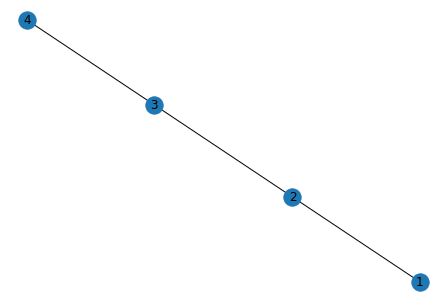

In [53]:
G = nx.from_edgelist([[1,2],[2,3],[3,4]])
G.remove_edges_from([])
nx.draw(G,with_labels=True)

In [27]:
nviz.plot_objects(current_neuron_mesh)

In [45]:
curr_limb_idx = 1
curr_scatter = nru.all_soma_connnecting_endpionts_from_starting_info(limb_network_stating_info[curr_limb_idx],multiple_limbs=False)
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_with_floating_pieces[curr_limb_idx])

nviz.plot_limb_correspondence(
    #limb_correspondence_with_floating_pieces[curr_limb_idx],
    limb_correspondence[curr_limb_idx],
                              meshes_colors="green",
                              skeleton_colors="blue",
                             scatters=[curr_scatter],
                              scatter_size=0.5
                              )


# Debugging the can't find endpoints

# The Limb Preprocessing Function

In [36]:
mesh=limb_mesh_mparty
soma_touching_vertices_dict = soma_touching_vertices_dict
return_concept_network = False
return_concept_network_starting_info=True
width_threshold_MAP=500
size_threshold_MAP=2000
surface_reconstruction_size=1000  

#arguments added from the big preprocessing step                                                            
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size=meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling

use_meshafterparty=use_meshafterparty




combine_close_skeleton_nodes=True
combine_close_skeleton_nodes_threshold=700
filter_end_node_length=4500
perform_cleaning_checks = True



#parameters for MP skeletonization,

#Parameters for setting how the MAP skeletonization takes place
use_surface_after_CGAL=False

#parametrers for stitching the MAP and MP pieces together
move_MAP_stitch_to_end_or_branch = True
distance_to_move_point_threshold=500

#concept_network parameters
run_concept_network_checks = True


#printing controls
verbose = True
print_fusion_steps=True

check_correspondence_branches = True
filter_end_nodes_from_correspondence = True



In [37]:
curr_limb_time = time.time()

limb_mesh_mparty = mesh


#will store a list of all the endpoints tha tmust be kept:
limb_to_endpoints_must_keep_list = []
limb_to_soma_touching_vertices_list = []

# --------------- Part 1 and 2: Getting Border Vertices and Setting the Root------------- #
fusion_time = time.time()
#will eventually get the current root from soma_to_piece_touching_vertices[i]
if not soma_touching_vertices_dict is None:
    root_curr = soma_touching_vertices_dict[list(soma_touching_vertices_dict.keys())[0]][0][0]
else:
    root_curr = None

print(f"root_curr = {root_curr}")

if print_fusion_steps:
    print(f"Time for preparing soma vertices and root: {time.time() - fusion_time }")
    fusion_time = time.time()

# --------------- Part 3: Meshparty skeletonization and Decomposition ------------- #
sk_meshparty_obj = m_sk.skeletonize_mesh_largest_component(limb_mesh_mparty,
                                                        root=root_curr,
                                                          filter_mesh=False)

print(f"meshparty_segment_size = {meshparty_segment_size}")

if print_fusion_steps:
    print(f"Time for 1st pass MP skeletonization: {time.time() - fusion_time }")
    fusion_time = time.time()

(segment_branches, #skeleton branches
divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
segment_widths_median) = m_sk.skeleton_obj_to_branches(sk_meshparty_obj,
                                                      mesh = limb_mesh_mparty,
                                                      meshparty_segment_size=meshparty_segment_size)





if print_fusion_steps:
    print(f"Decomposing first pass: {time.time() - fusion_time }")
    fusion_time = time.time()


if use_meshafterparty:
    print("Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence")
    # --------------- Part 4: Find Individual Branches that could be MAP processed because of width ------------- #
    #gettin the branches that should be passed through MAP skeletonization
    pieces_above_threshold = np.where(segment_widths_median>width_threshold_MAP)[0]

    #getting the correspondnece info for those MAP qualifying
    width_large = segment_widths_median[pieces_above_threshold]
    sk_large = [segment_branches[k] for k in pieces_above_threshold]
    mesh_large_idx = [divided_submeshes_idx[k] for k in pieces_above_threshold]
else:
    print("Only Using MeshParty Skeletonization and Mesh Correspondence")
    mesh_large_idx = []
    width_large = []
    sk_large = []


print("Another print")
mesh_pieces_for_MAP = []
mesh_pieces_for_MAP_face_idx = []


if len(mesh_large_idx) > 0: #will only continue processing if found MAP candidates

    # --------------- Part 5: Find mesh connectivity and group MAP branch candidates into MAP sublimbs ------------- #
    print(f"Found len(mesh_large_idx) MAP candidates: {[len(k) for k in mesh_large_idx]}")

    #finds the connectivity edges of all the MAP candidates
    mesh_large_connectivity = tu.mesh_list_connectivity(meshes = mesh_large_idx,
                                                        connectivity="edges",
                            main_mesh = limb_mesh_mparty,
                            print_flag = False)
    if print_fusion_steps:
        print(f"mesh_large_connectivity: {time.time() - fusion_time }")
        fusion_time = time.time()
    """
    --------------- Grouping MAP candidates ----------------
    Purpose: Will see what mesh pieces should be grouped together
    to pass through CGAL skeletonization


    Pseudocode: 
    1) build a networkx graph with all nodes for mesh_large_idx indexes
    2) Add the edges
    3) Find the connected components
    4) Find sizes of connected components
    5) For all those connected components that are of a large enough size, 
    add the mesh branches and skeletons to the final list


    """
    G = nx.Graph()
    G.add_nodes_from(np.arange(len(mesh_large_idx)))
    G.add_edges_from(mesh_large_connectivity)
    conn_comp = list(nx.connected_components(G))

    filtered_pieces = []

    sk_large_size_filt = []
    mesh_large_idx_size_filt = []
    width_large_size_filt = []

    for cc in conn_comp:
        total_cc_size = np.sum([len(mesh_large_idx[k]) for k in cc])
        if total_cc_size>size_threshold_MAP:
            #print(f"cc ({cc}) passed the size threshold because size was {total_cc_size}")
            filtered_pieces.append(pieces_above_threshold[list(cc)])

    if print_fusion_steps:
        print(f"Finding MAP candidates connected components: {time.time() - fusion_time }")
        fusion_time = time.time()

    #filtered_pieces: will have the indexes of all the branch candidates that should  be 
    #grouped together and passed through MAP skeletonization

    if len(filtered_pieces) > 0:
        # --------------- Part 6: If Found MAP sublimbs, Get the meshes and mesh_idxs of the sublimbs ------------- #
        print(f"len(filtered_pieces) = {len(filtered_pieces)}")
        #all the pieces that will require MAP mesh correspondence and skeletonization
        #(already organized into their components)
        mesh_pieces_for_MAP = [limb_mesh_mparty.submesh([np.concatenate(divided_submeshes_idx[k])],append=True,repair=False) for k in filtered_pieces]
        mesh_pieces_for_MAP_face_idx = [np.concatenate(divided_submeshes_idx[k]) for k in filtered_pieces]



        """
        Old Way: Finding connectivity of pieces through
        mesh_idx_MP = [divided_submeshes_idx[k] for k in pieces_idx_MP]

        mesh_large_connectivity_MP = tu.mesh_list_connectivity(meshes = mesh_idx_MP,
                                main_mesh = limb_mesh_mparty,
                                print_flag = False)

        New Way: going to use skeleton connectivity to determine
        connectivity of pieces

        Pseudocode: 
        1)

        """
        # --------------- Part 7: If Found MAP sublimbs, Get the meshes and mesh_idxs of the sublimbs ------------- #
        # ********* if there are no pieces leftover then will automatically make all the lists below just empty (don't need to if.. else.. the case)****
        pieces_idx_MP = np.setdiff1d(np.arange(len(divided_submeshes_idx)),np.concatenate(filtered_pieces))

        skeleton_MP = [segment_branches[k] for k in pieces_idx_MP]
        skeleton_connectivity_MP = sk.skeleton_list_connectivity(
                                        skeletons=skeleton_MP
                                        )
        if print_fusion_steps:
            print(f"skeleton_connectivity_MP : {time.time() - fusion_time }")
            fusion_time = time.time()

        G = nx.Graph()
        G.add_nodes_from(np.arange(len(skeleton_MP)))
        G.add_edges_from(skeleton_connectivity_MP)
        sublimbs_MP = list(nx.connected_components(G))
        sublimbs_MP_orig_idx = [pieces_idx_MP[list(k)] for k in sublimbs_MP]


        #concatenate into sublimbs the skeletons and meshes
        sublimb_mesh_idx_branches_MP = [divided_submeshes_idx[k] for k in sublimbs_MP_orig_idx]
        sublimb_mesh_branches_MP = [[limb_mesh_mparty.submesh([ki],append=True,repair=False)
                                    for ki in k] for k in sublimb_mesh_idx_branches_MP]
        sublimb_meshes_MP = [limb_mesh_mparty.submesh([np.concatenate(k)],append=True,repair=False)
                                                     for k in sublimb_mesh_idx_branches_MP]
        sublimb_meshes_MP_face_idx = [np.concatenate(k)
                                                     for k in sublimb_mesh_idx_branches_MP]
        sublimb_skeleton_branches = [segment_branches[k] for k in sublimbs_MP_orig_idx]
        widths_MP = [segment_widths_median[k] for k in sublimbs_MP_orig_idx]

        if print_fusion_steps:
            print(f"Grouping MP Sublimbs by Graph: {time.time() - fusion_time }")
            fusion_time = time.time()


# else: #if no pieces were determine to need MAP processing
#     print("No MAP processing needed: just returning the Meshparty skeletonization and mesh correspondence")
#     raise Exception("Returning MP correspondence")


# nviz.plot_objects(main_mesh=tu.combine_meshes([limb_mesh_mparty,current_neuron["S0"].mesh]),
#                   main_mesh_color="green",
#     skeletons=sk_large_size_filt,
#      meshes=[limb_mesh_mparty.submesh([k],append=True) for k in mesh_large_idx_size_filt],
#       meshes_colors="red")








# --------------- Part 8: If No MAP sublimbs found, set the MP sublimb lists to just the whole MP branch decomposition ------------- #

#if no sublimbs need to be decomposed with MAP then just reassign all of the previous MP processing to the sublimb_MPs
if len(mesh_pieces_for_MAP) == 0:
    sublimb_meshes_MP = [limb_mesh_mparty] #trimesh pieces that have already been passed through MP skeletonization (may not need)
    # -- the decomposition information ---
    sublimb_mesh_branches_MP = [divided_submeshes] #the mesh branches for all the disconnected sublimbs
    sublimb_mesh_idx_branches_MP = [divided_submeshes_idx] #The mesh branches idx that have already passed through MP skeletonization
    sublimb_skeleton_branches = [segment_branches]#the skeleton bnraches for all the sublimbs
    widths_MP = [segment_widths_median] #the mesh branches widths for all the disconnected groups

    MAP_flag = False
else:
    MAP_flag = True



mesh_pieces_for_MAP #trimesh pieces that should go through CGAL skeletonization
sublimb_meshes_MP #trimesh pieces that have already been passed through MP skeletonization (may not need)

# -- the decomposition information ---
sublimb_mesh_branches_MP #the mesh branches for all the disconnected sublimbs
sublimb_mesh_idx_branches_MP #The mesh branches idx that have already passed through MP skeletonization
sublimb_skeleton_branches #the skeleton bnraches for all the sublimbs
widths_MP #the mesh branches widths for all the disconnected groups

if print_fusion_steps:
    print(f"Divinding into MP and MAP pieces: {time.time() - fusion_time }")
    fusion_time = time.time()



# ------------------- At this point have the correct division between MAP and MP ------------------------

# -------------- Part 9: Doing the MAP decomposition ------------------ #
global_start_time = time.time()
endpoints_must_keep = dict()



limb_correspondence_MAP = dict()

for sublimb_idx,(mesh,mesh_idx) in enumerate(zip(mesh_pieces_for_MAP,mesh_pieces_for_MAP_face_idx)):
    print(f"--- Working on MAP piece {sublimb_idx}---")
    #print(f"soma_touching_vertices_dict = {soma_touching_vertices_dict}")
    mesh_start_time = time.time()
    curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
    mesh = mesh,
    curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
    )

    if print_fusion_steps:
        print(f"MAP Filtering Soma Pieces: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 0) Generating the Clean skeletons  -------------------------------------------#
    if not curr_soma_to_piece_touching_vertices is None:
        curr_total_border_vertices = dict([(k,np.vstack(v)) for k,v in curr_soma_to_piece_touching_vertices.items()])
    else:
        curr_total_border_vertices = None


    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size)

    if not curr_limb_endpoints_must_keep is None:
        limb_to_endpoints_must_keep_list.append(curr_limb_endpoints_must_keep)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices)
    else:
        print("Inside MAP decomposition and curr_limb_endpoints_must_keep was None")

    if len(cleaned_branch) == 0:
        raise Exception(f"Found a zero length skeleton for limb {z} of trmesh {branch}")

    if print_fusion_steps:
        print(f"skeletonize_and_clean_connected_branch_CGAL: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 1) Generating Initial Mesh Correspondence -------------------------------------------#
    start_time = time.time()

    print(f"Working on limb correspondence for #{sublimb_idx} MAP piece")
    local_correspondence = mesh_correspondence_first_pass(mesh=mesh,
                                                         skeleton=cleaned_branch,
                                                         distance_by_mesh_center=distance_by_mesh_center,
                                                         connectivity="edges",
                                                         remove_inside_pieces_threshold=100)


    print(f"Total time for decomposition = {time.time() - start_time}")
    if print_fusion_steps:
        print(f"mesh_correspondence_first_pass: {time.time() - fusion_time }")
        fusion_time = time.time()


    #------------- 2) Doing Some checks on the initial corespondence -------- #


    if perform_cleaning_checks:
        check_skeletonization_and_decomp(skeleton=cleaned_branch,
                                        local_correspondence=local_correspondence)

    # -------3) Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece
    local_correspondence_revised = correspondence_1_to_1(mesh=mesh,
                                    local_correspondence=local_correspondence,
                                    curr_limb_endpoints_must_keep=curr_limb_endpoints_must_keep,
                                    curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices)

    # -------3b) Fixing the mesh indices to correspond to the larger mesh as a whole
    for k,v in local_correspondence_revised.items():
        local_correspondence_revised[k]["branch_face_idx"] = mesh_idx[local_correspondence_revised[k]["branch_face_idx"]]

    print(f"Total time for MAP sublimb #{sublimb_idx} mesh processing = {time.time() - mesh_start_time}")

    if print_fusion_steps:
        print(f"correspondence_1_to_1: {time.time() - fusion_time }")
        fusion_time = time.time()

    limb_correspondence_MAP[sublimb_idx] = local_correspondence_revised

print(f"Total time for MAP sublimb processing {time.time() - global_start_time}")





# ----------------- Part 10: Doing the MP Decomposition ---------------------- #




sublimb_meshes_MP #trimesh pieces that have already been passed through MP skeletonization (may not need)
# -- the decomposition information ---
sublimb_mesh_branches_MP #the mesh branches for all the disconnected sublimbs
sublimb_mesh_idx_branches_MP #The mesh branches idx that have already passed through MP skeletonization
sublimb_skeleton_branches #the skeleton bnraches for all the sublimbs
widths_MP #the mesh branches widths for all the disconnected groups

limb_correspondence_MP = dict()

for sublimb_idx,mesh in enumerate(sublimb_meshes_MP):
    print(f"---- Working on MP Decomposition #{sublimb_idx} ----")
    mesh_start_time = time.time()

    if len(sublimb_meshes_MP) == 1 and MAP_flag == False:
        print("Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece ")
        curr_soma_to_piece_touching_vertices = soma_touching_vertices_dict
    else:
        if not soma_touching_vertices_dict is None:
            print("Computing the current soma touching verts dict manually")
            curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
                                                mesh = mesh,
                                                curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
                                                )
        else:
            curr_soma_to_piece_touching_vertices = None

    if print_fusion_steps:
        print(f"MP filtering soma verts: {time.time() - fusion_time }")
        fusion_time = time.time()

    #creating all of the sublimb groups
    segment_branches = np.array(sublimb_skeleton_branches[sublimb_idx])
    whole_sk_MP = sk.stack_skeletons(segment_branches)
    branch = mesh
    divided_submeshes = np.array(sublimb_mesh_branches_MP[sublimb_idx])
    divided_submeshes_idx = sublimb_mesh_idx_branches_MP[sublimb_idx]
    segment_widths_median = widths_MP[sublimb_idx]


    if curr_soma_to_piece_touching_vertices is None:
        print(f"Do Not Need to Fix MP Decomposition {sublimb_idx} so just continuing")

    else:

        # ------- 11/9 addition: Fixing error where creating soma touching branch on mesh that doesn't touch border ------------------- #
        print(f"Fixing Possible Soma Extension Branch for Sublimb {sublimb_idx}")
        no_soma_extension_add = True 

        endpts_total = dict()
        curr_soma_to_piece_touching_vertices_total = dict()
        for sm_idx,sm_bord_verts_list in curr_soma_to_piece_touching_vertices.items():
            #will be used for later
            endpts_total[sm_idx] = []
            curr_soma_to_piece_touching_vertices_total[sm_idx] = []

            for sm_bord_verts in sm_bord_verts_list:
                #1) Get the mesh pieces that are touching the border
                matching_mesh_idx = tu.filter_meshes_by_containing_coordinates(mesh_list=divided_submeshes,
                                           nullifying_points=sm_bord_verts,
                                            filter_away=False,
                                           distance_threshold=0,
                                           return_indices=True)
                #2) concatenate all meshes and skeletons that are touching
                if len(matching_mesh_idx) <= 0:
                    raise Exception("None of branches were touching the border vertices when fixing MP pieces")

                touch_mesh = tu.combine_meshes(divided_submeshes[matching_mesh_idx])
                touch_sk = sk.stack_skeletons(segment_branches[matching_mesh_idx])

                local_curr_soma_to_piece_touching_vertices = {sm_idx:[sm_bord_verts]}
                new_sk,endpts,new_branch_info = sk.create_soma_extending_branches(current_skeleton=touch_sk,
                                      skeleton_mesh=touch_mesh,
                                      soma_to_piece_touching_vertices=local_curr_soma_to_piece_touching_vertices,
                                      return_endpoints_must_keep=True,
                                      return_created_branch_info=True,
                                      check_connected_skeleton=False)
                # ---- 12/30 Addition Check if the endpoint found is an endnode or not and if not then manually add branch ---
                curr_endnode = endpts[sm_idx][0]
                match_sk_branches = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                    current_coordinate=curr_endnode)
                
                if len(match_sk_branches) > 1:
                    border_average_coordinate = np.mean(sm_bord_verts,axis=0)
                    new_branch_sk = np.vstack([curr_endnode,border_average_coordinate]).reshape(-1,2,3)
                    br_info = dict(new_branch = new_branch_sk,border_verts=sm_bord_verts)
                    endpts_total[sm_idx].append(border_average_coordinate)
                else:
                    br_info = new_branch_info[sm_idx][0]
                    endpts_total[sm_idx].append(endpts[sm_idx][0])
                # -------------------- End of 12/30 Addition ------------------
                

                #3) Add the info to the new running lists
                
                curr_soma_to_piece_touching_vertices_total[sm_idx].append(sm_bord_verts)


                #4) Skip if no new branch was added
                
                if br_info is None:
                    print("The new branch info was none so skipping \n")
                    continue

                #4 If new branch was made then 
                no_soma_extension_add=False

                #1) Get the newly added branch (and the original vertex which is the first row)
                br_new,sm_bord_verts = br_info["new_branch"],br_info["border_verts"] #this will hold the new branch and the border vertices corresponding to it

                curr_soma_to_piece_touching_vertices_MP = {sm_idx:[sm_bord_verts]}
                endpoints_must_keep_MP = {sm_idx:[br_new[0][1]]}


                orig_vertex = br_new[0][0]
                print(f"orig_vertex = {orig_vertex}")

                #2) Find the branches that have that coordinate (could be multiple)
                match_sk_branches = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                    current_coordinate=orig_vertex)

                print(f"match_sk_branches = {match_sk_branches}")



                """ ******************* THIS NEEDS TO BE FIXED WITH THE SAME METHOD OF STITCHING ********************  """
                """
                Pseudocode:
                1) Find if branch point will require split or not
                2) If does require split then split the skeleton
                3) Gather mesh pieces for correspondence and the skeletons
                4) Run the mesh correspondence
                - this case calculate the new widths after run 
                5) Replace the old branch parts with the new ones



                """

                stitch_point_on_end_or_branch = find_if_stitch_point_on_end_or_branch(
                                                        matched_branches_skeletons= segment_branches[match_sk_branches],
                                                         stitch_coordinate=orig_vertex,
                                                          verbose=False)


                if not stitch_point_on_end_or_branch:
                    matching_branch_sk = sk.cut_skeleton_at_coordinate(skeleton=segment_branches[match_sk_branches][0],
                                                                      cut_coordinate = orig_vertex)
                else:
                    matching_branch_sk = segment_branches[match_sk_branches]


                #3) Find the mesh and skeleton of the winning branch
                matching_branch_meshes = np.array(divided_submeshes)[match_sk_branches]
                matching_branch_mesh_idx = np.array(divided_submeshes_idx)[match_sk_branches]
                extend_soma_mesh_idx = np.concatenate(matching_branch_mesh_idx)
                extend_soma_mesh = limb_mesh_mparty.submesh([extend_soma_mesh_idx ],append=True,repair=False)

                #4) Add newly created branch to skeleton and divide the skeleton into branches (could make 2 or 3)
                #extended_skeleton_to_soma = sk.stack_skeletons([list(matching_branch_sk),br_new])

                sk.check_skeleton_connected_component(sk.stack_skeletons(list(matching_branch_sk) + [br_new]))

                #5) Run Adaptive mesh correspondnece using branches and mesh
                local_correspondnece_MP = mesh_correspondence_first_pass(mesh=extend_soma_mesh,
                                                                         skeleton_branches = list(matching_branch_sk) + [br_new]
                                              #skeleton=extended_skeleton_to_soma
                                                                        )

                # GETTING MESHES THAT ARE NOT FULLY CONNECTED!!
                local_correspondence_revised = correspondence_1_to_1(mesh=extend_soma_mesh,
                                                            local_correspondence=local_correspondnece_MP,
                                                            curr_limb_endpoints_must_keep=endpoints_must_keep_MP,
                                                            curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices_MP)

                # All the things that should be revised:
            #     segment_branches, #skeleton branches
            #     divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
            #     segment_widths_median


                new_submeshes = [k["branch_mesh"] for k in local_correspondence_revised.values()]
                new_submeshes_idx = [extend_soma_mesh_idx[k["branch_face_idx"]] for k in local_correspondence_revised.values()]
                new_skeletal_branches = [k["branch_skeleton"] for k in local_correspondence_revised.values()]

                #calculate the new width
                ray_inter = tu.ray_pyembree.RayMeshIntersector(limb_mesh_mparty)
                new_widths = []
                for new_s_idx in new_submeshes_idx:
                    curr_ray_distance = tu.ray_trace_distance(mesh=limb_mesh_mparty, 
                                        face_inds=new_s_idx,
                                       ray_inter=ray_inter)
                    curr_width_median = np.median(curr_ray_distance[curr_ray_distance!=0])
                    print(f"curr_width_median = {curr_width_median}")
                    if (not np.isnan(curr_width_median)) and (curr_width_median > 0):
                        new_widths.append(curr_width_median)
                    else:
                        print(f"USING A DEFAULT WIDTH BECAUSE THE NEWLY COMPUTED ONE WAS {curr_width_median}: {segment_widths_median[match_sk_branches[0]]}")
                        new_widths.append(segment_widths_median[match_sk_branches[0]])


                #6) Remove the original branch and mesh correspondence and replace with the multiples
#                     print(f"match_sk_branches BEFORE = {match_sk_branches}")
#                     print(f"segment_branches BEFORE = {segment_branches}")
#                     print(f"len(new_skeletal_branches) = {len(new_skeletal_branches)}")
#                     print(f"new_skeletal_branches BEFORE= {new_skeletal_branches}")


                #segment_branches = np.delete(segment_branches,match_sk_branches,axis=0)
                #segment_branches = np.append(segment_branches,new_skeletal_branches,axis=0)

                segment_branches = np.array([k for i,k in enumerate(segment_branches) if i not in match_sk_branches] + new_skeletal_branches)


                divided_submeshes = np.delete(divided_submeshes,match_sk_branches,axis=0)
                divided_submeshes = np.append(divided_submeshes,new_submeshes,axis=0)


                #divided_submeshes_idx = np.delete(divided_submeshes_idx,match_sk_branches,axis=0)
                #divided_submeshes_idx = np.append(divided_submeshes_idx,new_submeshes_idx,axis=0)
                divided_submeshes_idx = np.array([k for i,k in enumerate(divided_submeshes_idx) if i not in match_sk_branches] + new_submeshes_idx)

                segment_widths_median = np.delete(segment_widths_median,match_sk_branches,axis=0)
                segment_widths_median = np.append(segment_widths_median,new_widths,axis=0)

                try:
                    debug = False
                    if debug:
                        print(f"segment_branches.shape = {segment_branches.shape}")
                        print(f"segment_branches = {segment_branches}")
                        print(f"new_skeletal_branches = {new_skeletal_branches}")
                    sk.check_skeleton_connected_component(sk.stack_skeletons(segment_branches))
                except:
                    su.compressed_pickle(local_correspondence_revised,"local_correspondence_revised")
                print("checked segment branches after soma add on")
                return_find = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                                             orig_vertex)



                """ ******************* END OF HOW CAN DO STITCHING ********************  """



        limb_to_endpoints_must_keep_list.append(endpts_total)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices_total)

        # ------------------- 11/9 addition ------------------- #

        if no_soma_extension_add:
            print("No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)")

        if print_fusion_steps:
            print(f"MP (because soma touching verts) soma extension add: {time.time() - fusion_time }")
            fusion_time = time.time()

    #building the limb correspondence
    limb_correspondence_MP[sublimb_idx] = dict()

    for zz,b_sk in enumerate(segment_branches):
        limb_correspondence_MP[sublimb_idx][zz] = dict(
            branch_skeleton = b_sk,
            width_from_skeleton = segment_widths_median[zz],
            branch_mesh = divided_submeshes[zz],
            branch_face_idx = divided_submeshes_idx[zz]
            )



limb_correspondence_MP_saved = copy.deepcopy(limb_correspondence_MP)
limb_correspondence_MAP_saved = copy.deepcopy(limb_correspondence_MAP)

# ------------------------------------- Part C: Will make sure the correspondences can all be stitched together --------------- #



#     su.compressed_pickle(limb_correspondence_MAP,"limb_correspondence_MAP_before_stitch")
#     su.compressed_pickle(limb_correspondence_MP,"limb_correspondence_MP_before_stitch")


if check_correspondence_branches:
    sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MAP)
    sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MP)

#total_keep_endpoints = np.concatenate([list(v.values()) for v in limb_to_endpoints_must_keep_list]).reshape(-1,3)
total_keep_endpoints = []
for entry in limb_to_endpoints_must_keep_list:
    for k,v in entry.items():
        total_keep_endpoints.append(v)
total_keep_endpoints = np.vstack(total_keep_endpoints)
    
    

# Only want to perform this step if both MP and MAP pieces
if len(limb_correspondence_MAP)>0 and len(limb_correspondence_MP)>0:

    # -------------- Part 11: Getting Sublimb Mesh and Skeletons and Gets connectivitiy by Mesh -------#
    # -------------(filtering connections to only MP to MAP edges)--------------- #

    # ---- Doing the mesh connectivity ---------#
    sublimb_meshes_MP = []
    sublimb_skeletons_MP = []

    for sublimb_key,sublimb_v in limb_correspondence_MP.items():
        sublimb_meshes_MP.append(tu.combine_meshes([branch_v["branch_mesh"] for branch_v in sublimb_v.values()]))
        sublimb_skeletons_MP.append(sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in sublimb_v.values()]))



    sublimb_meshes_MAP = []
    sublimb_skeletons_MAP = []


    for sublimb_key,sublimb_v in limb_correspondence_MAP.items():
        sublimb_meshes_MAP.append(tu.combine_meshes([branch_v["branch_mesh"] for branch_v in sublimb_v.values()]))
        sublimb_skeletons_MAP.append(sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in sublimb_v.values()]))

    sublimb_skeletons_MP_saved = copy.deepcopy(sublimb_skeletons_MP)
    sublimb_skeletons_MAP_saved = copy.deepcopy(sublimb_skeletons_MAP)

    connectivity_type = "edges"
    for i in range(0,2):
        mesh_conn,mesh_conn_vertex_groups = tu.mesh_list_connectivity(meshes = sublimb_meshes_MP + sublimb_meshes_MAP,
                                            main_mesh = limb_mesh_mparty,
                                            connectivity=connectivity_type,
                                            min_common_vertices=1,
                                            return_vertex_connection_groups=True,
                                            return_largest_vertex_connection_group=True,
                                            print_flag = False)
        mesh_conn_old = copy.deepcopy(mesh_conn)



        #check that every MAP piece mapped to a MP piece
        mesh_conn_filt = []
        mesh_conn_vertex_groups_filt = []
        for j,(m1,m2) in enumerate(mesh_conn):
            if m1 < len(sublimb_meshes_MP) and m2 >=len(sublimb_meshes_MP):
                mesh_conn_filt.append([m1,m2])
                mesh_conn_vertex_groups_filt.append(mesh_conn_vertex_groups[j])
            else:
                print(f"Edge {(m1,m2)} was not kept")
        mesh_conn_filt = np.array(mesh_conn_filt)

        mesh_conn = mesh_conn_filt
        mesh_conn_vertex_groups = mesh_conn_vertex_groups_filt

        #check that the mapping should create only one connected component
        G = nx.from_edgelist(mesh_conn)



        try:
            if len(G) != len(sublimb_meshes_MP) + len(sublimb_meshes_MAP):
                raise Exception("Number of nodes in mesh connectivity graph is not equal to number of  MAP and MP sublimbs")

            connect_comp = list(nx.connected_components(G))
            if len(connect_comp)>1:
                raise Exception(f"Mesh connectivity was not one component, instead it was ({len(connect_comp)}): {connect_comp} ")
        except:

            if connectivity_type == "vertices":
                print(f"mesh_conn_filt = {mesh_conn_filt}")
                print(f"mesh_conn_old = {mesh_conn_old}")
                mesh_conn_adjusted = np.vstack([mesh_conn[:,0],mesh_conn[:,1]-len(sublimb_meshes_MP)]).T
                print(f"mesh_conn_adjusted = {mesh_conn_adjusted}")
                print(f"len(sublimb_meshes_MP) = {len(sublimb_meshes_MP)}")
                print(f"len(sublimb_meshes_MAP) = {len(sublimb_meshes_MAP)}")
                meshes = sublimb_meshes_MP + sublimb_meshes_MAP
                #su.compressed_pickle(meshes,"meshes")
                su.compressed_pickle(sublimb_meshes_MP,"sublimb_meshes_MP")
                su.compressed_pickle(sublimb_meshes_MAP,"sublimb_meshes_MAP")
                su.compressed_pickle(limb_mesh_mparty,"limb_mesh_mparty")
                su.compressed_pickle(sublimb_skeletons_MP,"sublimb_skeletons_MP")
                su.compressed_pickle(sublimb_skeletons_MAP,"sublimb_skeletons_MAP")




                raise Exception("Something went wrong in the connectivity")
            else:
                print(f"Failed on connection type {connectivity_type} ")
                connectivity_type = "vertices"
                print(f"so changing type to {connectivity_type}")
        else:
            print(f"Successful mesh connectivity with type {connectivity_type}")
            break


    #adjust the connection indices for MP and MAP indices
    mesh_conn_adjusted = np.vstack([mesh_conn[:,0],mesh_conn[:,1]-len(sublimb_meshes_MP)]).T






    """
    Pseudocode:
    For each connection edge:
        For each vertex connection group:
            1) Get the endpoint vertices of the MP skeleton
            2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)
            3) Find the closest skeletal point on MAP pairing (MAP stitch) 
            4) Find the branches that have that MAP stitch point:
            5A) If the number of branches corresponding to stitch point is multipled
                --> then we are stitching at a branching oint
                i) Just add the skeletal segment from MP_stitch to MAP stitch to the MP skeletal segment
                ii) 

    """



    # -------------- STITCHING PHASE -------#
    stitch_counter = 0
    all_map_stitch_points = []
    for (MP_idx,MAP_idx),v_g in zip(mesh_conn_adjusted,mesh_conn_vertex_groups):
        print(f"\n---- Working on {(MP_idx,MAP_idx)} connection-----")

        """
        This old way of getting the endpoints was not good because could possibly just need
        a stitching done between original branch junction

        skeleton_MP_graph = sk.convert_skeleton_to_graph(curr_skeleton_MP)
        endpoint_nodes = xu.get_nodes_of_degree_k(skeleton_MP_graph,1)
        endpoint_nodes_coordinates = xu.get_node_attributes(skeleton_MP_graph,node_list=endpoint_nodes)
        """


        # -------------- Part 12: Find the MP and MAP stitching point and branches that contain the stitching point-------#

        """  OLD WAY THAT ALLOWED STITICHING POINTS TO NOT BE CONNECTED AT THE CONNECTING BRANCHES
        #getting the skeletons that should be stitched
        curr_skeleton_MP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MP[MP_idx].values()])
        curr_skeleton_MAP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MAP[MAP_idx].values()])

        #1) Get the endpoint vertices of the MP skeleton branches (so every endpoint or high degree node)
        #(needs to be inside loop because limb correspondence will change)
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in np.sort(list(limb_correspondence_MP[MP_idx].keys()))]
        endpoint_nodes_coordinates = np.array([sk.find_branch_endpoints(k) for k in curr_MP_branch_skeletons])
        endpoint_nodes_coordinates = np.unique(endpoint_nodes_coordinates.reshape(-1,3),axis=0)

        #2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)
        av_vert = np.mean(v_g,axis=0)
        winning_vertex = endpoint_nodes_coordinates[np.argmin(np.linalg.norm(endpoint_nodes_coordinates-av_vert,axis=1))]
        print(f"winning_vertex = {winning_vertex}")


        #2b) Find the branch points where the winning vertex is located
        MP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MP_branch_skeletons,
            current_coordinate = winning_vertex
        )
        print(f"MP_branches_with_stitch_point = {MP_branches_with_stitch_point}")


        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP.reshape(-1,3),axis=0)
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-winning_vertex,axis=1))]


        #3b) Consider if the stitch point is close enough to end or branch node in skeleton:
        # and if so then reassign
        if move_MAP_stitch_to_end_or_branch:
            MAP_stitch_point_new,change_status = sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True

                                                    )
            MAP_stitch_point=MAP_stitch_point_new


        #4) Find the branches that have that MAP stitch point:
        curr_MAP_branch_skeletons = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"]
                                         for k in np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))]

        MAP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MAP_branch_skeletons,
            current_coordinate = MAP_stitch_point
        )



        MAP_stitch_point_on_end_or_branch = False
        if len(MAP_branches_with_stitch_point)>1:
            MAP_stitch_point_on_end_or_branch = True
        elif len(MAP_branches_with_stitch_point)==1:
            if len(nu.matching_rows(sk.find_branch_endpoints(curr_MAP_branch_skeletons[MAP_branches_with_stitch_point[0]]),
                                    MAP_stitch_point))>0:
                MAP_stitch_point_on_end_or_branch=True
        else:
            raise Exception("No matching MAP values")

    """

        #*****should only get branches that are touching....****

        #getting the skeletons that should be stitched
        curr_skeleton_MP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MP[MP_idx].values()])
        curr_skeleton_MAP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MAP[MAP_idx].values()])


        av_vert = np.mean(v_g,axis=0)

        # ---------------- Doing the MAP part first -------------- #
        """
        The previous way did not ensure that the MAP point found will have a branch mesh that is touching the border vertices

        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP.reshape(-1,3),axis=0)

        #this does not guarentee that the MAP branch associated with the MAP stitch point is touching the border group
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]
        """

        # -------------- 11/9 NEW METHOD FOR FINDING MAP STITCH POINT ------------ #
        o_keys = np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))
        curr_MAP_branch_meshes = np.array([limb_correspondence_MAP[MAP_idx][k]["branch_mesh"]
                                         for k in o_keys])
        curr_MAP_branch_skeletons = np.array([limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"]
                                         for k in o_keys])

        MAP_pieces_idx_touching_border = tu.filter_meshes_by_containing_coordinates(mesh_list=curr_MAP_branch_meshes,
                                       nullifying_points=v_g,
                                        filter_away=False,
                                       distance_threshold=0,
                                       return_indices=True)

        MAP_branches_considered = curr_MAP_branch_skeletons[MAP_pieces_idx_touching_border]
        curr_skeleton_MAP_for_stitch = sk.stack_skeletons(MAP_branches_considered)

        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP_for_stitch.reshape(-1,3),axis=0)


        
        """
        #------- OLD WAY: this does not guarentee that the MAP branch associated with the MAP stitch point is touching the border group
        #MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]
        
        # ------- 1/1/21 Change to make sure never stitches to soma connecting point ----
        Pseudocode: 
        1) Get all the closest coordinates and sort in order of distance
        2) Iterate through the top coordinates:
        - check if not in the endpoints
        a. if not --> make that the winning MAP stitch point
        b. if not --> continue to next

        3) if get to end and dont have winning coordinate then error
        """

        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]

        # --------- 11/13: Making so could possibly stitch to another point that was already stitched to
        curr_br_endpts = np.array([sk.find_branch_endpoints(k) for k in MAP_branches_considered]).reshape(-1,3)
        curr_br_endpts_unique = np.unique(curr_br_endpts,axis=0)



        #3b) Consider if the stitch point is close enough to end or branch node in skeleton:
        # and if so then reassign
        if move_MAP_stitch_to_end_or_branch:
            MAP_stitch_point_new,change_status = sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True,
                                                    possible_node_coordinates=curr_br_endpts_unique,
                                                    excluded_node_coordinates=total_keep_endpoints,
                                                    )
            MAP_stitch_point=MAP_stitch_point_new


        #4) Find the branches that have that MAP stitch point:

        MAP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MAP_branch_skeletons,
            current_coordinate = MAP_stitch_point
        )



        MAP_stitch_point_on_end_or_branch = False
        if len(MAP_branches_with_stitch_point)>1:
            MAP_stitch_point_on_end_or_branch = True
        elif len(MAP_branches_with_stitch_point)==1:
            if len(nu.matching_rows(sk.find_branch_endpoints(curr_MAP_branch_skeletons[MAP_branches_with_stitch_point[0]]),
                                    MAP_stitch_point))>0:
                MAP_stitch_point_on_end_or_branch=True
        else:
            raise Exception("No matching MAP values")

        #add the map stitch point to the history
        all_map_stitch_points.append(MAP_stitch_point)

        # ---------------- Doing the MP Part --------------------- #



        ord_keys = np.sort(list(limb_correspondence_MP[MP_idx].keys()))
        curr_MP_branch_meshes = [limb_correspondence_MP[MP_idx][k]["branch_mesh"] for k in ord_keys]



        """ old way of filtering MP pieces just to those touching the MAP, but just want the ones touching the connection group

        MAP_meshes_with_stitch_point = tu.combine_meshes([limb_correspondence_MAP[MAP_idx][k]["branch_mesh"] for k in MAP_branches_with_stitch_point])

        conn = tu.mesh_pieces_connectivity(main_mesh=limb_mesh_mparty,
                                   central_piece=MAP_meshes_with_stitch_point,
                                   periphery_pieces=curr_MP_branch_meshes)
        """
        # 11/9 Addition: New way that filters meshes by their touching of the vertex connection group (this could possibly be an empty group)
        conn = tu.filter_meshes_by_containing_coordinates(mesh_list=curr_MP_branch_meshes,
                                       nullifying_points=v_g,
                                        filter_away=False,
                                       distance_threshold=0,
                                       return_indices=True)

        if len(conn) == 0:
            print("Connectivity was 0 for the MP mesh groups touching the vertex group so not restricting by that anymore")
            sk_conn = np.arange(0,len(curr_MP_branch_meshes))
        else:
            sk_conn = conn

        print(f"sk_conn = {sk_conn}")
        print(f"conn = {conn}")


        #1) Get the endpoint vertices of the MP skeleton branches (so every endpoint or high degree node)
        #(needs to be inside loop because limb correspondence will change)
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in sk_conn]
        endpoint_nodes_coordinates = np.array([sk.find_branch_endpoints(k) for k in curr_MP_branch_skeletons])
        endpoint_nodes_coordinates = np.unique(endpoint_nodes_coordinates.reshape(-1,3),axis=0)
        
        


        #2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)

        winning_vertex = endpoint_nodes_coordinates[np.argmin(np.linalg.norm(endpoint_nodes_coordinates-av_vert,axis=1))]
        print(f"winning_vertex = {winning_vertex}")


        #2b) Find the branch points where the winning vertex is located
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in np.sort(list(limb_correspondence_MP[MP_idx].keys()))]
        MP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MP_branch_skeletons,
            current_coordinate = winning_vertex
        )
        print(f"MP_branches_with_stitch_point = {MP_branches_with_stitch_point}")



        print(f"MAP_branches_with_stitch_point = {MAP_branches_with_stitch_point}")
        print(f"MAP_stitch_point_on_end_or_branch = {MAP_stitch_point_on_end_or_branch}")


        # -------- 11/13 addition: Will see if the MP stitch point was already a MAP stitch point ---- #
        if len(nu.matching_rows(np.array(all_map_stitch_points),winning_vertex)) > 0:
            keep_MP_stitch_static = True
        else:
            keep_MP_stitch_static = False





        # ------------------------- This part does the stitching -------------------- #


        """
        Pseudocode:
        1) For all MP branches
            a) Get neighbor coordinates to MP stitch points
            b) Delete the MP Stitch points on each 
            c) Add skeleton segment from neighbor to MAP stitch point
        2) Get skeletons and meshes from MP and MAP pieces
        3) Run mesh correspondence to get new meshes and mesh_idx and widths
        4a) If MAP_stitch_point_on_end_or_branch is False
        - Delete the old MAP branch parts and replace with new MAP ones
        4b) Revise the meshes,  mesh_idx, and widths of the MAP pieces
        5) Revise the meshes,  mesh_idx, and widths of the MP pieces


        """

        # -------------- Part 13: Will Adjust the MP branches that have the stitch point so extends to the MAP stitch point -------#
        curr_MP_sk = []
        for b_idx in MP_branches_with_stitch_point:
            if not keep_MP_stitch_static:
                #a) Get neighbor coordinates to MP stitch points
                MP_stitch_branch_graph = sk.convert_skeleton_to_graph(curr_MP_branch_skeletons[b_idx])
                stitch_node = xu.get_nodes_with_attributes_dict(MP_stitch_branch_graph,dict(coordinates=winning_vertex))[0]
                stitch_neighbors = xu.get_neighbors(MP_stitch_branch_graph,stitch_node)

                if len(stitch_neighbors) != 1:
                    raise Exception("Not just one neighbor for stitch point of MP branch")
                keep_neighbor = stitch_neighbors[0]  
                keep_neighbor_coordinates = xu.get_node_attributes(MP_stitch_branch_graph,node_list=[keep_neighbor])[0]

                #b) Delete the MP Stitch points on each 
                MP_stitch_branch_graph.remove_node(stitch_node)

                """ Old way that does not do smoothing

                #c) Add skeleton segment from neighbor to MAP stitch point
                new_node_name = np.max(MP_stitch_branch_graph.nodes())+1

                MP_stitch_branch_graph.add_nodes_from([(int(new_node_name),{"coordinates":MAP_stitch_point})])
                MP_stitch_branch_graph.add_weighted_edges_from([(keep_neighbor,new_node_name,np.linalg.norm(MAP_stitch_point - keep_neighbor_coordinates))])

                new_MP_skeleton = sk.convert_graph_to_skeleton(MP_stitch_branch_graph)

                """
                try:
                    if len(MP_stitch_branch_graph)>1:
                        new_MP_skeleton = sk.add_and_smooth_segment_to_branch(skeleton=sk.convert_graph_to_skeleton(MP_stitch_branch_graph),
                                                        skeleton_stitch_point=keep_neighbor_coordinates,
                                                         new_stitch_point=MAP_stitch_point)
                    else:
                        print("Not even attempting smoothing segment because once keep_neighbor_coordinates")
                        new_MP_skeleton = np.vstack([keep_neighbor_coordinates,MAP_stitch_point]).reshape(-1,2,3)
                except:
                    su.compressed_pickle(MP_stitch_branch_graph,"MP_stitch_branch_graph")
                    su.compressed_pickle(keep_neighbor_coordinates,"keep_neighbor_coordinates")
                    su.compressed_pickle(MAP_stitch_point,"MAP_stitch_point")


                    raise Exception("Something went wrong with add_and_smooth_segment_to_branch")





                #smooth over the new skeleton
                new_MP_skeleton_smooth = sk.resize_skeleton_branch(new_MP_skeleton,
                                                                  segment_width=meshparty_segment_size)

                curr_MP_sk.append(new_MP_skeleton_smooth)
            else:
                print(f"Not adjusting MP skeletons because keep_MP_stitch_static = {keep_MP_stitch_static}")
                curr_MP_sk.append(curr_MP_branch_skeletons[b_idx])



        #2) Get skeletons and meshes from MP and MAP pieces
        curr_MAP_sk = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"] for k in MAP_branches_with_stitch_point]

        #2.1) Going to break up the MAP skeleton if need be
        """
        Pseudocode:
        a) check to see if it needs to be broken up
        If it does:
        b) Convert the skeleton into a graph
        c) Find the node of the MAP stitch point (where need to do the breaking)
        d) Find the degree one nodes
        e) For each degree one node:
        - Find shortest path from stitch node to end node
        - get a subgraph from that path
        - convert graph to a skeleton and save as new skeletons

        """
        # -------------- Part 14: Breaks Up MAP skeleton into 2 pieces if Needs (because MAP stitch point not on endpoint or branch point)  -------#

        #a) check to see if it needs to be broken up
        cut_flag = False
        if not MAP_stitch_point_on_end_or_branch:
            if len(curr_MAP_sk) > 1:
                raise Exception(f"There was more than one skeleton for MAP skeletons even though MAP_stitch_point_on_end_or_branch = {MAP_stitch_point_on_end_or_branch}")


            skeleton_to_cut = curr_MAP_sk[0]
            curr_MAP_sk = sk.cut_skeleton_at_coordinate(skeleton=skeleton_to_cut,
                                                        cut_coordinate=MAP_stitch_point)
            cut_flag=True


        # ------ 11/13 Addition: need to adjust the MAP points if have to keep MP static
        if keep_MP_stitch_static:
            curr_MAP_sk_final = []
            for map_skel in curr_MAP_sk:
                #a) Get neighbor coordinates to MP stitch points
                MP_stitch_branch_graph = sk.convert_skeleton_to_graph(map_skel)
                stitch_node = xu.get_nodes_with_attributes_dict(MP_stitch_branch_graph,dict(coordinates=MAP_stitch_point))[0]
                stitch_neighbors = xu.get_neighbors(MP_stitch_branch_graph,stitch_node)

                if len(stitch_neighbors) != 1:
                    raise Exception("Not just one neighbor for stitch point of MP branch")
                keep_neighbor = stitch_neighbors[0]  
                keep_neighbor_coordinates = xu.get_node_attributes(MP_stitch_branch_graph,node_list=[keep_neighbor])[0]

                #b) Delete the MP Stitch points on each 
                MP_stitch_branch_graph.remove_node(stitch_node)

                """ Old way that does not do smoothing

                #c) Add skeleton segment from neighbor to MAP stitch point
                new_node_name = np.max(MP_stitch_branch_graph.nodes())+1

                MP_stitch_branch_graph.add_nodes_from([(int(new_node_name),{"coordinates":MAP_stitch_point})])
                MP_stitch_branch_graph.add_weighted_edges_from([(keep_neighbor,new_node_name,np.linalg.norm(MAP_stitch_point - keep_neighbor_coordinates))])

                new_MP_skeleton = sk.convert_graph_to_skeleton(MP_stitch_branch_graph)

                """
                try:
                    if len(MP_stitch_branch_graph)>1:
                        new_MP_skeleton = sk.add_and_smooth_segment_to_branch(skeleton=sk.convert_graph_to_skeleton(MP_stitch_branch_graph),
                                                        skeleton_stitch_point=keep_neighbor_coordinates,
                                                         new_stitch_point=winning_vertex)
                    else:
                        print("Not even attempting smoothing segment because once keep_neighbor_coordinates")
                        new_MP_skeleton = np.vstack([keep_neighbor_coordinates,MAP_stitch_point]).reshape(-1,2,3)
                except:
                    su.compressed_pickle(MP_stitch_branch_graph,"MP_stitch_branch_graph")
                    su.compressed_pickle(keep_neighbor_coordinates,"keep_neighbor_coordinates")
                    su.compressed_pickle(winning_vertex,"winning_vertex")


                    raise Exception("Something went wrong with add_and_smooth_segment_to_branch")





                #smooth over the new skeleton
                new_MP_skeleton_smooth = sk.resize_skeleton_branch(new_MP_skeleton,
                                                                  segment_width=meshparty_segment_size)

                curr_MAP_sk_final.append(new_MP_skeleton_smooth)
            curr_MAP_sk = copy.deepcopy(curr_MAP_sk_final)



        # -------------- Part 15: Gets all of the skeletons and Mesh to divide u and does mesh correspondence -------#
        # ------------- revise IDX so still references the whole limb mesh -----------#

        # -------------- 11/10 Addition accounting for not all MAP pieces always touching each other --------------------#
        if len(MAP_branches_with_stitch_point) > 1:
            print("\nRevising the MAP pieces index:")
            print(f"MAP_pieces_idx_touching_border = {MAP_pieces_idx_touching_border}, MAP_branches_with_stitch_point = {MAP_branches_with_stitch_point}")
            MAP_pieces_for_correspondence = nu.intersect1d(MAP_pieces_idx_touching_border,MAP_branches_with_stitch_point)
            print(f"MAP_pieces_for_correspondence = {MAP_pieces_for_correspondence}")
            curr_MAP_sk = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"] for k in MAP_pieces_for_correspondence]
        else:
            MAP_pieces_for_correspondence = MAP_branches_with_stitch_point

        curr_MAP_meshes_idx = [limb_correspondence_MAP[MAP_idx][k]["branch_face_idx"] for k in MAP_pieces_for_correspondence]

        # Have to adjust based on if the skeleton were split

        if cut_flag:
            #Then it was cut and have to do mesh correspondence to find what label to cut
            if len(curr_MAP_meshes_idx) > 1:
                raise Exception("MAP_pieces_for_correspondence was longer than 1 and cut flag was set")
            pre_stitch_mesh_idx = curr_MAP_meshes_idx[0]
            pre_stitch_mesh = limb_mesh_mparty.submesh([pre_stitch_mesh_idx],append=True,repair=False)
            local_correspondnece_stitch = mesh_correspondence_first_pass(mesh=pre_stitch_mesh,
                                      skeleton_branches=curr_MAP_sk)
            local_correspondence_stitch_revised_MAP = correspondence_1_to_1(mesh=pre_stitch_mesh,
                                                        local_correspondence=local_correspondnece_stitch,
                                                        curr_limb_endpoints_must_keep=None,
                                                        curr_soma_to_piece_touching_vertices=None)

#                 curr_MAP_meshes_idx = [pre_stitch_mesh_idx[local_correspondence_stitch_revised_MAP[nn]["branch_face_idx"]] for 
#                                                nn in local_correspondence_stitch_revised_MAP.keys()]

            #Need to readjust the mesh correspondence idx
            for k,v in local_correspondence_stitch_revised_MAP.items():
                local_correspondence_stitch_revised_MAP[k]["branch_face_idx"] = pre_stitch_mesh_idx[local_correspondence_stitch_revised_MAP[k]["branch_face_idx"]]

            curr_MAP_meshes_idx = [v["branch_face_idx"] for v in local_correspondence_stitch_revised_MAP.values()]
        else:
            local_correspondence_stitch_revised_MAP = dict([(gg,limb_correspondence_MAP[MAP_idx][kk]) for gg,kk in enumerate(MAP_pieces_for_correspondence)])

            for gg,kk in enumerate(MAP_pieces_for_correspondence):
                local_correspondence_stitch_revised_MAP[gg]["branch_skeleton"] = curr_MAP_sk[gg]



        #To make sure that the MAP never gives up ground on the labels
        must_keep_labels_MAP = dict()
        must_keep_counter = 0
        for kk,b_idx in enumerate(curr_MAP_meshes_idx):
            #must_keep_labels_MAP.update(dict([(ii,kk) for ii in range(must_keep_counter,must_keep_counter+len(b_idx))]))
            must_keep_labels_MAP[kk] = np.arange(must_keep_counter,must_keep_counter+len(b_idx))
            must_keep_counter += len(b_idx)



        #this is where should send only the MP that apply
        MP_branches_for_correspondence,conn_idx,MP_branches_with_stitch_point_idx = nu.intersect1d(conn,MP_branches_with_stitch_point,return_indices=True)

        curr_MP_meshes_idx = [limb_correspondence_MP[MP_idx][k]["branch_face_idx"] for k in MP_branches_for_correspondence]
        curr_MP_sk_for_correspondence = [curr_MP_sk[zz] for zz in MP_branches_with_stitch_point_idx]

        stitching_mesh_idx = np.concatenate(curr_MAP_meshes_idx + curr_MP_meshes_idx)
        stitching_mesh = limb_mesh_mparty.submesh([stitching_mesh_idx],append=True,repair=False)
        stitching_skeleton_branches = curr_MAP_sk + curr_MP_sk_for_correspondence
        """

        ****** NEED TO GET THE RIGHT MESH TO RUN HE IDX ON SO GETS A GOOD MESH (CAN'T BE LIMB_MESH_MPARTY)
        BUT MUST BE THE ORIGINAL MAP MESH

        mesh_pieces_for_MAP
        sublimb_meshes_MP

        mesh_pieces_for_MAP_face_idx
        sublimb_meshes_MP_face_idx

        stitching_mesh = tu.combine_meshes(curr_MAP_meshes + curr_MP_meshes)
        stitching_skeleton_branches = curr_MAP_sk + curr_MP_sk

        """

        # ******************************** this is where should do thing about no mesh correspondence ***************** #

        # -------- 12/22: Trying to do the re-correspondence but if doesn't work then just resort to old one --------- #

        try:

            #3) Run mesh correspondence to get new meshes and mesh_idx and widths
            local_correspondnece_stitch = mesh_correspondence_first_pass(mesh=stitching_mesh,
                                          skeleton_branches=stitching_skeleton_branches)

            local_correspondence_stitch_revised = correspondence_1_to_1(mesh=stitching_mesh,
                                                        local_correspondence=local_correspondnece_stitch,
                                                        curr_limb_endpoints_must_keep=None,
                                                        curr_soma_to_piece_touching_vertices=None,
                                                        must_keep_labels=must_keep_labels_MAP)

            #Need to readjust the mesh correspondence idx
            for k,v in local_correspondence_stitch_revised.items():
                local_correspondence_stitch_revised[k]["branch_face_idx"] = stitching_mesh_idx[local_correspondence_stitch_revised[k]["branch_face_idx"]]
        except:
            print("Errored in 1 to 1 correspondence in stitching so just reverting to the original mesh assignments")
            # Setting the correspondence manually because the adaptive way did not work
            local_counter = 0
            local_correspondence_stitch_revised = dict()

            # setting the MAP parts (the new skeletons have already been adjusted)
            for k in local_correspondence_stitch_revised_MAP:
                local_correspondence_stitch_revised[local_counter] = local_correspondence_stitch_revised_MAP[k]
                local_counter += 1

            # setting the MP parts (the new skeletons have not been adjusted yet so adjusting them here)
            for mp_idx, k in enumerate(MP_branches_for_correspondence):
                local_correspondence_stitch_revised[local_counter] = limb_correspondence_MP[MP_idx][k] 
                local_correspondence_stitch_revised[local_counter]["branch_skeleton"] = curr_MP_sk[mp_idx]
                local_counter += 1


#                 su.compressed_pickle(stitching_skeleton_branches,"stitching_skeleton_branches")
#                 su.compressed_pickle(stitching_mesh,"stitching_mesh")
#                 su.compressed_pickle(local_correspondnece_stitch,"local_correspondnece_stitch")
#                 su.compressed_pickle(must_keep_labels_MAP,"must_keep_labels_MAP")

#                 raise Exception("Something went wrong with 1 to 1 correspondence")







        # -------------- Part 16: Overwrite old branch entries (and add on one new to MAP if required a split) -------#


        #4a) If MAP_stitch_point_on_end_or_branch is False
        #- Delete the old MAP branch parts and replace with new MAP ones
        if not MAP_stitch_point_on_end_or_branch:
            print("Deleting branches from dictionary")
            del limb_correspondence_MAP[MAP_idx][MAP_branches_with_stitch_point[0]]
            #adding the two new branches created from the stitching
            limb_correspondence_MAP[MAP_idx][MAP_branches_with_stitch_point[0]] = local_correspondence_stitch_revised[0]
            limb_correspondence_MAP[MAP_idx][np.max(list(limb_correspondence_MAP[MAP_idx].keys()))+1] = local_correspondence_stitch_revised[1]

            #have to reorder the keys
            #limb_correspondence_MAP[MAP_idx] = dict([(k,limb_correspondence_MAP[MAP_idx][k]) for k in np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))])
            limb_correspondence_MAP[MAP_idx] = gu.order_dict_by_keys(limb_correspondence_MAP[MAP_idx])

        else: #4b) Revise the meshes,  mesh_idx, and widths of the MAP pieces if weren't broken up
            for j,curr_MAP_idx_fixed in enumerate(MAP_pieces_for_correspondence): 
                limb_correspondence_MAP[MAP_idx][curr_MAP_idx_fixed] = local_correspondence_stitch_revised[j]
            #want to update all of the skeletons just in case was altered by keep_MP_stitch_static and not included in correspondence
            if keep_MP_stitch_static:
                if len(MAP_branches_with_stitch_point) != len(curr_MAP_sk_final):
                    raise Exception("MAP_branches_with_stitch_point not same size as curr_MAP_sk_final")
                for gg,map_idx_curr in enumerate(MAP_branches_with_stitch_point):
                    limb_correspondence_MAP[MAP_idx][map_idx_curr]["branch_skeleton"] = curr_MAP_sk_final[gg]


        for j,curr_MP_idx_fixed in enumerate(MP_branches_for_correspondence): #************** right here just need to make only the ones that applied
            limb_correspondence_MP[MP_idx][curr_MP_idx_fixed] = local_correspondence_stitch_revised[j+len(curr_MAP_sk)]


        #5b) Fixing the branch skeletons that were not included in the correspondence
        MP_leftover,MP_leftover_idx = nu.setdiff1d(MP_branches_with_stitch_point,MP_branches_for_correspondence)
        print(f"MP_branches_with_stitch_point= {MP_branches_with_stitch_point}")
        print(f"MP_branches_for_correspondence = {MP_branches_for_correspondence}")
        print(f"MP_leftover = {MP_leftover}, MP_leftover_idx = {MP_leftover_idx}")

        for curr_MP_leftover,curr_MP_leftover_idx in zip(MP_leftover,MP_leftover_idx):
            limb_correspondence_MP[MP_idx][curr_MP_leftover]["branch_skeleton"] = curr_MP_sk[curr_MP_leftover_idx]


        print(f" Finished with {(MP_idx,MAP_idx)} \n\n\n")
        stitch_counter += 1
#         if cut_flag:
#             raise Exception("Cut flag was activated")

        if check_correspondence_branches:
            sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MAP[MAP_idx])
            sk.check_correspondence_branches_have_2_endpoints(limb_correspondence_MP[MP_idx])

#             su.compressed_pickle(limb_correspondence_MAP,f"limb_correspondence_MAP_{MAP_idx}_{MP_idx}")
#             su.compressed_pickle(limb_correspondence_MP,f"limb_correspondence_MP_{MAP_idx}_{MP_idx}")


else:
    print("There were not both MAP and MP pieces so skipping the stitch resolving phase")

print(f"Time for decomp of Limb = {time.time() - curr_limb_time}")
#     # ------------- Saving the MAP and MP Decompositions ---------------- #
#     proper_limb_mesh_correspondence_MAP[curr_limb_idx] = limb_correspondence_MAP
#     proper_limb_mesh_correspondence_MP[curr_limb_idx] = limb_correspondence_MP






# -------------- Part 17: Grouping the MP and MAP Correspondence into one correspondence dictionary -------#
limb_correspondence_individual = dict()
counter = 0

for sublimb_idx,sublimb_branches in limb_correspondence_MAP.items():
    for branch_dict in sublimb_branches.values():
        limb_correspondence_individual[counter]= branch_dict
        counter += 1
for sublimb_idx,sublimb_branches in limb_correspondence_MP.items():
    for branch_dict in sublimb_branches.values():
        limb_correspondence_individual[counter]= branch_dict
        counter += 1


#info that may be used for concept networks
network_starting_info = dict(
            touching_verts_list = limb_to_soma_touching_vertices_list,
            endpoints_must_keep = limb_to_endpoints_must_keep_list
)






# -------------- Part 18: 11-17 Addition that filters the network starting info into a more clean presentation ------------ #
"""
Pseudocode: 
1) Rearrange the network starting info into a ditionary mapping
  soma_idx --> branch_broder_group --> list of dict(touching_vertices,endpoint)

2) iterate through all the somas and border vertex groups
a. filter to only those with an endpoint that is on a branch of the skeleton
b1: If 1 --> then keep that one
b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
b3: If 0 --> find the best available soma extending branch endpoint

"""

# Part 1: Rearrange network info


t_verts_list_total,enpts_list_total = network_starting_info.values()
network_starting_info_revised = dict()
for j,(v_list_dict,enpts_list_dict) in enumerate(zip(t_verts_list_total,enpts_list_total)):
    #print(f"---- Working on {j} -----")
#     print(v_list_dict)
#     print(enpts_list_dict)
    if set(list(v_list_dict.keys())) != set(list(enpts_list_dict)):
        raise Exception("Soma keys not match for touching vertices and endpoints")
    for sm_idx in v_list_dict.keys():
        v_list_soma = v_list_dict[sm_idx]
        endpt_soma = enpts_list_dict[sm_idx]
        if len(v_list_soma) != len(endpt_soma):
            raise Exception(f"touching vertices list and endpoint list not match size for soma {sm_idx}")

        all_border_vertex_groups = soma_touching_vertices_dict[sm_idx]

        for v_l,endpt in zip(v_list_soma,endpt_soma):

            matching_border_group  = []
            for i,curr_border_group in enumerate(all_border_vertex_groups):
                if nu.test_matching_vertices_in_lists(curr_border_group,v_l,verbose=True):
                    matching_border_group.append(i)

            if len(matching_border_group) == 0 or len(matching_border_group)>1:
                raise Exception(f"Matching border groups was not exactly 1: {matching_border_group}")

            winning_border_group = matching_border_group[0]

            if sm_idx not in network_starting_info_revised.keys():
                network_starting_info_revised[sm_idx] = dict()

            if winning_border_group not in network_starting_info_revised[sm_idx].keys():
                network_starting_info_revised[sm_idx][winning_border_group] = []
            network_starting_info_revised[sm_idx][winning_border_group].append(dict(touching_verts=v_l,endpoint=endpt))


# Part 2 Filter
"""
2) iterate through all the somas and border vertex groups
a. filter to only those with an endpoint that is on a branch of the skeleton
b1: If 1 --> then keep that one
b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
b3: If 0 --> find the best available soma extending branch endpoint

Pseudocode for b3:
i) get all meshes that touch the vertex group (and keep the vertices that overlap)
--> error if none
ii) Get all of the endpoints of all matching branches
iii) Filter the endpoints to only those that are degree 1 in the overall skeleton
--> if none then just keep all endpoints
iv) Find the closest viable endpoint to the mean of the boundary group
v) save the overlap vertices and the winning endpoint as a dictionary

"""

sorted_keys = np.sort(list(limb_correspondence_individual.keys()))
curr_branches = [limb_correspondence_individual[k]["branch_skeleton"] for k in sorted_keys]
curr_meshes = [limb_correspondence_individual[k]["branch_mesh"] for k in sorted_keys]

network_starting_info_revised_cleaned = dict()
for soma_idx in network_starting_info_revised.keys():
    network_starting_info_revised_cleaned[soma_idx] = dict()
    for bound_g_idx,endpoint_list in network_starting_info_revised[soma_idx].items():
        endpoint_list = np.array(endpoint_list)

        filter_on_skeleton_list = []
        for zz,endpt_dict in enumerate(endpoint_list):
            #a. filter to only those with an endpoint that is on a branch of the skeleton
            sk_indices = sk.find_branch_skeleton_with_specific_coordinate(divded_skeleton=curr_branches,
                                                                        current_coordinate=endpt_dict["endpoint"])
            if len(sk_indices) > 0:
                filter_on_skeleton_list.append(zz)

        endpoint_list_filt = endpoint_list[filter_on_skeleton_list]



        curr_border_group_coordinates = soma_touching_vertices_dict[soma_idx][bound_g_idx]
        boundary_mean = np.mean(curr_border_group_coordinates,axis=0)

        if len(endpoint_list_filt) == 1:
            print("Only one endpoint after filtering away the endpoints that are not on the skeleton")
            winning_dict = endpoint_list_filt[0]
        #b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
        elif len(endpoint_list_filt) > 1:
            print(f"MORE THAN one endpoint after filtering away the endpoints that are not on the skeleton: {len(endpoint_list_filt)}")
            viable_endpoints = [endpt_dict["endpoint"] for endpt_dict in endpoint_list_filt]


            distanes_from_mean = np.linalg.norm(viable_endpoints-boundary_mean,axis=1)
            winning_endpoint_idx = np.argmin(distanes_from_mean)
            winning_dict = endpoint_list_filt[winning_endpoint_idx]

        #if there was no clear winner
        else:
            """
            Pseudocode for no viable options:
            i) get all meshes that touch the vertex group (and keep the vertices that overlap)
            --> error if none
            ii) Get all of the endpoints of all matching branches
            iii) Filter the endpoints to only those that are degree 1 in the overall skeleton
            --> if none then just keep all endpoints
            iv) Find the closest viable endpoint to the mean of the boundary group
            v) save the overlap vertices and the winning endpoint as a dictionary


            """
            print("Having to find a new branch point")
            #i) get all meshes that touch the vertex group (and keep the vertices that overlap)
            mesh_indices_on_border = tu.filter_meshes_by_containing_coordinates(curr_meshes,
                                          nullifying_points=curr_border_group_coordinates,
                                          filter_away=False,
                                          distance_threshold=0,
                                          return_indices=True)
            if len(mesh_indices_on_border) == 0:
                raise Exception("There were no meshes that were touching the boundary group")

            total_skeleton_graph = sk.convert_skeleton_to_graph(sk.stack_skeletons(curr_branches))
            skeleton_branches_on_border = [k for n,k in enumerate(curr_branches) if n in mesh_indices_on_border]
            skeleton_branches_on_border_endpoints = np.array([sk.find_branch_endpoints(k) for k in skeleton_branches_on_border])



            viable_endpoints = []
            for enpt in skeleton_branches_on_border_endpoints.reshape(-1,3):
                curr_enpt_node = xu.get_graph_node_by_coordinate(total_skeleton_graph,enpt,return_single_value=True)
                curr_enpt_degree = xu.get_node_degree(total_skeleton_graph,curr_enpt_node)
                #print(f"curr_enpt_degree = {curr_enpt_degree}")
                if curr_enpt_degree == 1:
                    viable_endpoints.append(enpt)

            if len(viable_endpoints) == 0:
                print("No branch endpoints were degree 1 so just using all endpoints")
                viable_endpoints = skeleton_branches_on_border_endpoints.reshape(-1,3)

            distanes_from_mean = np.linalg.norm(viable_endpoints-boundary_mean,axis=1)
            winning_endpoint = viable_endpoints[np.argmin(distanes_from_mean)]


            sk_indices = sk.find_branch_skeleton_with_specific_coordinate(divded_skeleton=curr_branches,
                                                                                    current_coordinate=winning_endpoint)

            winning_branch = np.intersect1d(mesh_indices_on_border,sk_indices)
            if len(winning_branch) == 0:
                raise Exception("There was no winning branch for the creation of a new soma extending branch")
            else:
                winning_branch_single = winning_branch[0]


            winning_touching_vertices = tu.filter_vertices_by_mesh(curr_meshes[winning_branch_single],curr_border_group_coordinates)
            winning_dict = dict(touching_verts=winning_touching_vertices,endpoint=winning_endpoint)








        network_starting_info_revised_cleaned[soma_idx][bound_g_idx] = winning_dict


# -------------- Part 18: Filter the limb correspondence for any short stubs ------------ #
if filter_end_nodes_from_correspondence:
    limb_correspondence_individual = pre.filter_limb_correspondence_for_end_nodes(limb_correspondence=limb_correspondence_individual,
                                                 mesh=limb_mesh_mparty,
                                                 starting_info=network_starting_info_revised_cleaned,
                                                filter_end_node_length=filter_end_node_length

                                                )





if not return_concept_network:
    if return_concept_network_starting_info: #because may want to calculate the concept networks later
        return_value = limb_correspondence_individual,network_starting_info_revised_cleaned
    else:
        return_value = limb_correspondence_individual
    raise Exception("Returned")
    
else:
    limb_to_soma_concept_networks = calculate_limb_concept_networks(limb_correspondence_individual,
                                                                    network_starting_info_revised_cleaned,
                                                                    run_concept_network_checks=run_concept_network_checks,
                                                                   )




return_value =  limb_correspondence_individual,limb_to_soma_concept_networks
raise Exception("Returned")



root_curr = [805569.9 766453.9 783290.4]
Time for preparing soma vertices and root: 0.0007500648498535156
invalidation_d = 12000
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.57s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 8.075790405273438
branches_touching_root = [5]
length of Graph = 26332
Working on path [2041. 2052. 2074. 2081.]
path_degrees = [3, 2, 2, 3]
Working on path [15694. 15750.]
path_degrees = [3, 3]
After combining close endpoints max(kept_branches_idx) = 100, len(kept_branches_idx) = 99
empty_indices % = 0.0
 conflict_indices % = 0.01018462162710489



AFTER face_lookup_resolved_test



Decomposing first pass: 16.784626960754395
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [386, 6150, 2217, 6021, 2942, 17804, 378, 2161, 4167, 2356]
mesh_large_connectivity: 0.07577013969421387
Finding MAP candidates connected components: 0.0002353191375732422
len(filtered_pieces) = 4
skeleton_connectivity_MP : 1.0333776473999023
Grouping MP Sublimbs by Graph: 0.15023064613342285
Divinding into MP and MAP pieces: 0.0003390312194824219
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006678104400634766
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Dataj


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05191397666931152
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.16575837135315
Checking connected components after removing cycles
Total time for mesh KDTree = 0.20343661308288574
sbv[0].reshape(-1,3) = [[805569.9 766453.9 783290.4]]
closest_sk_pt_coord BEFORE = [805003. 766878. 783041.]
current_skeleton.shape = (996, 2, 3)
node_for_stitch = 996: [805003. 766878. 783041.]
node_for_stitch AFTER = 996: [805003. 766878. 783041.]
possible_node_loc = [  0 248 257 376 397 439 468 684 719 742 766 767 836 844 897 899 996]
possible_node_loc AFTER = [  0 248 257 376 397 439 468 684 719 742 766 767 836 844 897 899 996]
curr_shortest_path = [996]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [805003. 766878. 783041.]
skipping soma 0 because closest skel


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (942, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([505., 506., 509., 512.])]
valid_path_lengths = [442.2306955472418]
length of Graph = 943
Working on path [505. 506. 509. 512.]
path_degrees = [3, 2, 2, 3]
skeletonize_and_clean_connected_branch_CGAL: 19.351737022399902
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_36155.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_36155_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_62871.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_36155.off
removed temporary 


Total time for decomposition = 5.633523225784302
mesh_correspondence_first_pass: 5.633698225021362
Limb decomposed into 6 branches
divided_skeleton_graph_recovered = (939, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (939, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (5, 6)
empty_indices % = 0.12027675976241628
 conflict_indices % = 0.01646025527612789



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 29.47745656967163
correspondence_1_to_1: 4.485588073730469
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.0050334930419921875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_145277.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original m


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.031235933303833008
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.974603652954102
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.012471437454223633
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (288, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 8.40143346786499
Working on limb correspondence for #1 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_76080.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_76080_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_968506.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_76080.off
removed temporary output file: /not


Total time for decomposition = 1.581697940826416
mesh_correspondence_first_pass: 1.5818798542022705
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (288, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (288, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.031556219897027074
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 10.251971960067749
correspondence_1_to_1: 0.2632157802581787
--- Working on MAP piece 2---
MAP Filtering Soma Pieces: 0.0048961639404296875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_24187.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.025740861892700195
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.1912572383880615
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006405353546142578
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (129, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 7.415865659713745
Working on limb correspondence for #2 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_75906.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_75906_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_310386.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_75906.off
removed temporary output file: /no


Total time for decomposition = 1.1802210807800293
mesh_correspondence_first_pass: 1.1802520751953125
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (129, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (129, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2044636429085673
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #2 mesh processing = 8.784947633743286
correspondence_1_to_1: 0.18393206596374512
--- Working on MAP piece 3---
MAP Filtering Soma Pieces: 0.008016109466552734
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/poisson_247957.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/None_poisson.off
Using the close holes feature
Mesh was manifold
No holes needed to fill and mesh was manifold so returning original 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.023366689682006836
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 6.0118043422698975
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.004469156265258789
filter_end_node_length = 4500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (78, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 6.152455806732178
Working on limb correspondence for #3 MAP piece
xvfb-run -n 8825 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_31752.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_31752_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/remove_interior_130907.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging_Unpacked/temp/neuron_31752.off
removed temporary output file: /not


Total time for decomposition = 0.9868466854095459
mesh_correspondence_first_pass: 0.9868817329406738
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (78, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (78, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.09507640067911714
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #3 mesh processing = 7.297400712966919
correspondence_1_to_1: 0.15003252029418945
Total time for MAP sublimb processing 55.81287884712219
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.019855022430419922
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006711483001708984
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.006066799163818359
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.004480123519897461
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #

empty mesh_correspondence_indices_2 returned so returning original mesh correspondence



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2091123330714847
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.16654107008289373
 conflict_indices % = 0.025470987189148454



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [3, 6]
MP_branches_for_correspondence = [3 6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (2, 0) connection-----
node_for_stitch = 837: [798548. 780502. 773117.]
node_for_stitch AFTER = 837: [798548. 780502. 773117.]
possible_node_loc = [842 881]
possible_node_loc AFTER = [842 881]
curr_shortest_path = [837, 840.0, 842.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 230.9649030795356
Changing the stitch point becasue the distance to end or branch node was 230.9649030795356
New stitch point has degree 1
sk_conn = [1, 4]
conn = [1, 4]
winning_vertex = [799007.38237559 780309.22306458 772703.24252208]
MP_branches_with_stitch_point = [1, 4]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17184869618991996
 conflict_indices % = 0.011165698972755694



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [1, 4]
MP_branches_for_correspondence = [1 4]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
node_for_stitch = 0: [729979. 832616. 781155.]
node_for_stitch AFTER = 0: [729979. 832616. 781155.]
possible_node_loc = [  0 506]
possible_node_loc AFTER = [  0 506]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [729762.31709838 832804.6612323  781243.98983329]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.118501841997544
 conflict_indices % = 0.000511665984445354



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
node_for_stitch = 688: [785288. 784080. 780430.]
node_for_stitch AFTER = 688: [785288. 784080. 780430.]
possible_node_loc = [506 688]
possible_node_loc AFTER = [506 688]
curr_shortest_path = [688]
Current stitch point was a branch or endpoint
sk_conn = [0, 2]
conn = [0, 2]
winning_vertex = [785570.19063556 783938.24501834 780656.63720855]
MP_branches_with_stitch_point = [0, 2]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16069995183817629
 conflict_indices % = 0.00305024883608926



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 2]
MP_branches_for_correspondence = [0 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (0, 1) connection-----
node_for_stitch = 0: [790564. 873602. 802814.]
node_for_stitch AFTER = 0: [790564. 873602. 802814.]
possible_node_loc = [  0 288]
possible_node_loc AFTER = [  0 288]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
sk_conn = [4, 26]
conn = [4, 26]
winning_vertex = [790472.39694834 873098.01903823 802896.39325381]
MP_branches_with_stitch_point = [4, 26]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10081951591385553
 conflict_indices % = 0.004097579569277683



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [4, 26]
MP_branches_for_correspondence = [ 4 26]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 1) 




---- Working on (1, 1) connection-----
node_for_stitch = 288: [799399. 906659. 814874.]
node_for_stitch AFTER = 288: [799399. 906659. 814874.]
possible_node_loc = [  0 288]
possible_node_loc AFTER = [  0 288]
curr_shortest_path = [288]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [799602.42871476 906703.43988269 814973.71664017]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09034653465346534
 conflict_indices % = 0.0028560548362528563



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 1) 




---- Working on (4, 2) connection-----
node_for_stitch = 6: [803135. 789682. 781409.]
node_for_stitch AFTER = 6: [803135. 789682. 781409.]
possible_node_loc = [  0 129]
possible_node_loc AFTER = [  0 129]
curr_shortest_path = [6, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 894.7101189109787
sk_conn = [1, 2]
conn = [1, 2]
winning_vertex = [802858.6146982  789338.80363019 781272.28240739]
MP_branches_with_stitch_point = [1, 2]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19534437245020397
 conflict_indices % = 0.0028797696184305254



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.21059751972942503
 conflict_indices % = 0.03641488162344983



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 2) 




---- Working on (5, 2) connection-----
node_for_stitch = 129: [813210. 801759. 785304.]
node_for_stitch AFTER = 129: [813210. 801759. 785304.]
possible_node_loc = [  6 129]
possible_node_loc AFTER = [  6 129]
curr_shortest_path = [129]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [813621.02331669 802046.41708016 785967.33530179]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3066240292370946
 conflict_indices % = 0.0024668798538145273



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 2) 




---- Working on (0, 3) connection-----
node_for_stitch = 78: [736175. 803903. 773190.]
node_for_stitch AFTER = 78: [736175. 803903. 773190.]
possible_node_loc = [20 78]
possible_node_loc AFTER = [20 78]
curr_shortest_path = [78]
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [736341.33950806 803766.64043932 773684.63135201]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16002126528442318
 conflict_indices % = 0.00531632110579479



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 3) 




---- Working on (6, 3) connection-----
node_for_stitch = 6: [729546. 807536. 777892.]
node_for_stitch AFTER = 6: [729546. 807536. 777892.]
possible_node_loc = [20 78]
possible_node_loc AFTER = [20 78]
curr_shortest_path = [6, 9.0, 20.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 381.42529166914886
Changing the stitch point becasue the distance to end or branch node was 381.42529166914886
New stitch point has degree 1
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [729461.74523351 807276.79346436 778417.42502938]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13000656598818122
 conflict_indices % = 0.05285620485883125



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 3) 



Time for decomp of Limb = 121.41376328468323
Number of matching vertices = 29
Number of matching vertices = 83
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[775515.77228916 777943.44578313 785027.63253012]
 [805003.         766878.         783041.        ]]
Number of end_nodes BEFORE filtering = 54
all_single_nodes_to_eliminate = [30, 38]



Removed 1 skeletal branches



271094 271095
For marked faces: None
empty_indices % = 0.0010439144949187555
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


Exception: Returned

In [39]:
nviz.plot_limb_correspondence(limb_correspondence_individual,
                             meshes_colors="green",
                             skeleton_colors="blue")

In [ ]:
c_map = closest_MAP_coords[0]



In [ ]:
network_starting_info_revised_cleaned

In [ ]:
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_individual)
nviz.plot_objects(main_mesh=tu.combine_meshes(seperate_soma_meshes),
                  main_mesh_color="red",
    meshes=meshes,
                  skeletons=skeletons,
                  scatters=[network_starting_info_revised_cleaned[k][0]["endpoint"].reshape(-1,3) for k in [0,1]],
                  scatter_size=0.3
                 )

In [ ]:
nviz.plot_limb_correspondence(limb_correspondence_individual)

In [ ]:
limb_correspondence_MP_saved = copy.deepcopy(limb_correspondence_MP)
limb_correspondence_MAP_saved = copy.deepcopy(limb_correspondence_MAP)

In [ ]:
network_starting_info_revised_cleaned[0][0].keys()

In [ ]:
endpoints_must_keep = []
for soma_idx,soma_v in network_starting_info_revised_cleaned.items():
    for soma_group_idx,soma_group_v in soma_v.items():
        endpoints_must_keep.append(soma_group_v["endpoint"])
        
endpoints_must_keep

In [ ]:
network_starting_info_revised_cleaned

In [ ]:
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_MP_saved)
nviz.plot_objects(main_mesh=tu.combine_meshes(seperate_soma_meshes),
                  meshes=meshes,
                  meshes_colors="random",
                  skeletons=skeletons,
                  skeletons_colors="random",
                  scatters=[endpoints_must_keep[0].reshape(-1,3)],
                 scatter_size=0.5)

In [ ]:
meshes,skeletons = nviz.limb_correspondence_plottable(limb_correspondence_MAP_saved)
nviz.plot_objects(main_mesh=tu.combine_meshes(seperate_soma_meshes),
                  meshes=meshes,
                  meshes_colors="random",
                  skeletons=skeletons,
                  skeletons_colors="random",
                  scatters=[endpoints_must_keep[0].reshape(-1,3)],
                 scatter_size=0.5)

In [ ]:


import preprocessing_vp2 as pre


    

In [ ]:
def plot_limb_correspondence(limb_correspondence,
                            meshes_colors="random",
                            skeleton_colors="random"):
    nviz.plot_objects(meshes=[k["branch_mesh"] for k in limb_correspondence.values()],
                     meshes_colors=meshes_colors,
                     skeletons=[k["branch_skeleton"] for k in limb_correspondence.values()],
                     skeletons_colors=skeleton_colors
                     )

In [ ]:
final_sk = sk.stack_skeletons([k["branch_skeleton"] for k in limb_correspondence_individual.values()])
cleaned_sk, remov_sk = sk.clean_skeleton(final_sk,
                 distance_func=sk.skeletal_distance,
                 min_distance_to_junction=4500,
                 endpoints_must_keep=[network_starting_info_revised_cleaned[1][0]["endpoint"],
                                     network_starting_info_revised_cleaned[0][0]["endpoint"]],
                 return_removed_skeletons=True)

In [ ]:
remov_sk

In [ ]:
nviz.plot_objects(
    meshes=[k["branch_mesh"] for k in limb_correspondence_individual.values()],
     # meshes_colors="random",
     skeletons=[k["branch_skeleton"] for k in limb_correspondence_individual.values()],
    scatters=[k.reshape(-1,3) for k in remov_sk],
    scatter_size=0.1
)

In [ ]:
plot_limb_correspondence(limb_correspondence_individual)

In [ ]:
nviz.plot_objects(meshes=[k["branch_mesh"] for k in limb_correspondence.values()],
                     # meshes_colors="random",
                     skeletons=[k["branch_skeleton"] for k in limb_correspondence.values()],
                     #skeletons_colors="random"
                     )

In [ ]:
limb_correspondence_MP_saved 
limb_correspondence_MAP_saved 

In [ ]:
plot_limb_correspondence(limb_correspondence_MAP_saved[0])

In [ ]:
nviz.plot_objects(mesh_pieces_for_MAP[0])

In [ ]:
surface_MAP = tu.poisson_surface_reconstruction(mesh_pieces_for_MAP[0])
surface_MAP

In [ ]:
split_meshes = tu.split_significant_pieces(surface_MAP,2000)
nviz.plot_objects(meshes=split_meshes,
                 meshes_colors="random")

In [ ]:
split_meshes[5:10]

In [ ]:
nviz.plot_objects(main_mesh = mesh_pieces_for_MAP[0],
                meshes=split_meshes[5:10],
                 meshes_colors="random")

In [ ]:
(segment_branches, #skeleton branches
divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
segment_widths_median) = m_sk.skeleton_obj_to_branches(sk_meshparty_obj,
                                                      mesh = limb_mesh_mparty,
                                                      meshparty_segment_size=meshparty_segment_size)

In [ ]:
segment_widths_median[7]

In [ ]:
keep_indexes[6]

In [ ]:
nviz.plot_objects(divided_submeshes[keep_indexes][6],
                 skeletons=[segment_branches[7]])

In [ ]:
keep_indexes = np.where(segment_widths_median >= width_threshold_MAP)[0]
nviz.plot_objects(meshes=list(divided_submeshes[keep_indexes]),
                 meshes_colors="random",
                  skeletons=list(segment_branches[keep_indexes]),
                 skeletons_colors="blue")

In [ ]:
if print_fusion_steps:
    print(f"Decomposing first pass: {time.time() - fusion_time }")
    fusion_time = time.time()


if use_meshafterparty:
    print("Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence")
    # --------------- Part 4: Find Individual Branches that could be MAP processed because of width ------------- #
    #gettin the branches that should be passed through MAP skeletonization
    pieces_above_threshold = np.where(segment_widths_median>width_threshold_MAP)[0]

In [ ]:
segment_widths_median

In [ ]:
width_threshold_MAP